#Import and setup

In [ ]:
## Import modules

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.gaussian_process.kernels import RBF, DotProduct

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from itertools import product

In [ ]:
# Download first file

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 20220512-electrolyte features.csv to 20220512-electrolyte features (3).csv
User uploaded file "20220512-electrolyte features.csv" with length 27934 bytes


In [ ]:
# Download second file

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 20220512-electrolyte targets.csv to 20220512-electrolyte targets (3).csv
User uploaded file "20220512-electrolyte targets.csv" with length 28032 bytes


In [ ]:
# Read first file

temp_df_1 = pd.read_csv("20220512-electrolyte features.csv")

temp_df_1

,Unnamed: 0,A,B,C,D,a,b,c,d,e,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Electrolyte 0,1.0,NaN,NaN,NaN,45.0,NaN,45.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Electrolyte 1,1.0,NaN,NaN,NaN,NaN,45.0,45.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Electrolyte 2,1.0,0.05,NaN,NaN,NaN,45.0,45.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Electrolyte 3,1.0,0.10,NaN,NaN,NaN,45.0,45.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Electrolyte 4,1.0,NaN,NaN,NaN,NaN,63.0,27.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Read second file

temp_df_2 = pd.read_csv("20220512-electrolyte targets.csv")

temp_df_2

,Unnamed: 0,C_50,R_50,ICE,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Electrolyte 0,530.0,69.39,83.29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Electrolyte 1,558.6,75.42,76.46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Electrolyte 2,635.2,84.40,74.31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Electrolyte 3,603.7,82.66,76.57,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Electrolyte 4,577.1,74.79,79.69,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Load and preprocessing

In [ ]:
#Import data

# temp_df_1 = pd.read_csv("/content/gdrive/MyDrive/.../20220512-electrolyte features.csv")
# temp_df_2 = pd.read_csv("/content/gdrive/MyDrive/.../20220512-electrolyte targets.csv")

temp_df_1 = temp_df_1.iloc[0:,1:16] #remove extra columns
temp_df_2 = temp_df_2.iloc[0:,1:4] #remove extra columns

df = pd.concat([temp_df_1, temp_df_2], axis=1) #combine features and targets into single dataframe
df.head()

,A,B,C,D,a,b,c,d,e,f,g,h,i,I,II,C_50,R_50,ICE
0,1.0,NaN,NaN,NaN,45.0,NaN,45.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0,69.39,83.29
1,1.0,NaN,NaN,NaN,NaN,45.0,45.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,558.6,75.42,76.46
2,1.0,0.05,NaN,NaN,NaN,45.0,45.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,635.2,84.40,74.31
3,1.0,0.10,NaN,NaN,NaN,45.0,45.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603.7,82.66,76.57
4,1.0,NaN,NaN,NaN,NaN,63.0,27.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.1,74.79,79.69


In [ ]:
# Pre-processing

df = df.dropna(axis=0, how='all', subset=['C_50', 'R_50', 'ICE']) # drop rows with missing performance data
df = df.dropna(axis=1, how='all') # drop columns with all 0s

df.loc[:,'A':'i'] = df.loc[:,'A':'i'].fillna(value=0) #replace features NaN with 0

#pd.isnull(df).any() #saved for troubleshooting

#Exploration

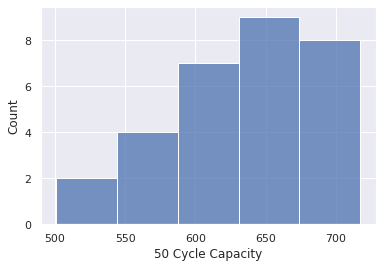

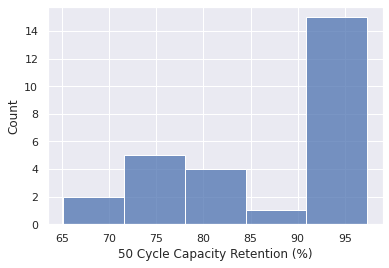

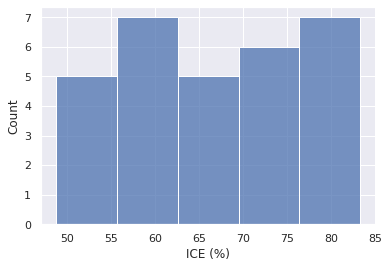

In [ ]:
#notes- cell yield of different salts and solvents. Low yield with C salt

#target distributions

sns.histplot(df['C_50'],bins=5)
plt.xlabel("50 Cycle Capacity")
plt.show()

sns.histplot(df['R_50'],bins=5)
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.show()

sns.histplot(df['ICE'],bins=5)
plt.xlabel("ICE (%)")
plt.show()

#Can look at initial/peak capacity as well
#sns.histplot(df['C_50']/df['R_50']*100,bins=10)
#plt.show()

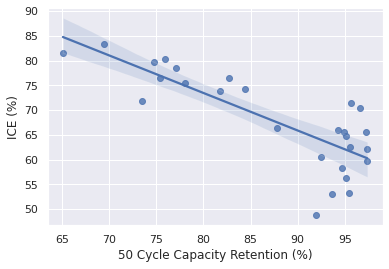

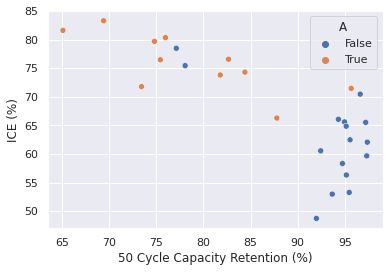

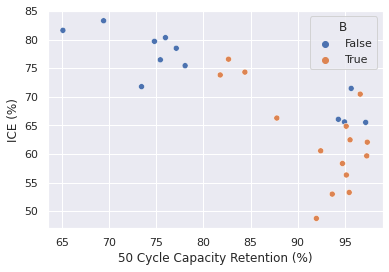

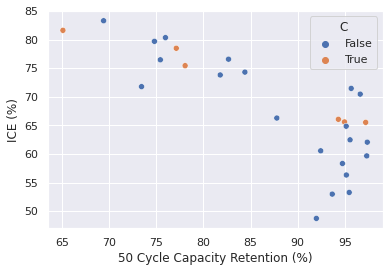

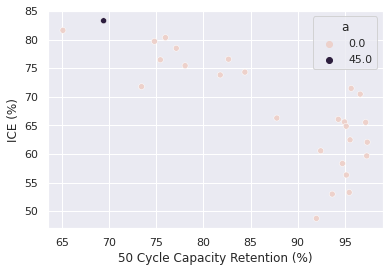

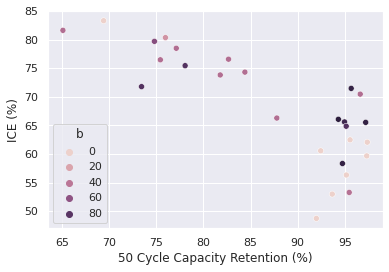

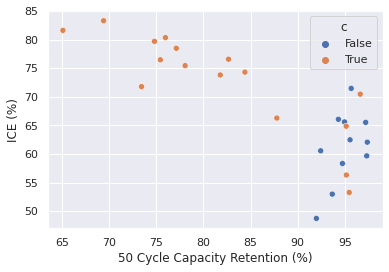

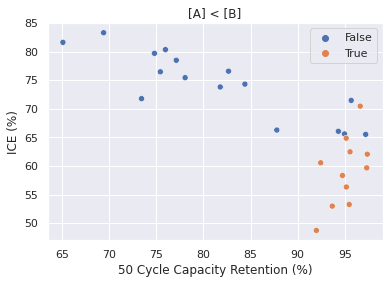

In [ ]:
sns.set_theme()

#target relationships

f1 = sns.regplot(data=df,x='R_50',y='ICE')
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.show()

#performance scatters colored by salt conc

sns.scatterplot(data=df, x='R_50', y='ICE',hue=df['A']>0)
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.show()

#performance scatters colored by salt conc

sns.scatterplot(data=df, x='R_50', y='ICE',hue=df['B']>0)
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.show()

#performance scatters colored by salt conc

sns.scatterplot(data=df, x='R_50', y='ICE',hue=df['C']>0)
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.show()

#performance scatters colored by salt conc

sns.scatterplot(data=df, x='R_50', y='ICE',hue='a')
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.show()

#performance scatters colored by salt conc

sns.scatterplot(data=df, x='R_50', y='ICE',hue='b')
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.show()

#performance scatters colored by salt conc

sns.scatterplot(data=df, x='R_50', y='ICE',hue=df['c']>0)
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.show()

#performance scatters colored by salt conc

sns.scatterplot(data=df, x='R_50', y='ICE',hue=(df['A']<df['B']) )#& (df['C']==0))
plt.xlabel("50 Cycle Capacity Retention (%)")
plt.ylabel("ICE (%)")
plt.title('[A] < [B]')
plt.show()

#NOTE: potentially two clusters to investigate

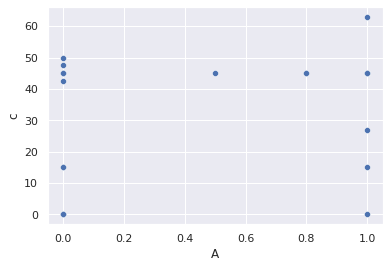

In [ ]:
sns.scatterplot(data=df, x='A', y='c')
plt.show()

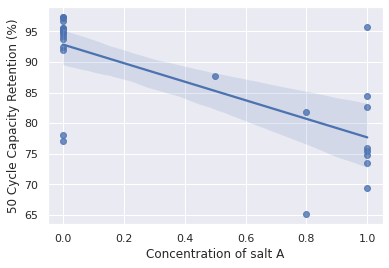

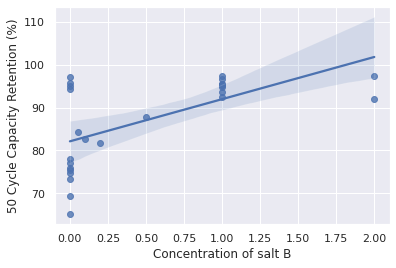

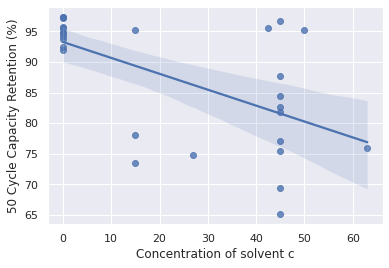

In [ ]:
#performance scatters colored by salt conc

sns.regplot(data=df, x='A', y='R_50')
plt.xlabel("Concentration of salt A")
plt.ylabel("50 Cycle Capacity Retention (%)")
plt.show()

sns.regplot(data=df, x='B', y='R_50')
plt.xlabel("Concentration of salt B")
plt.ylabel("50 Cycle Capacity Retention (%)")
plt.show()

sns.regplot(data=df, x='c', y='R_50')
plt.xlabel("Concentration of solvent c")
plt.ylabel("50 Cycle Capacity Retention (%)")
plt.show()

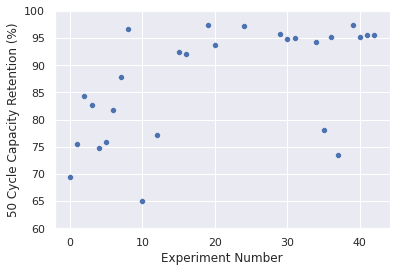

In [ ]:
#improvement over time

sns.scatterplot(data=df, x = df.index ,y='R_50')
plt.xlabel("Experiment Number")
plt.ylabel("50 Cycle Capacity Retention (%)")
plt.ylim([60,100])
plt.show()

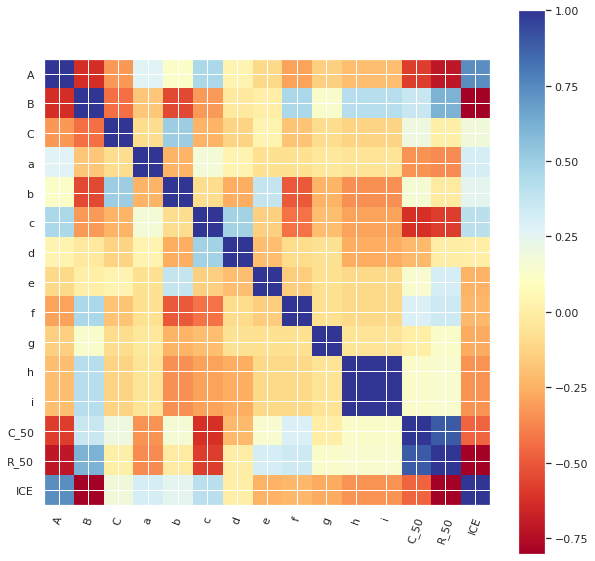

In [ ]:
# Correlation of the features to the targets and to each other

df_correlation = df.corr()
plt.figure(figsize=(10,10))
plt.imshow(df_correlation, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df_correlation)), df_correlation.columns, rotation=70)
plt.yticks(range(len(df_correlation)), df_correlation.columns)
plt.show()

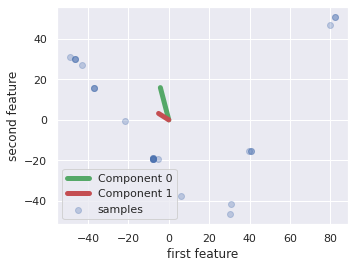

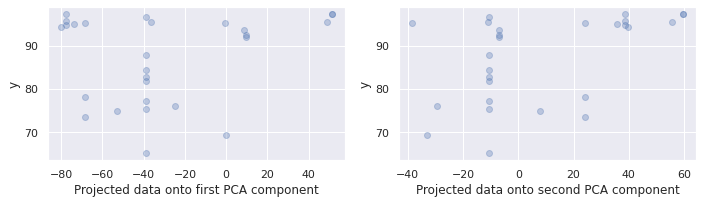

In [ ]:
# Dimensiality reduction

X = df.loc[:,'A':'i']
Y = df.loc[:,'R_50']
X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.scatter(X_r[:, 0], X_r[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), Y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), Y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

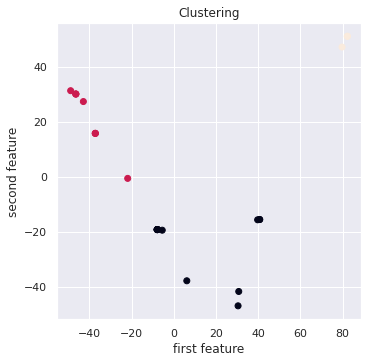

In [ ]:
# Clustering and cluster comparison

plt.figure(figsize=(12, 12))

y_pred = KMeans(n_clusters=3).fit_predict(X_r)

plt.subplot(221)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_pred)
plt.title("Clustering")

plt.gca().set(
    xlabel="first feature",
    ylabel="second feature",
)

plt.show()

In [ ]:
# Similarity metric

Xs = X.reset_index()   

for index, row in Xs.iterrows():  
    print(cosine_similarity([Xs.iloc[index]], [Xs.iloc[index-1]]))

[[0.01554837]]
[[0.51210406]]
[[0.99987938]]
[[0.99987962]]
[[0.93016732]]
[[0.73098901]]
[[0.93029537]]
[[0.99986046]]
[[0.99982343]]
[[0.99933793]]
[[0.99939558]]
[[0.03799323]]
[[0.99981453]]
[[0.04348982]]
[[0.04304733]]
[[0.05243092]]
[[0.99868424]]
[[0.99985037]]
[[0.99641928]]
[[0.99713732]]
[[0.98398371]]
[[0.99982683]]
[[0.99982878]]
[[0.15536278]]
[[0.21687682]]
[[0.74816812]]
[[0.2525511]]


#Modelling R_50

In [ ]:
# data prep for modelling

X = df.loc[:,'A':'i']
Y = df.loc[:,'R_50']

#drop rows missing target

X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

#test train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)


In [ ]:
# Inputs for the training 

X_train

,A,B,C,a,b,c,d,e,f,g,h,i
2,1.0,0.05,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
37,1.0,0.00,0.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
6,0.8,0.20,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.00,1.0,0.0,97.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
19,0.0,1.00,0.0,0.0,0.0,0.0,5.0,0.0,95.0,0.0,0.0,0.0
7,0.5,0.50,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
40,0.0,1.00,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.00,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
29,1.0,0.00,0.0,0.0,94.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
0,1.0,0.00,0.0,45.0,0.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Inputs for the testing

X_test

,A,B,C,a,b,c,d,e,f,g,h,i
30,0.0,1.0,0.0,0.0,94.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
20,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,95.0,0.0,0.0
31,0.0,0.0,1.0,0.0,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.1,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
39,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,95.0,0.0,0.0,0.0
12,0.0,0.0,1.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,1.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
36,0.0,1.0,0.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,63.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Outputs for the training

Y_train

2     84.40
37    73.42
6     81.78
34    94.33
19    97.40
7     87.79
40    95.18
1     75.42
29    95.69
0     69.39
24    97.23
42    95.57
41    95.48
10    65.07
8     96.65
16    91.99
15    92.45
5     75.96
Name: R_50, dtype: float64

In [ ]:
# Outputs for the testing

Y_test

30    94.76
20    93.68
31    94.98
3     82.66
39    97.34
12    77.11
35    78.05
36    95.16
4     74.79
Name: R_50, dtype: float64

##Constant estimate baseline

In [ ]:
#Always predict mean of training set target

Y_train_pred = Y_train.mean()*np.ones(Y_train.size)
Y_test_pred = Y_train.mean()*np.ones(Y_test.size)

# The test error, mean squared error (RMSE)

RMSE_baseline_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_baseline_test)

# The training error (RMSE)

RMSE_baseline_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_baseline_train)

# The coefficient of determination: 1 is perfect prediction

coef_baseline = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_baseline)


The test error (RMSE) is: 8.75
The training error (RMSE) is: 10.46
Coefficient of determination: -0.01


##Linear regression

[-20.44, 0.4, -13.07, -0.54, -0.39, -0.52, -0.42, 3.32, -0.46, 0.0, -0.5, -0.5]


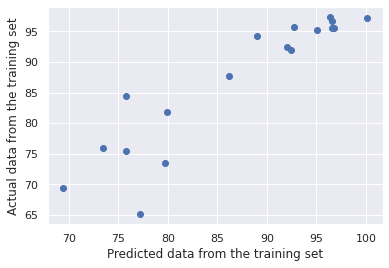

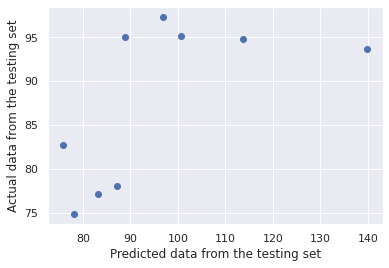

Coefficients: 
 [-20.43538847   0.40319434 -13.0731994   -0.53542944  -0.39414285
  -0.52131733  -0.41641439   3.32327582  -0.45741323   0.
  -0.49927929  -0.49927929]
The test error (RMSE) is: 17.42
The training error (RMSE) is: 4.24
Coefficient of determination: -2.99


In [ ]:
#Linear model fitting

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print([round(x,2) for x in reg.coef_])

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
# plt.plot([55,80],[55,80])
plt.show()

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
# plt.plot([55,80],[55,80])
plt.show()

# The coefficients

print("Coefficients: \n", reg.coef_)

# The test error (RMSE)

RMSE_linear_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_linear_test)

# The training error (RMSE)

RMSE_linear_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_linear_train)

# The coefficient of determination: 1 is perfect prediction

coef_linear = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_linear)



In [ ]:
#print coef parameters

for param,coef in zip(X.columns,reg.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -20.44
B : 0.4
C : -13.07
a : -0.54
b : -0.39
c : -0.52
d : -0.42
e : 3.32
f : -0.46
g : 0.0
h : -0.5
i : -0.5


##Lasso

In [ ]:
# Normalization

X_norm = (X-X.mean())/X.std()
Y_norm = (Y-Y.mean())/Y.std()
X_train_n = (X_train-X_train.mean())/X_train.std()
X_test_n = (X_test-X_test.mean())/X_test.std()
Y_train_n = (Y_train-Y_train.mean())/Y_train.std()
Y_test_n = (Y_test-Y_test.mean())/Y_test.std()
X_train_n.loc[:,'A':'i'] = X_train_n.loc[:,'A':'i'].fillna(value=0)
X_test_n.loc[:,'A':'i'] = X_test_n.loc[:,'A':'i'].fillna(value=0)


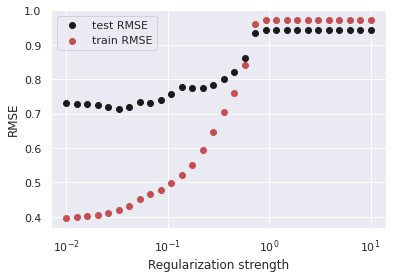

In [ ]:
# Regularization

alphas = np.logspace(-2, 1, 30)

# Training and predicting

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_n,Y_train_n)
  Y_test_pred = lasso.predict(X_test_n)
  Y_train_pred = lasso.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Hyperparameter tuning

param_grid = dict(alpha=alphas)
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train_n, Y_train_n)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.17433288221999882} with a score of 0.61


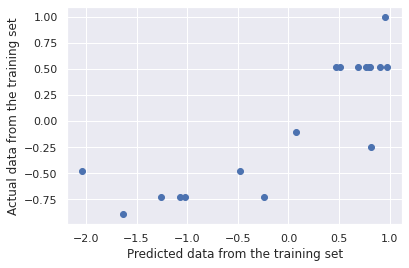

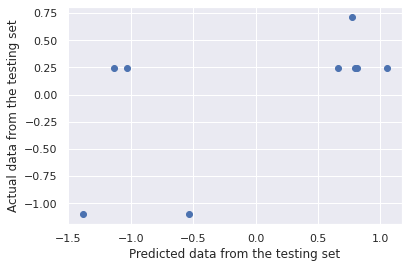

The test error (RMSE) is: 0.77
The training error (RMSE) is: 0.55
Coefficient of determination: 0.33


In [ ]:
# Training

lasso = Lasso(alpha = grid.best_params_["alpha"])
lasso.fit(X_train_n,Y_train_n)

#Predicting

Y_test_pred = lasso.predict(X_test_n)
Y_train_pred = lasso.predict(X_train_n)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))

plt.scatter(Y_train_n, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test_n, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test_n, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
#print coef parameters

for param,coef in zip(X.columns,lasso.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -0.6
B : 0.0
C : -0.0
a : -0.04
b : 0.0
c : -0.0
d : 0.0
e : 0.16
f : 0.0
g : 0.0
h : -0.0
i : -0.0


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(lasso, X_train, Y_train, param_name="alpha", param_range=alphas, cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+02, tolerance: 1.792e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+02, tolerance: 1.792e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
train_scores

array([[0.95837766, 0.80728224, 0.79683113, 0.89317483, 0.83660952],
       [0.95830577, 0.80722833, 0.79678047, 0.89293053, 0.83659123],
       [0.95819   , 0.80714152, 0.79669387, 0.89253781, 0.83656179],
       [0.95796725, 0.80700172, 0.79655065, 0.89190894, 0.83651438],
       [0.95760654, 0.8067766 , 0.79632054, 0.89093389, 0.83643718],
       [0.9570257 , 0.80641407, 0.79594866, 0.88931522, 0.8333237 ],
       [0.9560856 , 0.80583032, 0.79534865, 0.88679398, 0.83324267],
       [0.95457704, 0.80489029, 0.79438281, 0.88642267, 0.83311223],
       [0.95214793, 0.80337655, 0.79282629, 0.88578519, 0.83290211],
       [0.94824199, 0.80100259, 0.79031845, 0.88475864, 0.83256379],
       [0.94222528, 0.79711633, 0.78961557, 0.88310559, 0.83201897],
       [0.93229233, 0.79085844, 0.78886798, 0.88156279, 0.83114168],
       [0.91870443, 0.7807816 , 0.787664  , 0.87930717, 0.82972896],
       [0.89439179, 0.77812523, 0.78572607, 0.87567467, 0.82745387],
       [0.85523539, 0.77436157, 0.

In [ ]:
valid_scores

array([[-5.75315207e+00,  8.76416480e-01,  2.36667361e-01,
         6.28461549e-01, -3.11182722e+00],
       [-5.62439520e+00,  8.62522414e-01,  2.33643442e-01,
         6.22065478e-01, -3.09855965e+00],
       [-5.46300721e+00,  8.43563584e-01,  2.30026078e-01,
         6.12887448e-01, -3.08174811e+00],
       [-5.26074902e+00,  8.17364478e-01,  2.25352182e-01,
         5.99593383e-01, -3.06046507e+00],
       [-5.00925613e+00,  7.80679872e-01,  2.19347689e-01,
         5.80687704e-01, -3.03301058e+00],
       [-4.69849329e+00,  7.28573776e-01,  2.11610309e-01,
         5.51547901e-01, -1.41372997e+00],
       [-4.31690099e+00,  6.53535736e-01,  2.01588946e-01,
         5.08821277e-01, -1.38646590e+00],
       [-3.85503223e+00,  5.43933288e-01,  1.88559199e-01,
         4.98891626e-01, -1.35218375e+00],
       [-3.30394729e+00,  3.81696919e-01,  1.71507525e-01,
         4.84390098e-01, -1.30895700e+00],
       [-2.66156893e+00,  1.84625375e-01,  1.49032936e-01,
         4.64903315e-01

##KNN

In [ ]:
# Hyperparameter tuning

metrics='minkowski', 'euclidean', 'manhattan', 'chebyshev'
k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range, metric=metrics)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'metric': 'manhattan', 'n_neighbors': 4} with a score of 0.38


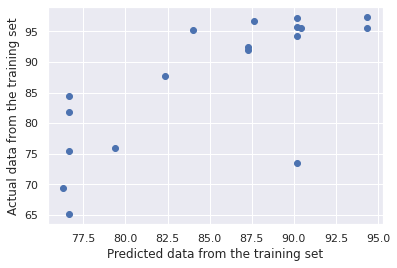

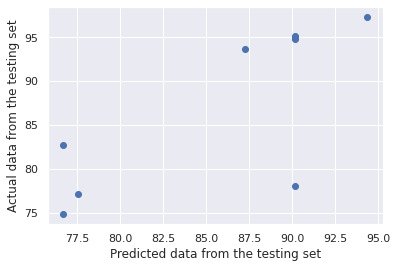

The test error (RMSE) is: 5.83
The training error (RMSE) is: 7.38
Coefficient of determination: 0.55


In [ ]:
# Model fitting

neigh = KNeighborsRegressor(n_neighbors = grid.best_params_["n_neighbors"], metric = grid.best_params_["metric"])
neigh.fit(X_train, Y_train)

# Predicting all values

Y_train_pred = neigh.predict(X_train)
Y_test_pred = neigh.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing predictions

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_knn_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_knn_test)

# The training error (RMSE)

RMSE_knn_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_knn_train)

# The coefficient of determination: 1 is perfect prediction

coef_knn = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_knn)


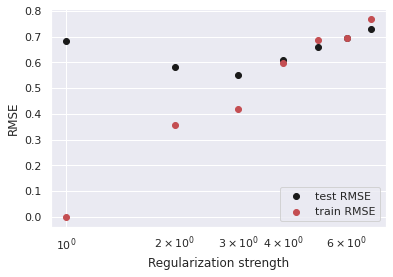

In [ ]:
# Regularization

k_range = list(range(1, 8))

# Training and predicting

for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_n,Y_train_n)
  Y_test_pred = neigh.predict(X_test_n)
  Y_train_pred = neigh.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(k,test_RMSE,c='k')
  plt.scatter(k,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(neigh, X_train, Y_train, param_name="n_neighbors", param_range=k_range,cv=5)


In [ ]:
train_scores

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [8.16583463e-01, 8.27686122e-01, 7.06440048e-01, 7.85601856e-01,
        7.80608121e-01],
       [5.33446149e-01, 4.79192937e-01, 5.19443717e-01, 6.08405195e-01,
        5.39825014e-01],
       [3.04193994e-01, 2.97692606e-01, 4.10041125e-01, 4.23316709e-01,
        3.88970213e-01],
       [2.53508843e-01, 1.44529259e-01, 3.36475936e-01, 3.82374336e-01,
        2.55079540e-01],
       [2.20953499e-01, 1.17575373e-01, 2.20966850e-01, 1.76388170e-01,
        1.83649623e-01],
       [1.22939752e-01, 1.01857796e-01, 1.26654270e-01, 9.18147198e-04,
        1.26351190e-01]])

In [ ]:
valid_scores

array([[-1.80897309, -0.66151207,  0.89473198,  0.61824797,  0.87722792],
       [-2.90186425, -0.21575952, -0.07634979,  0.31650015,  0.74327925],
       [-0.9205633 ,  0.4790509 , -0.81652669,  0.21998973,  0.86741716],
       [ 0.23130023,  0.45161639, -0.37840374, -0.05364096,  0.9600236 ],
       [-0.00726819, -0.20172847, -0.36918253, -0.10175559,  0.41605872],
       [-0.051592  , -0.16658028, -0.64592336, -0.16500401,  0.24293714],
       [-0.14115094, -0.52394837, -0.29290039, -0.0654665 , -0.32618681]])

##Random forest

In [ ]:
# Hyperparameter tuning

n_estimators = [5, 10, 50, 100, 200]
max_depth = [2, 3, 5, 7, 10]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 2, 'n_estimators': 5} with a score of 0.53


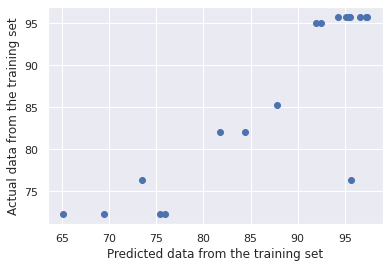

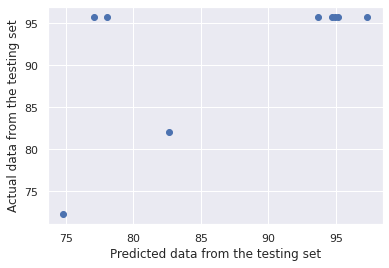

The test error (RMSE) is: 8.68
The training error (RMSE) is: 5.28
Coefficient of determination: 0.01


In [ ]:
# Model fitting

rf_reg = RandomForestRegressor(max_depth = grid.best_params_["max_depth"], n_estimators = grid.best_params_["n_estimators"])
rf_reg.fit(X_train,Y_train)

# Predicting

Y_test_pred = rf_reg.predict(X_test)
Y_train_pred = rf_reg.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([70,100],[70,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([70,100],[70,100])
plt.show()

# The test error, mean squared error (RMSE)

RMSE_rf_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_rf_test)

# The training error (RMSE)

RMSE_rf_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_rf_train)

# The coefficient of determination: 1 is perfect prediction

coef_rf = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_rf)


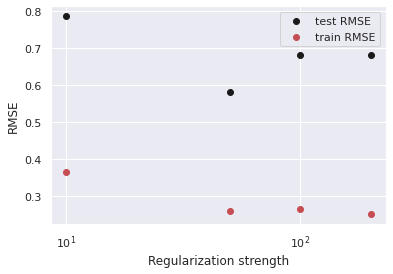

In [ ]:
# Regularization

n_estimators = [10, 50, 100, 200]

# Training and predicting

for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators= n)
  rf_reg.fit(X_train_n,Y_train_n)
  Y_test_pred = rf_reg.predict(X_test_n)
  Y_train_pred = rf_reg.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(n,test_RMSE,c='k')
  plt.scatter(n,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
#print coef parameters

for param,importance in zip(X.columns,rf_reg.feature_importances_):
  print("{} : {}".format(param,round(importance,2)))

A : 0.56
B : 0.14
C : 0.03
a : 0.02
b : 0.05
c : 0.14
d : 0.02
e : 0.03
f : 0.0
g : 0.0
h : 0.0
i : 0.0


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(rf_reg, X_train, Y_train, param_name="n_estimators", param_range=n_estimators,cv=5)


In [ ]:
train_scores

array([[0.92484355, 0.85475239, 0.90349883, 0.81932602, 0.9225317 ],
       [0.91283958, 0.90740003, 0.94219762, 0.94508943, 0.92665353],
       [0.92067254, 0.91949233, 0.92370256, 0.91295928, 0.92219783],
       [0.91890626, 0.9185089 , 0.94931229, 0.9121883 , 0.9287603 ]])

In [ ]:
valid_scores

array([[-0.33484603,  0.9305316 , -0.13280275,  0.70423581,  0.84465694],
       [-0.54324995,  0.90257954, -0.04049931,  0.7571838 ,  0.81886428],
       [-0.54322968,  0.80395714, -0.14789494,  0.68476453,  0.80175091],
       [-0.38802215,  0.85532574, -0.03906904,  0.69657861,  0.80979653]])

##Support vector machine

In [ ]:
# Hyperparameter tuning

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVR(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10000000.0, 'gamma': 1e-09} with a score of 0.25


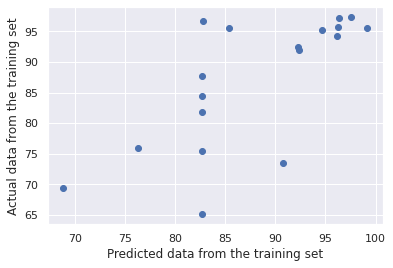

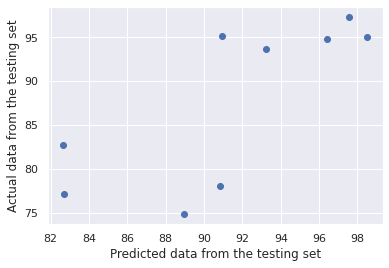

The test error (RMSE) is: 6.91
The training error (RMSE) is: 7.48
Coefficient of determination: 0.37


In [ ]:
# Model fitting

regr = svm.SVR(C = grid.best_params_["C"], gamma= grid.best_params_["gamma"])
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

# Visualization of training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualization of testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_svm_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_svm_test)

# The training error (RMSE)

RMSE_svm_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_svm_train)

# The coefficient of determination: 1 is perfect prediction

coef_svm = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_svm)


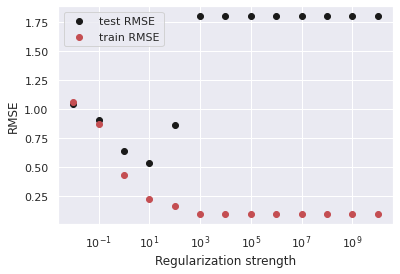

In [ ]:
# Training and predicting

for C in C_range:
  regr = svm.SVR(C=C)
  regr.fit(X_train_n, Y_train_n)

  Y_test_pred = regr.predict(X_test_n)
  Y_train_pred = regr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(C,test_RMSE,c='k')
  plt.scatter(C,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Model fitting

regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

#print coef parameters

for param,coef in zip(X.columns,regr.coef_[0]):
  print("{} : {}".format(param,np.round(coef,2)))

A : -1.95
B : 1.21
C : -0.21
a : -0.36
b : -0.09
c : -0.39
d : 0.21
e : 0.94
f : -0.08
g : 0.0
h : -0.12
i : -0.12


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(svm.SVR(), X_train, Y_train, param_name="C", param_range=C_range,cv=5)


In [ ]:
train_scores

array([[-2.85776858e-01, -2.86749070e-01, -1.31217570e-01,
        -2.55497570e-01, -4.48631137e-01],
       [-2.81388858e-01, -2.73734821e-01, -1.08456376e-01,
        -2.11920601e-01, -4.23350458e-01],
       [-1.65466606e-01, -1.57902140e-01,  4.61376490e-02,
         1.40736355e-01, -1.69658862e-01],
       [ 3.54869145e-01,  3.17660588e-01,  2.32002410e-01,
         5.30169637e-01,  3.03684346e-01],
       [ 5.44983129e-01,  4.47859102e-01,  3.66203433e-01,
         7.23446197e-01,  5.01253510e-01],
       [ 5.92476189e-01,  6.91235767e-01,  5.81487324e-01,
         9.37925800e-01,  6.73907567e-01],
       [ 7.80642548e-01,  7.71105390e-01,  7.72933353e-01,
         9.46668602e-01,  7.63291007e-01],
       [ 9.38029422e-01,  8.85721992e-01,  8.71447228e-01,
         9.68860894e-01,  8.92428513e-01],
       [ 9.98298134e-01,  9.89345156e-01,  9.81957826e-01,
         9.72523430e-01,  9.85288863e-01],
       [ 9.98348507e-01,  9.98407750e-01,  9.93894935e-01,
         9.92437547e-01

In [ ]:
valid_scores

array([[-1.92163140e+00, -1.43225349e-01, -9.05271902e-04,
        -1.80682748e-01, -9.59472107e-01],
       [-1.95575590e+00, -1.23874370e-01,  2.66883596e-03,
        -1.59056601e-01, -9.14539839e-01],
       [-1.98389233e+00,  5.07796827e-02,  3.02915226e-02,
        -1.96809382e-02, -4.16382575e-01],
       [-1.15021123e+00,  2.42609426e-01,  7.11477611e-02,
        -3.64074371e-03,  4.93695463e-01],
       [-1.87333998e+00,  2.43300191e-01,  4.00623040e-01,
         1.03257855e-02,  2.52780233e-01],
       [-9.15444963e-01,  1.13204427e-01,  2.69498330e-01,
         1.26443977e-01,  1.63660499e-01],
       [-7.86895197e-01,  6.82940983e-01,  3.59785351e-01,
         2.53223778e-01, -9.76100457e-01],
       [-7.18370861e-01, -5.43509279e-01,  5.43994501e-01,
         6.21192113e-01, -9.33521544e-01],
       [-7.86695795e-01, -3.17001022e-01,  3.08239327e-01,
         6.82300943e-01, -3.36506463e+00],
       [-1.95138661e+00, -8.87513414e-01, -5.81808371e+00,
         9.33184494e-01

##Gaussian process

In [ ]:
# Hyperparameter tuning

param_grid = [{"alpha":  np.logspace(-4, -0.5, 4), "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]}, {"alpha":  np.logspace(-4, -0.5, 4), "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, 2)]}]
grid = GridSearchCV(GaussianProcessRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarnin

The best parameters are {'alpha': 0.31622776601683794, 'kernel': RBF(length_scale=0.1)} with a score of -0.15


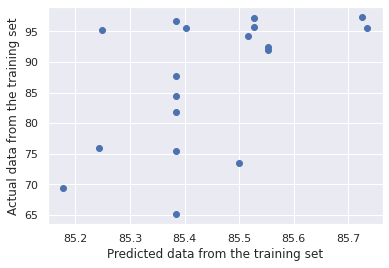

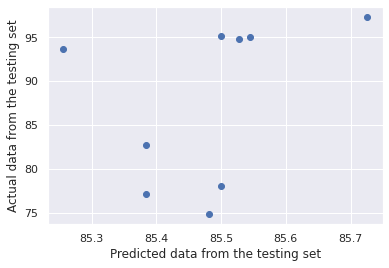

The test error (RMSE) is: 8.94
The training error (RMSE) is: 10.49
Coefficient of determination: -0.05


In [ ]:
# Model fitting
gpr = GaussianProcessRegressor(kernel=grid.best_params_["kernel"], random_state=0, alpha = grid.best_params_["alpha"]).fit(X_train, Y_train)
gpr.score(X_train, Y_train)

# Training and testing

Y_train_pred = gpr.predict(X_train)
Y_test_pred = gpr.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_gp_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_gp_test)

# The training error (RMSE)

RMSE_gp_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_gp_train)

# The coefficient of determination: 1 is perfect prediction

coef_gp = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_gp)


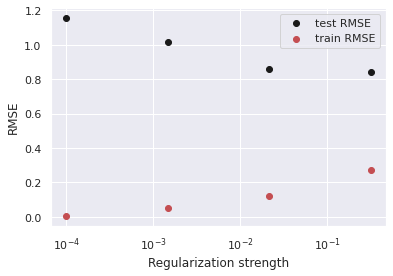

In [ ]:
# Regularization

alphas = np.logspace(-4, -0.5, 4)

# Training and predicting

for alpha in alphas:
  gpr = GaussianProcessRegressor(alpha = alpha)
  gpr.fit(X_train_n,Y_train_n)
  Y_test_pred = gpr.predict(X_test_n)
  Y_train_pred = gpr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(gpr, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[ 0.99999903,  0.99999773,  0.99939394,  0.99957736,  0.99952763],
       [ 0.99979901,  0.9995561 ,  0.98851301,  0.98669462,  0.9910342 ],
       [ 0.9704552 ,  0.95714812,  0.94468315,  0.94144566,  0.95402589],
       [-1.56668319, -1.54637823, -1.70217133, -2.33326626, -1.47871578]])

In [ ]:
valid_scores

array([[ -63.43685441,  -62.18080958,  -59.36419608,  -13.98786381,
        -128.159343  ],
       [ -63.46046524,  -62.13070445,  -59.36420389,  -13.8185538 ,
        -128.159343  ],
       [ -63.73836006,  -61.99228541,  -59.36431607,  -15.28017215,
        -128.159343  ],
       [ -65.121188  ,  -62.15497599,  -59.36556894,  -16.92454516,
        -128.159343  ]])

##Comparaison

In [ ]:
# The comparaison of test errors (RMSE) 

txt = "The test error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_test, RMSE_linear_test, RMSE_lasso_test, RMSE_knn_test, RMSE_rf_test, RMSE_svm_test, RMSE_gp_test]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The test error (RMSE) of Baseline is: 8.75
The test error (RMSE) of Linear regression is: 17.42
The test error (RMSE) of Lasso is: 0.77
The test error (RMSE) of KNN is: 5.57
The test error (RMSE) of Random forest is: 6.93
The test error (RMSE) of Support vector machine is: 6.91
The test error (RMSE) of Gaussian process is: 8.94


In [ ]:
# The comparaison of training errors (RMSE)

txt = "The training error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_train, RMSE_linear_train, RMSE_lasso_train, RMSE_knn_train, RMSE_rf_train, RMSE_svm_train, RMSE_gp_train]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The training error (RMSE) of Baseline is: 10.46
The training error (RMSE) of Linear regression is: 4.24
The training error (RMSE) of Lasso is: 0.55
The training error (RMSE) of KNN is: 7.94
The training error (RMSE) of Random forest is: 2.49
The training error (RMSE) of Support vector machine is: 7.48
The training error (RMSE) of Gaussian process is: 10.49


In [ ]:
# The comparaison of coefficient of determination: 1 is perfect prediction 

txt = "The coefficient of determination of {algo} is: {val:.2f}"

val = [coef_baseline, coef_linear, coef_lasso, coef_knn, coef_rf, coef_svm, coef_gp]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The coefficient of determination of Baseline is: -0.01
The coefficient of determination of Linear regression is: -2.99
The coefficient of determination of Lasso is: 0.33
The coefficient of determination of KNN is: 0.59
The coefficient of determination of Random forest is: 0.37
The coefficient of determination of Support vector machine is: 0.37
The coefficient of determination of Gaussian process is: -0.05


#Modelling ICE

In [ ]:
# data prep for modelling

X = df.loc[:,'A':'i']
Y = df.loc[:,'ICE']

#drop rows missing target

X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

#test train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X_norm = (X-X.mean())/X.std()
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_norm, Y, test_size=0.33)


In [ ]:
# Inputs for the training 

X_train

,A,B,C,a,b,c,d,e,f,g,h,i
36,0.0,1.00,0.00,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,63.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.05,0.00,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
38,0.0,1.00,0.03,0.0,0.0,0.0,5.0,0.0,95.0,0.0,0.0,0.0
6,0.8,0.20,0.00,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.00,1.00,0.0,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
19,0.0,1.00,0.00,0.0,0.0,0.0,5.0,0.0,95.0,0.0,0.0,0.0
7,0.5,0.50,0.00,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
40,0.0,1.00,0.00,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.00,0.00,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Inputs for the testing

X_test

,A,B,C,a,b,c,d,e,f,g,h,i
30,0.0,1.0,0.0,0.0,94.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
34,0.0,0.0,1.0,0.0,97.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,1.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
32,0.0,1.0,0.0,0.0,45.0,45.0,5.0,5.0,0.0,0.0,0.0,0.0
20,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,95.0,0.0,0.0
33,0.0,1.0,0.0,0.0,47.5,47.5,5.0,0.0,0.0,0.0,0.0,0.0
39,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,95.0,0.0,0.0,0.0
3,1.0,0.1,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
37,1.0,0.0,0.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,1.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Outputs for the training

Y_train

36    64.85
4     79.69
2     74.31
38    61.03
6     73.81
31    65.60
19    62.06
7     66.28
40    56.32
1     76.46
29    71.46
0     83.29
24    65.52
42    62.47
41    53.27
10    81.61
8     70.46
16    48.73
15    60.55
5     80.34
Name: ICE, dtype: float64

In [ ]:
# Outputs for the testing

Y_test

30    58.33
34    66.06
12    78.48
32    52.28
20    52.98
33    53.24
39    59.66
3     76.57
37    71.77
35    75.44
Name: ICE, dtype: float64

##Constant estimate baseline

In [ ]:
#Always predict mean of training set target

Y_train_pred = Y_train.mean()*np.ones(Y_train.size)
Y_test_pred = Y_train.mean()*np.ones(Y_test.size)

# The test error, mean squared error (RMSE)

RMSE_baseline_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_baseline_test)

# The training error (RMSE)

RMSE_baseline_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_baseline_train)

# The coefficient of determination: 1 is perfect prediction

coef_baseline = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_baseline)


The test error (RMSE) is: 10.51
The training error (RMSE) is: 9.46
Coefficient of determination: -0.12


##Linear regression

[2.58, -12.19, -4.84, 0.29, 0.17, 0.24, -0.04, -1.18, 0.19, 0.0, 0.16, 0.16]


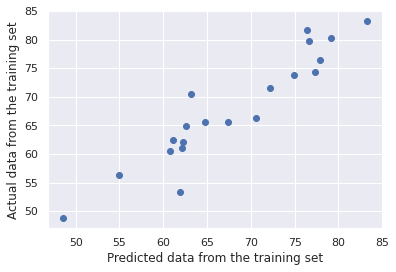

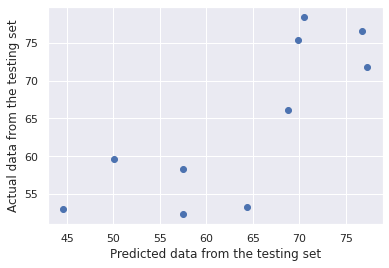

Coefficients: 
 [  2.57624621 -12.18605416  -4.83931376   0.29257277   0.17351104
   0.24415738  -0.0397323   -1.17584236   0.18611626   0.
   0.15960861   0.15960861]
The test error (RMSE) is: 6.69
The training error (RMSE) is: 3.24
Coefficient of determination: 0.55


In [ ]:
#Linear model fitting

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print([round(x,2) for x in reg.coef_])

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
# plt.plot([55,80],[55,80])
plt.show()

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
# plt.plot([55,80],[55,80])
plt.show()

# The coefficients

print("Coefficients: \n", reg.coef_)

# The test error (RMSE)

RMSE_linear_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_linear_test)

# The training error (RMSE)

RMSE_linear_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_linear_train)

# The coefficient of determination: 1 is perfect prediction

coef_linear = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_linear)



In [ ]:
#print coef parameters

for param,coef in zip(X.columns,reg.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : 2.58
B : -12.19
C : -4.84
a : 0.29
b : 0.17
c : 0.24
d : -0.04
e : -1.18
f : 0.19
g : 0.0
h : 0.16
i : 0.16


##Lasso

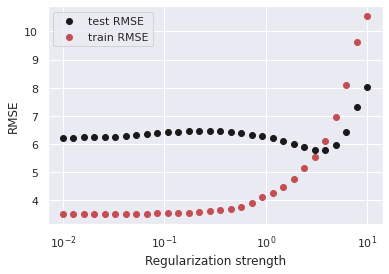

In [ ]:
# Regularization

alphas = np.logspace(-2, 1, 30)

# Training and predicting

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_n,Y_train_n)
  Y_test_pred = lasso.predict(X_test_n)
  Y_train_pred = lasso.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


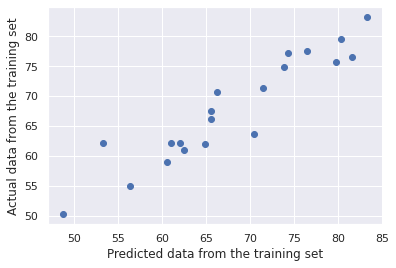

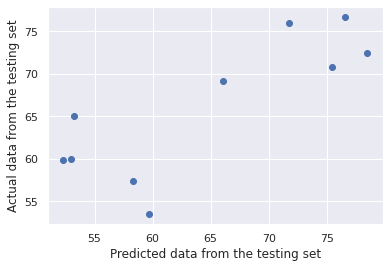

The test error (RMSE) is: 6.08
The training error (RMSE) is: 3.32
Coefficient of determination: 0.62


In [ ]:
# Training

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
#print coef parameters

for param,coef in zip(X.columns,lasso.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : 5.19
B : -8.78
C : -0.0
a : 0.13
b : 0.0
c : 0.11
d : -0.23
e : -0.98
f : 0.02
g : 0.0
h : -0.04
i : -0.0


In [ ]:
# Hyperparameter tuning

param_grid = dict(alpha=alphas)
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+01, tolerance: 1.550e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.211e+01, tolerance: 1.318e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

The best parameters are {'alpha': 0.727895384398315} with a score of 0.48


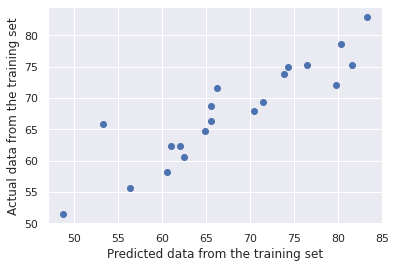

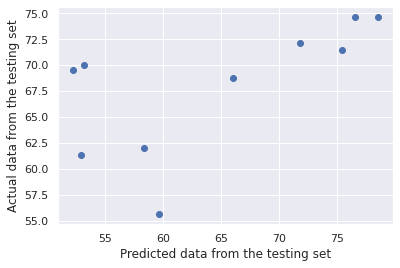

The test error (RMSE) is: 8.49
The training error (RMSE) is: 4.06
Coefficient of determination: 0.27


In [ ]:
# Training

lasso = Lasso(alpha=0.727895384398315)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(lasso, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e+01, tolerance: 1.550e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+01, tolerance: 1.550e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
train_scores

array([[0.89218785, 0.8981306 , 0.87256965, 0.94514028, 0.89881325],
       [0.89217706, 0.89809811, 0.8725152 , 0.94489164, 0.89863177],
       [0.89215969, 0.8980459 , 0.87242898, 0.94475513, 0.89860945],
       [0.89213171, 0.89796172, 0.87229016, 0.94455987, 0.89857332],
       [0.89208431, 0.89782398, 0.87206662, 0.94424542, 0.89851551],
       [0.89201035, 0.89776111, 0.87170665, 0.94373904, 0.89842198],
       [0.89193227, 0.89766171, 0.87112702, 0.9429236 , 0.89827225],
       [0.89180778, 0.89750171, 0.87024139, 0.9416105 , 0.89802956],
       [0.89160733, 0.89724403, 0.86993308, 0.93949608, 0.89763996],
       [0.89128445, 0.89682912, 0.86943663, 0.93609154, 0.8970022 ],
       [0.89076461, 0.89616105, 0.86863721, 0.93290397, 0.89598261],
       [0.88992741, 0.89508527, 0.86732367, 0.92785401, 0.8943398 ],
       [0.88857943, 0.89335307, 0.86523478, 0.92596962, 0.8920328 ],
       [0.88640866, 0.89056564, 0.86187112, 0.92396426, 0.8879894 ],
       [0.88291324, 0.8860747 , 0.

In [ ]:
valid_scores

array([[ 0.58570471, -0.18397792, -1.29489756,  0.5742324 ,  0.70946191],
       [ 0.58510497, -0.19213508, -1.30293591,  0.57701605,  0.70727416],
       [ 0.58433028, -0.20253114, -1.31168925,  0.57786302,  0.70837912],
       [ 0.58332529, -0.21585844, -1.32300484,  0.57830315,  0.70978724],
       [ 0.58240994, -0.23293138, -1.33767093,  0.57817351,  0.71152443],
       [ 0.5808282 , -0.21264245, -1.35684597,  0.57690091,  0.71372808],
       [ 0.58377179, -0.18609024, -1.38226903,  0.57350171,  0.71643059],
       [ 0.58755516, -0.15311935, -1.41194622,  0.56631521,  0.71985067],
       [ 0.59218418, -0.11235893, -1.36848689,  0.55256991,  0.72402152],
       [ 0.59780494, -0.06242745, -1.31540348,  0.52768053,  0.72945358],
       [ 0.60448435, -0.00195047, -1.25142623,  0.51748138,  0.7357849 ],
       [ 0.61227214,  0.07017747, -1.16817759,  0.50671076,  0.74331505],
       [ 0.6210049 ,  0.15425007, -1.04128497,  0.49089083,  0.73803528],
       [ 0.63028054,  0.24909329, -0.8

##KNN

In [ ]:
# Hyperparameter tuning

k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 2} with a score of 0.16


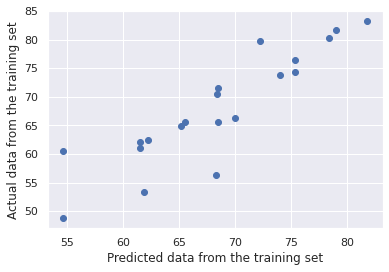

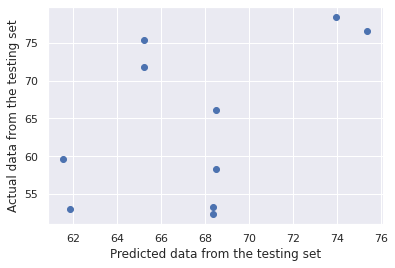

The test error (RMSE) is: 9.21
The training error (RMSE) is: 4.44
Coefficient of determination: 0.14


In [ ]:
# Model fitting

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

# Predicting all values

Y_train_pred = neigh.predict(X_train)
Y_test_pred = neigh.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing predictions

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_knn_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_knn_test)

# The training error (RMSE)

RMSE_knn_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_knn_train)

# The coefficient of determination: 1 is perfect prediction

coef_knn = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_knn)


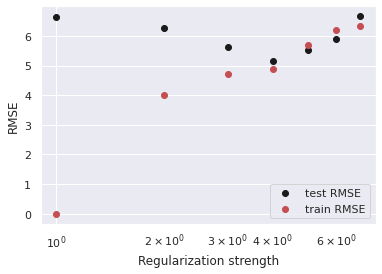

In [ ]:
# Regularization

k_range = list(range(1, 8))

# Training and predicting

for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_n,Y_train_n)
  Y_test_pred = neigh.predict(X_test_n)
  Y_train_pred = neigh.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(k,test_RMSE,c='k')
  plt.scatter(k,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(neigh, X_train, Y_train, param_name="n_neighbors", param_range=k_range,cv=5)


In [ ]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.78038641, 0.75556443, 0.81601212, 0.76723755, 0.73057317],
       [0.70131404, 0.65385719, 0.74786933, 0.6223115 , 0.46751593],
       [0.51211119, 0.51248145, 0.63147932, 0.56759721, 0.41056454],
       [0.46172194, 0.33081831, 0.51364917, 0.45450341, 0.33214859],
       [0.33218857, 0.21484338, 0.40231243, 0.34032368, 0.22707145],
       [0.1909556 , 0.06936133, 0.25690474, 0.13178308, 0.19449712]])

In [ ]:
valid_scores

array([[ 9.23997959e-01, -2.22662772e+00, -5.89939980e-01,
         1.45006456e-01,  8.06897957e-01],
       [ 8.33693587e-01, -1.01182749e+00, -7.32129810e-02,
         3.30654609e-01,  7.31976144e-01],
       [ 8.86452720e-01, -1.06116449e+00,  5.91696508e-02,
         1.89201535e-01,  4.46323651e-01],
       [ 8.21032732e-01, -5.76230954e-01,  2.25353343e-01,
        -3.12105299e-02,  1.00231651e-01],
       [ 7.78777901e-01, -2.86617472e-01,  2.84415967e-01,
        -1.54520041e-01, -6.13443757e-02],
       [ 3.91467382e-01, -7.31722155e-01, -1.23101917e-03,
        -2.63409168e-01, -2.56487497e-01],
       [ 1.85266882e-01, -1.04824048e+00, -5.76742943e-03,
        -3.82049533e-01, -5.61432744e-01]])

##Random forest

In [ ]:
# Hyperparameter tuning

n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 10, 'n_estimators': 200} with a score of 0.59


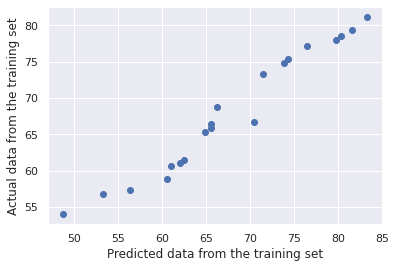

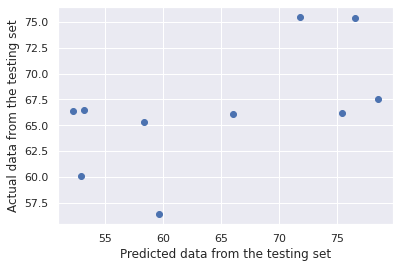

The test error (RMSE) is: 8.40
The training error (RMSE) is: 2.11
Coefficient of determination: 0.29


In [ ]:
# Model fitting

rf_reg = RandomForestRegressor(max_depth= 10, n_estimators= 100)
rf_reg.fit(X_train,Y_train)

# Predicting

Y_test_pred = rf_reg.predict(X_test)
Y_train_pred = rf_reg.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([70,100],[70,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([70,100],[70,100])
plt.show()

# The test error, mean squared error (RMSE)

RMSE_rf_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_rf_test)

# The training error (RMSE)

RMSE_rf_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_rf_train)

# The coefficient of determination: 1 is perfect prediction

coef_rf = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_rf)


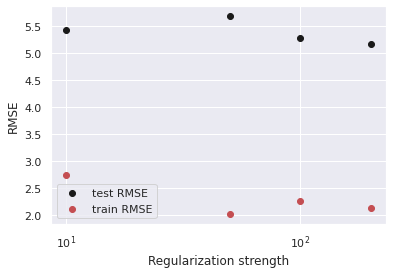

In [ ]:
# Regularization

n_estimators = [10, 50, 100, 200]

# Training and predicting

for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators= n)
  rf_reg.fit(X_train_n,Y_train_n)
  Y_test_pred = rf_reg.predict(X_test_n)
  Y_train_pred = rf_reg.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(n,test_RMSE,c='k')
  plt.scatter(n,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
#print coef parameters

for param,importance in zip(X.columns,rf_reg.feature_importances_):
  print("{} : {}".format(param,round(importance,2)))

A : 0.19
B : 0.6
C : 0.01
a : 0.0
b : 0.06
c : 0.06
d : 0.04
e : 0.0
f : 0.01
g : 0.01
h : 0.0
i : 0.0


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(rf_reg, X_train, Y_train, param_name="n_estimators", param_range=n_estimators,cv=5)


In [ ]:
train_scores

array([[0.91312044, 0.94696815, 0.94143963, 0.93531989, 0.96626813],
       [0.93772113, 0.92835455, 0.92965208, 0.94838885, 0.95730881],
       [0.93090023, 0.9428261 , 0.92568179, 0.94096752, 0.96937554],
       [0.93304172, 0.9450616 , 0.93229773, 0.94234849, 0.96616512]])

In [ ]:
valid_scores

array([[0.91828011, 0.0244687 , 0.85906369, 0.45253214, 0.54245135],
       [0.91733316, 0.28652791, 0.7793333 , 0.36713954, 0.51077685],
       [0.89324466, 0.12414568, 0.77506124, 0.43684787, 0.5061918 ],
       [0.90968316, 0.10693289, 0.78519204, 0.39685197, 0.50292604]])

##Support vector machine

In [ ]:
# Hyperparameter tuning

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVR(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10000000.0, 'gamma': 1e-07} with a score of 0.50


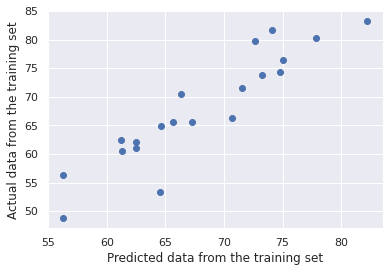

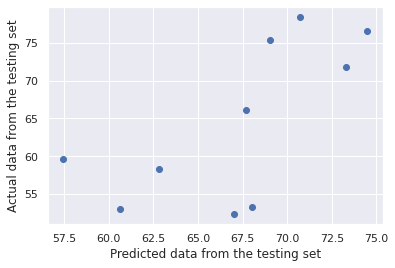

The test error (RMSE) is: 7.95
The training error (RMSE) is: 4.15
Coefficient of determination: 0.36


In [ ]:
# Model fitting

regr = svm.SVR(C = 10000000.0, gamma= 1e-07)
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

# Visualization of training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualization of testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_svm_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_svm_test)

# The training error (RMSE)

RMSE_svm_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_svm_train)

# The coefficient of determination: 1 is perfect prediction

coef_svm = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_svm)


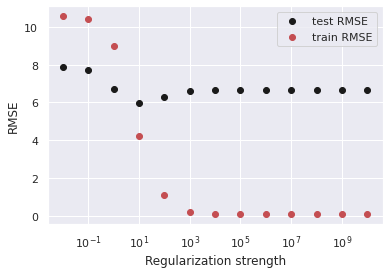

In [ ]:
# Training and predicting

for C in C_range:
  regr = svm.SVR(C=C)
  regr.fit(X_train_n, Y_train_n)

  Y_test_pred = regr.predict(X_test_n)
  Y_train_pred = regr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(C,test_RMSE,c='k')
  plt.scatter(C,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Model fitting

regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

#print coef parameters

for param,coef in zip(X.columns,regr.coef_[0]):
  print("{} : {}".format(param,np.round(coef,2)))

A : 2.5
B : -3.4
C : -0.18
a : 0.18
b : 0.02
c : 0.2
d : -0.35
e : 0.0
f : 0.0
g : 0.0
h : -0.03
i : -0.03


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(svm.SVR(), X_train, Y_train, param_name="C", param_range=C_range,cv=5)


In [ ]:
train_scores

array([[-1.93742001e-02,  2.16272927e-03, -1.81797428e-02,
         3.06625840e-03, -9.44482240e-02],
       [ 9.45669754e-04,  2.33036860e-02,  1.67603867e-02,
         3.04865336e-02, -7.81896976e-02],
       [ 1.25097836e-01,  1.94169434e-01,  1.93974999e-01,
         2.51578357e-01,  1.55477464e-02],
       [ 4.58709048e-01,  4.63669746e-01,  3.95625566e-01,
         6.14305261e-01,  3.43123008e-01],
       [ 6.13781351e-01,  5.75406546e-01,  4.02758483e-01,
         7.16651109e-01,  5.01663471e-01],
       [ 7.89853272e-01,  7.33370392e-01,  6.66854913e-01,
         8.15808973e-01,  6.38278570e-01],
       [ 9.10475892e-01,  9.47985111e-01,  8.90174388e-01,
         9.28256995e-01,  9.32316847e-01],
       [ 9.56952789e-01,  9.90818075e-01,  9.53012158e-01,
         9.68302020e-01,  9.73762142e-01],
       [ 9.72394439e-01,  9.99287137e-01,  9.69657747e-01,
         9.68535687e-01,  9.97472791e-01],
       [ 9.76275934e-01,  9.99871867e-01,  9.70633087e-01,
         9.71076426e-01

In [ ]:
valid_scores

array([[-2.92143413e-01, -5.15505643e-02, -4.04654039e-01,
        -6.53740895e-02, -3.98748609e-03],
       [-2.58040547e-01,  2.62613105e-02, -3.89260986e-01,
        -4.87019458e-02,  1.54224572e-02],
       [-6.18794442e-02,  5.35569186e-01, -3.62184255e-01,
         2.27156888e-02,  1.15145969e-01],
       [ 4.56640263e-01,  9.43700804e-02, -7.78277462e-02,
        -1.08938988e-01,  1.33893321e-01],
       [ 3.11714296e-01,  1.06169160e-01,  1.29212714e-02,
        -1.31624341e-02, -1.13834311e-02],
       [-3.55349542e-02, -5.51396372e-02, -1.46338901e+00,
        -1.54386772e-01, -1.47172628e+00],
       [-1.60815943e-01, -2.55520141e-01, -2.17650082e+01,
        -2.15423877e-01, -4.60451629e+00],
       [ 7.37593298e-02, -1.89557824e-01, -2.00653833e+01,
        -2.05220751e-01, -3.31323578e-02],
       [ 5.30396166e-01, -5.72629428e-02, -1.18995036e+01,
        -8.94964390e-02,  5.28763007e-01],
       [ 5.86095247e-01, -4.37825027e-02, -4.38817577e+00,
         5.87447544e-01

##Gaussian process

In [ ]:
# Hyperparameter tuning

alphas = np.logspace(-4, -0.5, 4)

param_grid = dict(alpha=alphas)
grid = GridSearchCV(GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.021544346900318846} with a score of -0.19


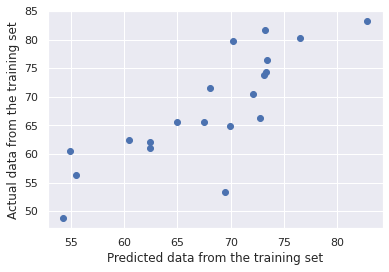

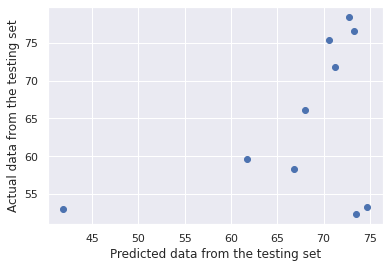

The test error (RMSE) is: 10.87
The training error (RMSE) is: 5.49
Coefficient of determination: -0.20


In [ ]:
# Model fitting
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha = 0.021544346900318846).fit(X_train, Y_train)
gpr.score(X_train, Y_train)

# Training and testing

Y_train_pred = gpr.predict(X_train)
Y_test_pred = gpr.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_gp_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_gp_test)

# The training error (RMSE)

RMSE_gp_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_gp_train)

# The coefficient of determination: 1 is perfect prediction

coef_gp = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_gp)


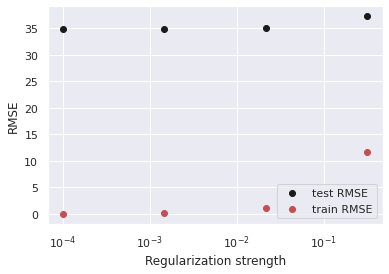

In [ ]:
# Regularization

alphas = np.logspace(-4, -0.5, 4)

# Training and predicting

for alpha in alphas:
  gpr = GaussianProcessRegressor(alpha = alpha)
  gpr.fit(X_train_n,Y_train_n)
  Y_test_pred = gpr.predict(X_test_n)
  Y_train_pred = gpr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(gpr, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[ 0.99999381,  0.99998039,  0.99997264,  0.99995282,  0.99996043],
       [ 0.9994909 ,  0.99910588,  0.99883242,  0.99825142,  0.99897481],
       [ 0.97418522,  0.98447107,  0.96859749,  0.97172629,  0.97798033],
       [-0.75321169, -0.71367886, -0.94856121, -1.04945422, -1.04807006]])

In [ ]:
valid_scores

array([[-47.11502906, -58.45030754, -30.39642152, -18.80688371,
        -22.71622767],
       [-47.11460002, -60.70684414, -30.40308313, -18.90737383,
        -22.96662628],
       [-47.10444825, -62.85350186, -30.52452704, -19.14164303,
        -23.77799605],
       [-48.12555104, -62.14068903, -32.0894076 , -20.59015467,
        -24.03321383]])

##Comparaison

In [ ]:
# The comparaison of test errors (RMSE) 

txt = "The test error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_test, RMSE_linear_test, RMSE_lasso_test, RMSE_knn_test, RMSE_rf_test, RMSE_svm_test, RMSE_gp_test]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The test error (RMSE) of Baseline is: 10.51
The test error (RMSE) of Linear regression is: 6.69
The test error (RMSE) of Lasso is: 8.49
The test error (RMSE) of KNN is: 9.21
The test error (RMSE) of Random forest is: 8.40
The test error (RMSE) of Support vector machine is: 7.95
The test error (RMSE) of Gaussian process is: 10.87


In [ ]:
# The comparaison of training errors (RMSE)

txt = "The training error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_train, RMSE_linear_train, RMSE_lasso_train, RMSE_knn_train, RMSE_rf_train, RMSE_svm_train, RMSE_gp_train]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The training error (RMSE) of Baseline is: 9.46
The training error (RMSE) of Linear regression is: 3.24
The training error (RMSE) of Lasso is: 4.06
The training error (RMSE) of KNN is: 4.44
The training error (RMSE) of Random forest is: 2.11
The training error (RMSE) of Support vector machine is: 4.15
The training error (RMSE) of Gaussian process is: 5.49


In [ ]:
# The comparaison of coefficient of determination: 1 is perfect prediction 

txt = "The coefficient of determination of {algo} is: {val:.2f}"

val = [coef_baseline, coef_linear, coef_lasso, coef_knn, coef_rf, coef_svm, coef_gp]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The coefficient of determination of Baseline is: -0.12
The coefficient of determination of Linear regression is: 0.55
The coefficient of determination of Lasso is: 0.27
The coefficient of determination of KNN is: 0.14
The coefficient of determination of Random forest is: 0.29
The coefficient of determination of Support vector machine is: 0.36
The coefficient of determination of Gaussian process is: -0.20


#Additional model testing (R_50 without solvents g, h, i)

In [ ]:
# data prep for modelling

X = df.loc[:,'A':'f']
Y = df.loc[:,'R_50']

#drop rows missing target

X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

#test train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X_norm = (X-X.mean())/X.std()
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_norm, Y, test_size=0.33)


In [ ]:
# Inputs for the training 

X_train

,A,B,C,a,b,c,d,e,f
2,1.0,0.05,0.0,0.0,45.0,45.0,10.0,0.0,0.0
37,1.0,0.00,0.0,0.0,82.0,15.0,3.0,0.0,0.0
6,0.8,0.20,0.0,0.0,45.0,45.0,10.0,0.0,0.0
34,0.0,0.00,1.0,0.0,97.0,0.0,3.0,0.0,0.0
19,0.0,1.00,0.0,0.0,0.0,0.0,5.0,0.0,95.0
7,0.5,0.50,0.0,0.0,45.0,45.0,10.0,0.0,0.0
40,0.0,1.00,0.0,0.0,0.0,50.0,50.0,0.0,0.0
1,1.0,0.00,0.0,0.0,45.0,45.0,10.0,0.0,0.0
29,1.0,0.00,0.0,0.0,94.0,0.0,3.0,3.0,0.0
0,1.0,0.00,0.0,45.0,0.0,45.0,10.0,0.0,0.0


In [ ]:
# Inputs for the testing

X_test

,A,B,C,a,b,c,d,e,f
30,0.0,1.0,0.0,0.0,94.0,0.0,3.0,3.0,0.0
20,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
31,0.0,0.0,1.0,0.0,90.0,0.0,10.0,0.0,0.0
3,1.0,0.1,0.0,0.0,45.0,45.0,10.0,0.0,0.0
39,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,95.0
12,0.0,0.0,1.0,0.0,45.0,45.0,10.0,0.0,0.0
35,0.0,0.0,1.0,0.0,82.0,15.0,3.0,0.0,0.0
36,0.0,1.0,0.0,0.0,82.0,15.0,3.0,0.0,0.0
4,1.0,0.0,0.0,0.0,63.0,27.0,10.0,0.0,0.0


In [ ]:
# Outputs for the training

Y_train

2     84.40
37    73.42
6     81.78
34    94.33
19    97.40
7     87.79
40    95.18
1     75.42
29    95.69
0     69.39
24    97.23
42    95.57
41    95.48
10    65.07
8     96.65
16    91.99
15    92.45
5     75.96
Name: R_50, dtype: float64

In [ ]:
# Outputs for the testing

Y_test

30    94.76
20    93.68
31    94.98
3     82.66
39    97.34
12    77.11
35    78.05
36    95.16
4     74.79
Name: R_50, dtype: float64

##Constant estimate baseline

In [ ]:
#Always predict mean of training set target

Y_train_pred = Y_train.mean()*np.ones(Y_train.size)
Y_test_pred = Y_train.mean()*np.ones(Y_test.size)

# The test error, mean squared error (RMSE)

RMSE_baseline_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_baseline_test)

# The training error (RMSE)

RMSE_baseline_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_baseline_train)

# The coefficient of determination: 1 is perfect prediction

coef_baseline = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_baseline)


The test error (RMSE) is: 8.75
The training error (RMSE) is: 10.46
Coefficient of determination: -0.01


##Linear regression

[-20.44, 0.4, -13.07, -0.04, 0.11, -0.02, 0.08, 3.82, 0.04]


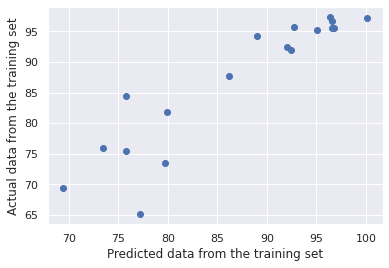

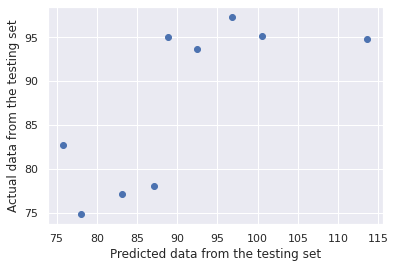

Coefficients: 
 [-20.43538847   0.40319434 -13.0731994   -0.03615016   0.10513644
  -0.02203804   0.0828649    3.82255511   0.04186606]
The test error (RMSE) is: 8.16
The training error (RMSE) is: 4.24
Coefficient of determination: 0.12


In [ ]:
#Linear model fitting

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print([round(x,2) for x in reg.coef_])

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
# plt.plot([55,80],[55,80])
plt.show()

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
# plt.plot([55,80],[55,80])
plt.show()

# The coefficients

print("Coefficients: \n", reg.coef_)

# The test error (RMSE)

RMSE_linear_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_linear_test)

# The training error (RMSE)

RMSE_linear_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_linear_train)

# The coefficient of determination: 1 is perfect prediction

coef_linear = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_linear)



In [ ]:
#print coef parameters

for param,coef in zip(X.columns,reg.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -20.44
B : 0.4
C : -13.07
a : -0.04
b : 0.11
c : -0.02
d : 0.08
e : 3.82
f : 0.04


##Lasso

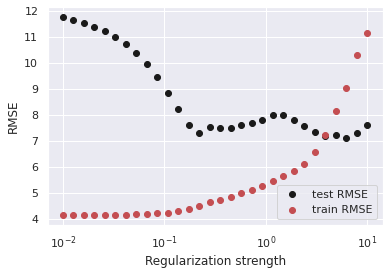

In [ ]:
# Regularization

alphas = np.logspace(-2, 1, 30)

# Training and predicting

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_n,Y_train_n)
  Y_test_pred = lasso.predict(X_test_n)
  Y_train_pred = lasso.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


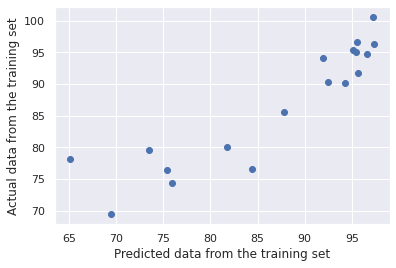

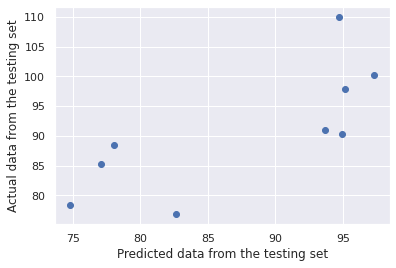

The test error (RMSE) is: 7.45
The training error (RMSE) is: 4.36
Coefficient of determination: 0.27


In [ ]:
# Training

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
#print coef parameters

for param,coef in zip(X.columns,lasso.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -14.41
B : 3.88
C : -5.51
a : -0.06
b : 0.09
c : -0.02
d : 0.12
e : 3.58
f : 0.06


In [ ]:
# Hyperparameter tuning

param_grid = dict(alpha=alphas)
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 6.2101694189156165} with a score of 0.29


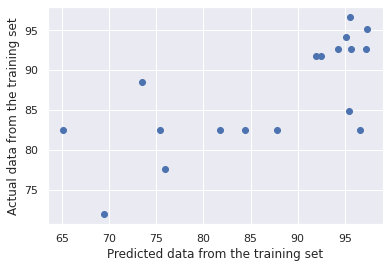

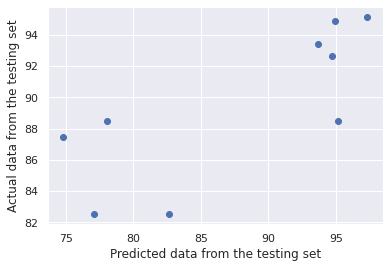

The test error (RMSE) is: 6.26
The training error (RMSE) is: 7.37
Coefficient of determination: 0.48


In [ ]:
# Training

lasso = Lasso(alpha=6.2101694189156165)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(lasso, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[0.95837695, 0.80728207, 0.79683432, 0.89317376, 0.83660952],
       [0.95830463, 0.80722809, 0.79677879, 0.89292871, 0.83659123],
       [0.95818818, 0.80714116, 0.79668935, 0.89253621, 0.83656179],
       [0.95796629, 0.80700121, 0.7965453 , 0.89190698, 0.83651438],
       [0.95760502, 0.80677583, 0.79631321, 0.89093386, 0.83643718],
       [0.9570233 , 0.80639879, 0.79593944, 0.88931539, 0.8333237 ],
       [0.95608658, 0.80583005, 0.79533764, 0.88679401, 0.83324267],
       [0.95457822, 0.80489027, 0.79436827, 0.88642262, 0.83311223],
       [0.95214942, 0.80337655, 0.79280719, 0.88578522, 0.83290211],
       [0.94823839, 0.80100263, 0.79029363, 0.8847588 , 0.83256379],
       [0.94222529, 0.79711634, 0.7895777 , 0.88310566, 0.83201897],
       [0.93313732, 0.79085847, 0.78880823, 0.88156282, 0.83114168],
       [0.91762408, 0.78078156, 0.787569  , 0.87930704, 0.82972896],
       [0.89438858, 0.77812523, 0.78557345, 0.87567447, 0.82745387],
       [0.85523239, 0.77436162, 0.

In [ ]:
valid_scores

array([[-5.75263530e+00,  8.76216458e-01,  2.40875876e-01,
         6.28423938e-01, -3.11182722e+00],
       [-5.62378051e+00,  8.62282618e-01,  2.38185927e-01,
         6.22011569e-01, -3.09855965e+00],
       [-5.46227628e+00,  8.43269948e-01,  2.34749746e-01,
         6.12842058e-01, -3.08174811e+00],
       [-5.25990917e+00,  8.17007498e-01,  2.30352619e-01,
         5.99544340e-01, -3.06046507e+00],
       [-5.00825274e+00,  7.80227749e-01,  2.24715077e-01,
         5.80687147e-01, -3.03301058e+00],
       [-4.69729636e+00,  7.26027767e-01,  2.17465348e-01,
         5.51550944e-01, -1.41372997e+00],
       [-4.31619996e+00,  6.53512354e-01,  2.08109436e-01,
         5.08822430e-01, -1.38646590e+00],
       [-3.85433970e+00,  5.43929530e-01,  1.95990476e-01,
         4.98889866e-01, -1.35218375e+00],
       [-3.30327126e+00,  3.81698573e-01,  1.80211207e-01,
         4.84390980e-01, -1.30895700e+00],
       [-2.66034227e+00,  1.84638706e-01,  1.59540227e-01,
         4.64906613e-01

##KNN

In [ ]:
# Hyperparameter tuning

k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 4} with a score of 0.25


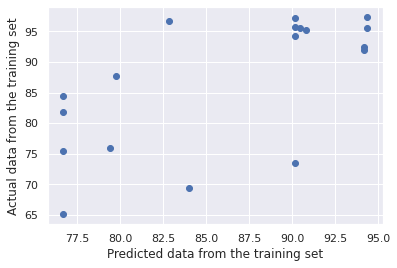

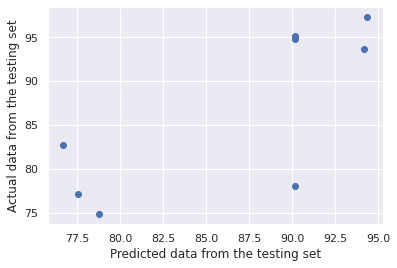

The test error (RMSE) is: 5.55
The training error (RMSE) is: 7.97
Coefficient of determination: 0.60


In [ ]:
# Model fitting

neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, Y_train)

# Predicting all values

Y_train_pred = neigh.predict(X_train)
Y_test_pred = neigh.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing predictions

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_knn_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_knn_test)

# The training error (RMSE)

RMSE_knn_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_knn_train)

# The coefficient of determination: 1 is perfect prediction

coef_knn = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_knn)


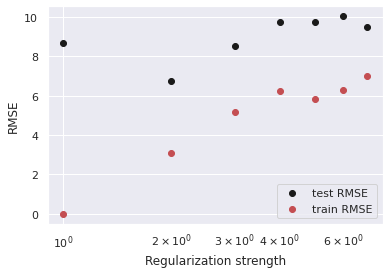

In [ ]:
# Regularization

k_range = list(range(1, 8))

# Training and predicting

for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_n,Y_train_n)
  Y_test_pred = neigh.predict(X_test_n)
  Y_train_pred = neigh.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(k,test_RMSE,c='k')
  plt.scatter(k,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(neigh, X_train, Y_train, param_name="n_neighbors", param_range=k_range,cv=5)


In [ ]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.81658346, 0.82621516, 0.70271288, 0.78560186, 0.78060812],
       [0.53143021, 0.4762415 , 0.51146987, 0.61838027, 0.53982501],
       [0.29884351, 0.30214407, 0.41004113, 0.46822578, 0.38897021],
       [0.25350884, 0.1891083 , 0.35391215, 0.44063802, 0.25507954],
       [0.27339769, 0.16104265, 0.28294044, 0.26796273, 0.18364962],
       [0.20827608, 0.15129541, 0.18364116, 0.15717065, 0.12635119]])

In [ ]:
valid_scores

array([[-1.80897309, -0.66151207,  0.89473198,  0.61824797,  0.87722792],
       [-2.90186425, -0.24283312, -0.07571774,  0.31650015,  0.74327925],
       [-0.9205633 ,  0.43064758, -0.81977449,  0.21998973,  0.86741716],
       [ 0.23130023,  0.49525757, -0.37840374, -0.05364096,  0.9600236 ],
       [-0.00726819,  0.14178749, -0.34422469, -0.10175559,  0.41605872],
       [-0.051592  ,  0.14970763, -0.52799726, -0.16500401,  0.24293714],
       [-0.14115094, -0.19217233, -0.17927051, -0.0654665 , -0.32618681]])

##Random forest

In [ ]:
# Hyperparameter tuning

n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 20, 'n_estimators': 10} with a score of 0.48


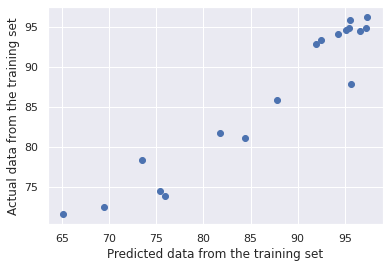

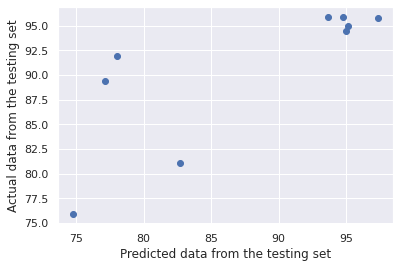

The test error (RMSE) is: 6.30
The training error (RMSE) is: 3.09
Coefficient of determination: 0.48


In [ ]:
# Model fitting

rf_reg = RandomForestRegressor(max_depth= 3, n_estimators= 100)
rf_reg.fit(X_train,Y_train)

# Predicting

Y_test_pred = rf_reg.predict(X_test)
Y_train_pred = rf_reg.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([70,100],[70,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([70,100],[70,100])
plt.show()

# The test error, mean squared error (RMSE)

RMSE_rf_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_rf_test)

# The training error (RMSE)

RMSE_rf_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_rf_train)

# The coefficient of determination: 1 is perfect prediction

coef_rf = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_rf)


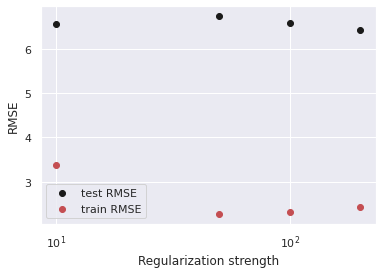

In [ ]:
# Regularization

n_estimators = [10, 50, 100, 200]

# Training and predicting

for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators= n)
  rf_reg.fit(X_train_n,Y_train_n)
  Y_test_pred = rf_reg.predict(X_test_n)
  Y_train_pred = rf_reg.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(n,test_RMSE,c='k')
  plt.scatter(n,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
#print coef parameters

for param,importance in zip(X.columns,rf_reg.feature_importances_):
  print("{} : {}".format(param,round(importance,2)))

A : 0.43
B : 0.16
C : 0.04
a : 0.01
b : 0.03
c : 0.31
d : 0.01
e : 0.0
f : 0.0


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(rf_reg, X_train, Y_train, param_name="n_estimators", param_range=n_estimators,cv=5)


In [ ]:
train_scores

array([[0.91158325, 0.88522341, 0.91204585, 0.84262932, 0.90009387],
       [0.89180956, 0.90482196, 0.93793972, 0.91106541, 0.92723746],
       [0.92374897, 0.91999554, 0.95617159, 0.89695161, 0.93171403],
       [0.92951741, 0.90568197, 0.95253675, 0.91351438, 0.93248264]])

In [ ]:
valid_scores

array([[-0.72191535,  0.7541467 , -0.19124108,  0.67036891,  0.77041017],
       [ 0.00823508,  0.88878757, -0.06634441,  0.6647871 ,  0.79169568],
       [-0.43133885,  0.85778204,  0.02357069,  0.74455081,  0.80202408],
       [-0.40890753,  0.83796588, -0.04173284,  0.71666284,  0.80294604]])

##Support vector machine

In [ ]:
# Hyperparameter tuning

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVR(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100000.0, 'gamma': 1e-07} with a score of 0.27


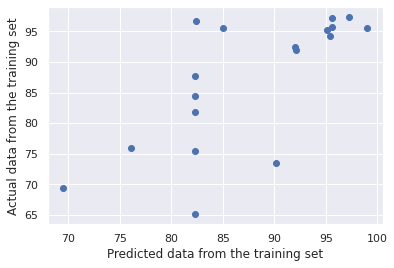

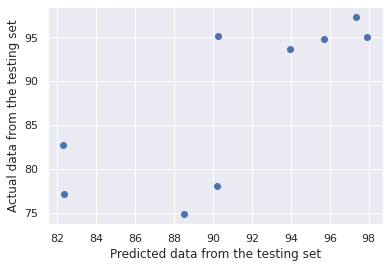

The test error (RMSE) is: 6.65
The training error (RMSE) is: 7.41
Coefficient of determination: 0.42


In [ ]:
# Model fitting

regr = svm.SVR(C = 100000.0, gamma= 1e-07)
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

# Visualization of training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualization of testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_svm_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_svm_test)

# The training error (RMSE)

RMSE_svm_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_svm_train)

# The coefficient of determination: 1 is perfect prediction

coef_svm = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_svm)


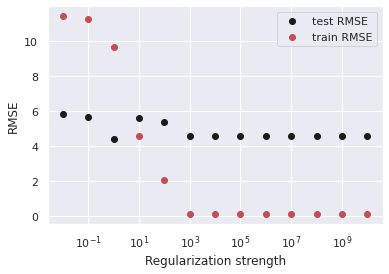

In [ ]:
# Training and predicting

for C in C_range:
  regr = svm.SVR(C=C)
  regr.fit(X_train_n, Y_train_n)

  Y_test_pred = regr.predict(X_test_n)
  Y_train_pred = regr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(C,test_RMSE,c='k')
  plt.scatter(C,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Model fitting

regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

#print coef parameters

for param,coef in zip(X.columns,regr.coef_[0]):
  print("{} : {}".format(param,np.round(coef,2)))

A : -1.95
B : 1.2
C : -0.21
a : -0.24
b : 0.02
c : -0.27
d : 0.33
e : 1.06
f : 0.03


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(svm.SVR(), X_train, Y_train, param_name="C", param_range=C_range,cv=5)


In [ ]:
train_scores

array([[-2.85427969e-01, -2.87166977e-01, -1.31619621e-01,
        -2.56658763e-01, -4.48526953e-01],
       [-2.77921556e-01, -2.77927672e-01, -1.12351160e-01,
        -2.23284719e-01, -4.22327704e-01],
       [-1.38120946e-01, -1.78182825e-01,  4.85224213e-02,
         6.20925798e-02, -1.62300921e-01],
       [ 3.53059454e-01,  3.11000021e-01,  2.21918170e-01,
         4.91630813e-01,  3.05206137e-01],
       [ 5.46358147e-01,  4.82071481e-01,  4.19742608e-01,
         7.47991560e-01,  5.10866445e-01],
       [ 5.93689316e-01,  6.91223726e-01,  5.82278490e-01,
         9.37774119e-01,  6.74440934e-01],
       [ 7.94411478e-01,  7.65595801e-01,  7.84520863e-01,
         9.46837600e-01,  7.71848335e-01],
       [ 9.40763036e-01,  8.89305686e-01,  8.78067705e-01,
         9.68559240e-01,  8.94576620e-01],
       [ 9.98340840e-01,  9.89421165e-01,  9.81841416e-01,
         9.72496220e-01,  9.85218370e-01],
       [ 9.98682115e-01,  9.99207328e-01,  9.95460188e-01,
         9.92865801e-01

In [ ]:
valid_scores

array([[-1.92106217e+00, -1.43478069e-01, -1.16405559e-03,
        -1.81254546e-01, -9.59033417e-01],
       [-1.95012653e+00, -1.26361907e-01,  5.21987607e-05,
        -1.64463224e-01, -9.10242839e-01],
       [-1.92518212e+00,  4.86301609e-02,  4.62020210e-03,
        -3.97688417e-02, -3.89907861e-01],
       [-1.17085709e+00,  3.17881556e-01,  7.10953458e-02,
         1.37940049e-02,  3.78577740e-01],
       [-1.65813073e+00,  3.00295470e-01,  4.04655203e-01,
         1.29816176e-02, -8.74530079e-02],
       [-9.80030690e-01,  3.42277983e-01,  4.17110239e-01,
         1.09103490e-01, -1.38694212e-01],
       [-8.22026150e-01,  7.91292406e-01,  3.98557408e-01,
         2.44777687e-01, -9.92792565e-01],
       [-7.52812315e-01, -3.54772650e-01,  4.75643779e-01,
         6.19291533e-01, -9.52603131e-01],
       [-8.28510790e-01,  6.81150517e-02,  4.80136054e-01,
         6.86623341e-01, -1.72155461e+00],
       [-2.55023415e+00, -5.85720114e+00, -8.32539656e+00,
         9.26422261e-01

##Gaussian process

In [ ]:
# Hyperparameter tuning

alphas = np.logspace(-4, -0.5, 4)

param_grid = dict(alpha=alphas)
grid = GridSearchCV(GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.021544346900318846} with a score of -0.86


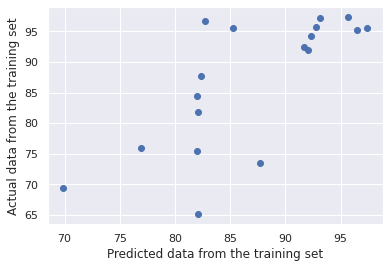

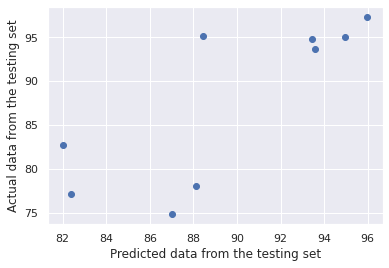

The test error (RMSE) is: 6.03
The training error (RMSE) is: 7.11
Coefficient of determination: 0.52


In [ ]:
# Model fitting
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha = 0.021544346900318846).fit(X_train, Y_train)
gpr.score(X_train, Y_train)

# Training and testing

Y_train_pred = gpr.predict(X_train)
Y_test_pred = gpr.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_gp_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_gp_test)

# The training error (RMSE)

RMSE_gp_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_gp_train)

# The coefficient of determination: 1 is perfect prediction

coef_gp = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_gp)


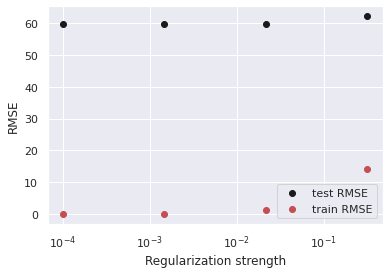

In [ ]:
# Regularization

alphas = np.logspace(-4, -0.5, 4)

# Training and predicting

for alpha in alphas:
  gpr = GaussianProcessRegressor(alpha = alpha)
  gpr.fit(X_train_n,Y_train_n)
  Y_test_pred = gpr.predict(X_test_n)
  Y_train_pred = gpr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(gpr, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[ 0.99999903,  0.99999773,  0.99939394,  0.99957736,  0.99952763],
       [ 0.99979901,  0.9995561 ,  0.98851301,  0.98669462,  0.9910342 ],
       [ 0.9704552 ,  0.95714812,  0.94468315,  0.94144566,  0.95402589],
       [-1.56668319, -1.54637823, -1.70217133, -2.33326626, -1.47871578]])

In [ ]:
valid_scores

array([[ -63.43685441,  -62.18080958,  -59.36419608,  -13.98786381,
        -128.159343  ],
       [ -63.46046524,  -62.13070445,  -59.36420389,  -13.8185538 ,
        -128.159343  ],
       [ -63.73836006,  -61.99228541,  -59.36431607,  -15.28017215,
        -128.159343  ],
       [ -65.121188  ,  -62.15497599,  -59.36556894,  -16.92454516,
        -128.159343  ]])

##Comparaison

In [ ]:
# The comparaison of test errors (RMSE) 

txt = "The test error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_test, RMSE_linear_test, RMSE_lasso_test, RMSE_knn_test, RMSE_rf_test, RMSE_svm_test, RMSE_gp_test]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The test error (RMSE) of Baseline is: 8.75
The test error (RMSE) of Linear regression is: 8.16
The test error (RMSE) of Lasso is: 6.26
The test error (RMSE) of KNN is: 5.55
The test error (RMSE) of Random forest is: 6.30
The test error (RMSE) of Support vector machine is: 6.65
The test error (RMSE) of Gaussian process is: 6.03


In [ ]:
# The comparaison of training errors (RMSE)

txt = "The training error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_train, RMSE_linear_train, RMSE_lasso_train, RMSE_knn_train, RMSE_rf_train, RMSE_svm_train, RMSE_gp_train]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The training error (RMSE) of Baseline is: 10.46
The training error (RMSE) of Linear regression is: 4.24
The training error (RMSE) of Lasso is: 7.37
The training error (RMSE) of KNN is: 7.97
The training error (RMSE) of Random forest is: 3.09
The training error (RMSE) of Support vector machine is: 7.41
The training error (RMSE) of Gaussian process is: 7.11


In [ ]:
# The comparaison of coefficient of determination: 1 is perfect prediction 

txt = "The coefficient of determination of {algo} is: {val:.2f}"

val = [coef_baseline, coef_linear, coef_lasso, coef_knn, coef_rf, coef_svm, coef_gp]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The coefficient of determination of Baseline is: -0.01
The coefficient of determination of Linear regression is: 0.12
The coefficient of determination of Lasso is: 0.48
The coefficient of determination of KNN is: 0.60
The coefficient of determination of Random forest is: 0.48
The coefficient of determination of Support vector machine is: 0.42
The coefficient of determination of Gaussian process is: 0.52


#Additional model testing (ICE without solvents g, h, i)

In [ ]:
# data prep for modelling

X = df.loc[:,'A':'f']
Y = df.loc[:,'ICE']

#drop rows missing target

X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

#test train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X_norm = (X-X.mean())/X.std()
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_norm, Y, test_size=0.33)


In [ ]:
# Inputs for the training 

X_train

,A,B,C,a,b,c,d,e,f
36,0.0,1.00,0.00,0.0,82.0,15.0,3.0,0.0,0.0
4,1.0,0.00,0.00,0.0,63.0,27.0,10.0,0.0,0.0
2,1.0,0.05,0.00,0.0,45.0,45.0,10.0,0.0,0.0
38,0.0,1.00,0.03,0.0,0.0,0.0,5.0,0.0,95.0
6,0.8,0.20,0.00,0.0,45.0,45.0,10.0,0.0,0.0
31,0.0,0.00,1.00,0.0,90.0,0.0,10.0,0.0,0.0
19,0.0,1.00,0.00,0.0,0.0,0.0,5.0,0.0,95.0
7,0.5,0.50,0.00,0.0,45.0,45.0,10.0,0.0,0.0
40,0.0,1.00,0.00,0.0,0.0,50.0,50.0,0.0,0.0
1,1.0,0.00,0.00,0.0,45.0,45.0,10.0,0.0,0.0


In [ ]:
# Inputs for the testing

X_test

,A,B,C,a,b,c,d,e,f
30,0.0,1.0,0.0,0.0,94.0,0.0,3.0,3.0,0.0
34,0.0,0.0,1.0,0.0,97.0,0.0,3.0,0.0,0.0
12,0.0,0.0,1.0,0.0,45.0,45.0,10.0,0.0,0.0
32,0.0,1.0,0.0,0.0,45.0,45.0,5.0,5.0,0.0
20,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
33,0.0,1.0,0.0,0.0,47.5,47.5,5.0,0.0,0.0
39,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,95.0
3,1.0,0.1,0.0,0.0,45.0,45.0,10.0,0.0,0.0
37,1.0,0.0,0.0,0.0,82.0,15.0,3.0,0.0,0.0
35,0.0,0.0,1.0,0.0,82.0,15.0,3.0,0.0,0.0


In [ ]:
# Outputs for the training

Y_train

36    64.85
4     79.69
2     74.31
38    61.03
6     73.81
31    65.60
19    62.06
7     66.28
40    56.32
1     76.46
29    71.46
0     83.29
24    65.52
42    62.47
41    53.27
10    81.61
8     70.46
16    48.73
15    60.55
5     80.34
Name: ICE, dtype: float64

In [ ]:
# Outputs for the testing

Y_test

30    58.33
34    66.06
12    78.48
32    52.28
20    52.98
33    53.24
39    59.66
3     76.57
37    71.77
35    75.44
Name: ICE, dtype: float64

##Constant estimate baseline

In [ ]:
#Always predict mean of training set target

Y_train_pred = Y_train.mean()*np.ones(Y_train.size)
Y_test_pred = Y_train.mean()*np.ones(Y_test.size)

# The test error, mean squared error (RMSE)

RMSE_baseline_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_baseline_test)

# The training error (RMSE)

RMSE_baseline_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_baseline_train)

# The coefficient of determination: 1 is perfect prediction

coef_baseline = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_baseline)


The test error (RMSE) is: 10.51
The training error (RMSE) is: 9.46
Coefficient of determination: -0.12


##Linear regression

[2.58, -12.19, -4.84, 0.13, 0.01, 0.08, -0.2, -1.34, 0.03]


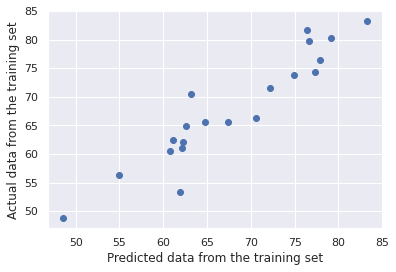

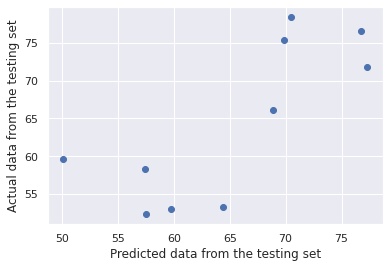

Coefficients: 
 [  2.57624621 -12.18605416  -4.83931376   0.13296416   0.01390243
   0.08454877  -0.19934091  -1.33545097   0.02650765]
The test error (RMSE) is: 6.50
The training error (RMSE) is: 3.24
Coefficient of determination: 0.57


In [ ]:
#Linear model fitting

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print([round(x,2) for x in reg.coef_])

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
# plt.plot([55,80],[55,80])
plt.show()

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
# plt.plot([55,80],[55,80])
plt.show()

# The coefficients

print("Coefficients: \n", reg.coef_)

# The test error (RMSE)

RMSE_linear_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_linear_test)

# The training error (RMSE)

RMSE_linear_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_linear_train)

# The coefficient of determination: 1 is perfect prediction

coef_linear = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_linear)



In [ ]:
#print coef parameters

for param,coef in zip(X.columns,reg.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : 2.58
B : -12.19
C : -4.84
a : 0.13
b : 0.01
c : 0.08
d : -0.2
e : -1.34
f : 0.03


##Lasso

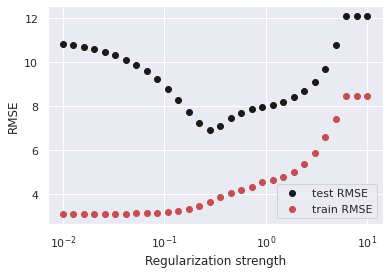

In [ ]:
# Regularization

alphas = np.logspace(-2, 1, 30)

# Training and predicting

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_n,Y_train_n)
  Y_test_pred = lasso.predict(X_test_n)
  Y_train_pred = lasso.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


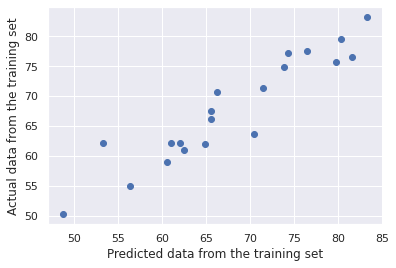

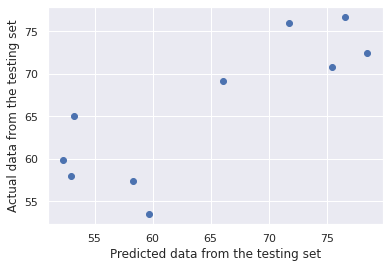

The test error (RMSE) is: 5.89
The training error (RMSE) is: 3.32
Coefficient of determination: 0.65


In [ ]:
# Training

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
#print coef parameters

for param,coef in zip(X.columns,lasso.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : 5.19
B : -8.78
C : -0.0
a : 0.15
b : 0.02
c : 0.13
d : -0.21
e : -0.96
f : 0.04


In [ ]:
# Hyperparameter tuning

param_grid = dict(alpha=alphas)
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+00, tolerance: 1.199e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


The best parameters are {'alpha': 0.727895384398315} with a score of 0.48


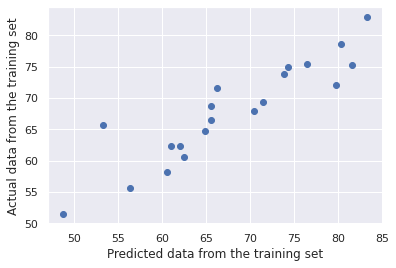

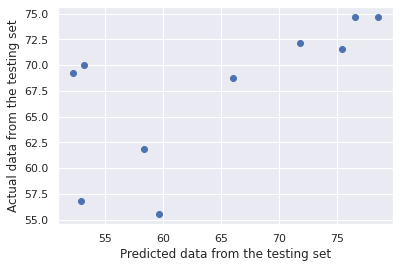

The test error (RMSE) is: 8.09
The training error (RMSE) is: 4.05
Coefficient of determination: 0.34


In [ ]:
# Training

lasso = Lasso(alpha=0.727895384398315)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(lasso, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+00, tolerance: 1.199e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
train_scores

array([[0.89218753, 0.89813016, 0.87256843, 0.94513917, 0.89881325],
       [0.89217655, 0.89809752, 0.87251468, 0.94489118, 0.89863177],
       [0.89215886, 0.89804505, 0.87242809, 0.94475511, 0.89860945],
       [0.89213039, 0.89796075, 0.87228869, 0.94455985, 0.89857332],
       [0.89208452, 0.89782332, 0.87206415, 0.94424539, 0.89851551],
       [0.89201066, 0.89776104, 0.87170255, 0.94373901, 0.89842198],
       [0.89193213, 0.8976616 , 0.87112015, 0.94292356, 0.89827225],
       [0.8918076 , 0.89750154, 0.87023644, 0.94161044, 0.89802956],
       [0.89160707, 0.89724384, 0.86992661, 0.93949594, 0.89763996],
       [0.89128418, 0.89682883, 0.86942704, 0.9361754 , 0.8970022 ],
       [0.89076424, 0.89616064, 0.86862166, 0.93317148, 0.89598261],
       [0.88992702, 0.89508357, 0.86732468, 0.92820148, 0.8943398 ],
       [0.88857888, 0.89335294, 0.86523634, 0.92608096, 0.8920328 ],
       [0.88640801, 0.89056532, 0.86187333, 0.92408856, 0.8879894 ],
       [0.88291238, 0.88607435, 0.

In [ ]:
valid_scores

array([[ 0.58591837, -0.18412583, -1.38082675,  0.57423952,  0.70946191],
       [ 0.58537434, -0.19230394, -1.38655099,  0.57702169,  0.70727416],
       [ 0.58466677, -0.20272332, -1.39391419,  0.57786398,  0.70837912],
       [ 0.58375103, -0.21602074, -1.40340884,  0.57830407,  0.70978724],
       [ 0.58254884, -0.23276573, -1.41570987,  0.57817439,  0.71152443],
       [ 0.58096614, -0.2125888 , -1.43171972,  0.57690174,  0.71372808],
       [ 0.58388038, -0.18600321, -1.45268402,  0.57350251,  0.71643059],
       [ 0.58766859, -0.15301177, -1.47654704,  0.56631588,  0.71985067],
       [ 0.59231007, -0.11226351, -1.42213126,  0.55256999,  0.72402152],
       [ 0.59792078, -0.06230745, -1.35462045,  0.52834667,  0.72945358],
       [ 0.60460472, -0.00181542, -1.27112406,  0.5205296 ,  0.7357849 ],
       [ 0.61238368,  0.07084783, -1.16780625,  0.51037378,  0.74331505],
       [ 0.62112331,  0.15463116, -1.04085197,  0.49471023,  0.73803528],
       [ 0.63039834,  0.24875675, -0.8

##KNN

In [ ]:
# Hyperparameter tuning

k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 2} with a score of 0.16


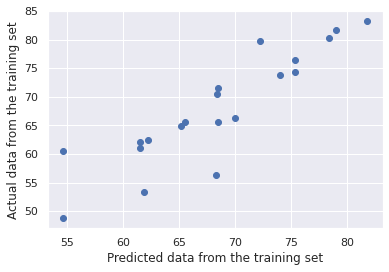

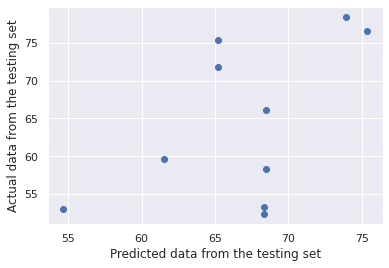

The test error (RMSE) is: 8.79
The training error (RMSE) is: 4.44
Coefficient of determination: 0.22


In [ ]:
# Model fitting

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

# Predicting all values

Y_train_pred = neigh.predict(X_train)
Y_test_pred = neigh.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing predictions

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_knn_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_knn_test)

# The training error (RMSE)

RMSE_knn_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_knn_train)

# The coefficient of determination: 1 is perfect prediction

coef_knn = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_knn)


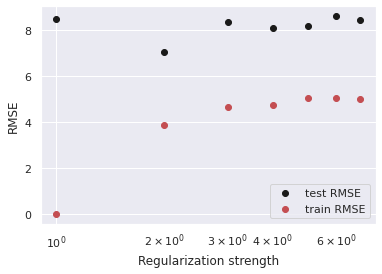

In [ ]:
# Regularization

k_range = list(range(1, 8))

# Training and predicting

for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_n,Y_train_n)
  Y_test_pred = neigh.predict(X_test_n)
  Y_train_pred = neigh.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(k,test_RMSE,c='k')
  plt.scatter(k,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(neigh, X_train, Y_train, param_name="n_neighbors", param_range=k_range,cv=5)


In [ ]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.78038641, 0.75556443, 0.81601212, 0.76723755, 0.73057317],
       [0.71249495, 0.6630019 , 0.74786933, 0.63524683, 0.46751593],
       [0.49340343, 0.49772537, 0.64171958, 0.56718991, 0.41056454],
       [0.43190942, 0.32560098, 0.4946978 , 0.49292766, 0.33214859],
       [0.33076369, 0.24307743, 0.37008499, 0.4019667 , 0.22707145],
       [0.21777708, 0.12200053, 0.25977221, 0.21429822, 0.19449712]])

In [ ]:
valid_scores

array([[ 9.23997959e-01, -2.22662772e+00, -5.89939980e-01,
         1.45006456e-01,  8.06897957e-01],
       [ 8.33693587e-01, -1.01182749e+00, -7.32129810e-02,
         3.30654609e-01,  7.31976144e-01],
       [ 8.98616351e-01, -9.33716892e-01,  5.91696508e-02,
         1.95443227e-01,  4.46323651e-01],
       [ 7.95640932e-01, -7.79316237e-01,  2.25353343e-01,
        -6.22436338e-02,  1.00231651e-01],
       [ 7.35332811e-01, -4.20054197e-01,  2.84415967e-01,
        -1.19826308e-01, -6.13443757e-02],
       [ 4.44232566e-01, -4.67454734e-01, -1.23101917e-03,
        -1.92652554e-01, -2.56487497e-01],
       [ 3.54154207e-01, -4.83037580e-01, -5.76742943e-03,
        -2.75219666e-01, -5.61432744e-01]])

##Random forest

In [ ]:
# Hyperparameter tuning

n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 10, 'n_estimators': 10} with a score of 0.63


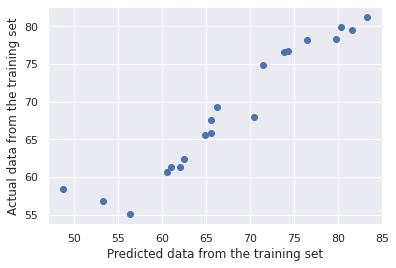

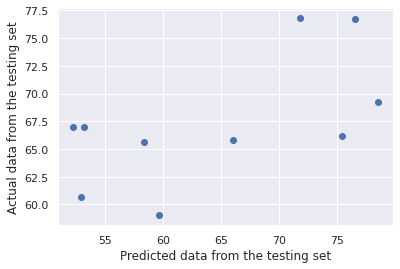

The test error (RMSE) is: 8.44
The training error (RMSE) is: 2.90
Coefficient of determination: 0.28


In [ ]:
# Model fitting

rf_reg = RandomForestRegressor(max_depth= 3, n_estimators= 10)
rf_reg.fit(X_train,Y_train)

# Predicting

Y_test_pred = rf_reg.predict(X_test)
Y_train_pred = rf_reg.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([70,100],[70,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([70,100],[70,100])
plt.show()

# The test error, mean squared error (RMSE)

RMSE_rf_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_rf_test)

# The training error (RMSE)

RMSE_rf_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_rf_train)

# The coefficient of determination: 1 is perfect prediction

coef_rf = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_rf)


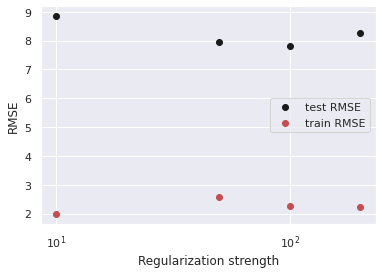

In [ ]:
# Regularization

n_estimators = [10, 50, 100, 200]

# Training and predicting

for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators= n)
  rf_reg.fit(X_train_n,Y_train_n)
  Y_test_pred = rf_reg.predict(X_test_n)
  Y_train_pred = rf_reg.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(n,test_RMSE,c='k')
  plt.scatter(n,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
#print coef parameters

for param,importance in zip(X.columns,rf_reg.feature_importances_):
  print("{} : {}".format(param,round(importance,2)))

A : 0.11
B : 0.43
C : 0.02
a : 0.0
b : 0.14
c : 0.24
d : 0.04
e : 0.01
f : 0.02


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(rf_reg, X_train, Y_train, param_name="n_estimators", param_range=n_estimators,cv=5)


In [ ]:
train_scores

array([[0.92347219, 0.87777329, 0.87600986, 0.92393963, 0.95453665],
       [0.93556889, 0.94148266, 0.91660223, 0.93407104, 0.96209446],
       [0.92917779, 0.94297689, 0.93455412, 0.95020653, 0.96275117],
       [0.92971345, 0.94983153, 0.94616284, 0.94417265, 0.96454988]])

In [ ]:
valid_scores

array([[0.91668579, 0.41904686, 0.66593726, 0.33052636, 0.54223085],
       [0.92638525, 0.3497943 , 0.79661579, 0.39236835, 0.5405246 ],
       [0.89967359, 0.010649  , 0.77242385, 0.43920232, 0.53336465],
       [0.90831443, 0.23860007, 0.81443361, 0.419198  , 0.51553766]])

##Support vector machine

In [ ]:
# Hyperparameter tuning

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVR(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10000000.0, 'gamma': 1e-07} with a score of 0.53


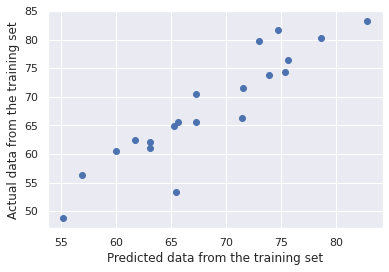

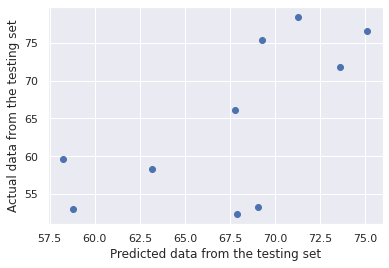

The test error (RMSE) is: 8.07
The training error (RMSE) is: 4.07
Coefficient of determination: 0.34


In [ ]:
# Model fitting

regr = svm.SVR(C = 10000000.0, gamma= 1e-07)
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

# Visualization of training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualization of testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_svm_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_svm_test)

# The training error (RMSE)

RMSE_svm_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_svm_train)

# The coefficient of determination: 1 is perfect prediction

coef_svm = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_svm)


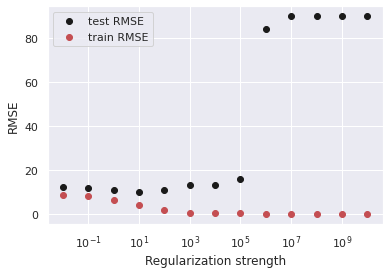

In [ ]:
# Training and predicting

for C in C_range:
  regr = svm.SVR(C=C)
  regr.fit(X_train_n, Y_train_n)

  Y_test_pred = regr.predict(X_test_n)
  Y_train_pred = regr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(C,test_RMSE,c='k')
  plt.scatter(C,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Model fitting

regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

#print coef parameters

for param,coef in zip(X.columns,regr.coef_[0]):
  print("{} : {}".format(param,np.round(coef,2)))

A : 2.5
B : -3.4
C : -0.18
a : 0.21
b : 0.06
c : 0.23
d : -0.32
e : 0.0
f : 0.03


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(svm.SVR(), X_train, Y_train, param_name="C", param_range=C_range,cv=5)


In [ ]:
train_scores

array([[-1.97562953e-02,  1.76619455e-03, -1.86320136e-02,
         2.52435008e-03, -9.44017764e-02],
       [-2.77492133e-03,  1.94275809e-02,  1.23360800e-02,
         2.52317393e-02, -7.77482799e-02],
       [ 9.62015600e-02,  1.64332587e-01,  1.62341842e-01,
         2.11560758e-01,  2.01579128e-02],
       [ 4.58560004e-01,  4.70610887e-01,  4.01503638e-01,
         6.13286133e-01,  3.50252973e-01],
       [ 6.20362150e-01,  5.80846500e-01,  4.15930029e-01,
         7.16678803e-01,  5.03439320e-01],
       [ 8.49792722e-01,  7.81479826e-01,  7.54111220e-01,
         8.48285065e-01,  6.52979652e-01],
       [ 9.20618737e-01,  9.57324296e-01,  9.01245383e-01,
         9.36468675e-01,  9.32069958e-01],
       [ 9.59818520e-01,  9.93480318e-01,  9.56152829e-01,
         9.68166672e-01,  9.74519100e-01],
       [ 9.72786773e-01,  9.99325312e-01,  9.69954389e-01,
         9.68487502e-01,  9.97591085e-01],
       [ 9.74757781e-01,  9.99858299e-01,  9.74102963e-01,
         9.70834907e-01

In [ ]:
valid_scores

array([[-2.92251763e-01, -5.18146060e-02, -4.04799083e-01,
        -6.53892983e-02, -4.56447000e-03],
       [-2.59075925e-01,  2.37828894e-02, -3.90704527e-01,
        -4.88175093e-02,  9.70505894e-03],
       [-9.85938772e-02,  5.26984576e-01, -3.87954080e-01,
         2.51005816e-02,  8.23802391e-02],
       [ 2.98093693e-01,  1.41253215e-01, -1.28351425e-01,
        -7.31637811e-02, -8.53958731e-02],
       [ 2.99012913e-01,  1.09539141e-01,  3.50071701e-02,
        -1.59963855e-02, -3.66070465e-01],
       [-1.09156493e-01, -2.37567812e-01, -1.82631153e+00,
        -1.87626228e-01, -1.86892380e+00],
       [-2.09223356e-02, -1.09323505e-01, -1.40981221e+01,
        -1.59623444e-01, -4.61424343e-01],
       [ 2.20025385e-01, -7.68172124e-02, -1.21378215e+01,
        -1.43936606e-01,  4.28382482e-01],
       [ 5.59903420e-01, -2.79238303e-03, -6.08317788e+00,
         7.40211967e-03,  4.90168002e-01],
       [ 5.23712117e-01,  2.15963260e-02, -1.87221188e+01,
         6.04397104e-01

##Gaussian process

In [ ]:
# Hyperparameter tuning

alphas = np.logspace(-4, -0.5, 4)

param_grid = dict(alpha=alphas)
grid = GridSearchCV(GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.31622776601683794} with a score of 0.15


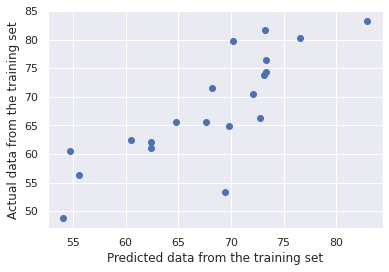

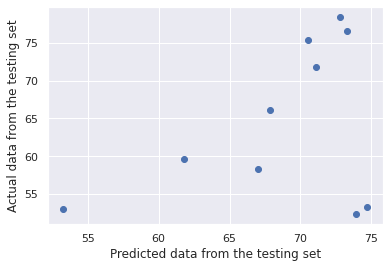

The test error (RMSE) is: 10.40
The training error (RMSE) is: 5.49
Coefficient of determination: -0.10


In [ ]:
# Model fitting
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha = 0.31622776601683794).fit(X_train, Y_train)
gpr.score(X_train, Y_train)

# Training and testing

Y_train_pred = gpr.predict(X_train)
Y_test_pred = gpr.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_gp_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_gp_test)

# The training error (RMSE)

RMSE_gp_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_gp_train)

# The coefficient of determination: 1 is perfect prediction

coef_gp = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_gp)


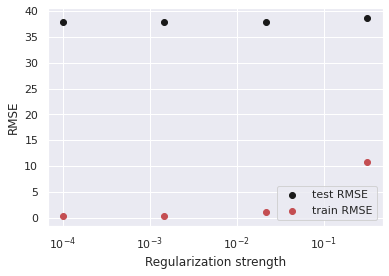

In [ ]:
# Regularization

alphas = np.logspace(-4, -0.5, 4)

# Training and predicting

for alpha in alphas:
  gpr = GaussianProcessRegressor(alpha = alpha)
  gpr.fit(X_train_n,Y_train_n)
  Y_test_pred = gpr.predict(X_test_n)
  Y_train_pred = gpr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(gpr, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[ 0.99999381,  0.99998039,  0.99997264,  0.99995282,  0.99996043],
       [ 0.9994909 ,  0.99910588,  0.99883242,  0.99825142,  0.99897481],
       [ 0.97418522,  0.98447107,  0.96859749,  0.97172629,  0.97798033],
       [-0.75321169, -0.71367886, -0.94856121, -1.04945422, -1.04807006]])

In [ ]:
valid_scores

array([[-47.11502906, -58.45030754, -30.39642152, -18.80688371,
        -22.71622767],
       [-47.11460002, -60.70684414, -30.40308313, -18.90737383,
        -22.96662628],
       [-47.10444825, -62.85350186, -30.52452704, -19.14164303,
        -23.77799605],
       [-48.12555104, -62.14068903, -32.0894076 , -20.59015467,
        -24.03321383]])

##Comparaison

In [ ]:
# The comparaison of test errors (RMSE) 

txt = "The test error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_test, RMSE_linear_test, RMSE_lasso_test, RMSE_knn_test, RMSE_rf_test, RMSE_svm_test, RMSE_gp_test]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The test error (RMSE) of Baseline is: 10.51
The test error (RMSE) of Linear regression is: 6.50
The test error (RMSE) of Lasso is: 8.09
The test error (RMSE) of KNN is: 8.79
The test error (RMSE) of Random forest is: 8.44
The test error (RMSE) of Support vector machine is: 8.07
The test error (RMSE) of Gaussian process is: 10.40


In [ ]:
# The comparaison of training errors (RMSE)

txt = "The training error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_train, RMSE_linear_train, RMSE_lasso_train, RMSE_knn_train, RMSE_rf_train, RMSE_svm_train, RMSE_gp_train]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The training error (RMSE) of Baseline is: 9.46
The training error (RMSE) of Linear regression is: 3.24
The training error (RMSE) of Lasso is: 4.05
The training error (RMSE) of KNN is: 4.44
The training error (RMSE) of Random forest is: 2.90
The training error (RMSE) of Support vector machine is: 4.07
The training error (RMSE) of Gaussian process is: 5.49


In [ ]:
# The comparaison of coefficient of determination: 1 is perfect prediction 

txt = "The coefficient of determination of {algo} is: {val:.2f}"

val = [coef_baseline, coef_linear, coef_lasso, coef_knn, coef_rf, coef_svm, coef_gp]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The coefficient of determination of Baseline is: -0.12
The coefficient of determination of Linear regression is: 0.57
The coefficient of determination of Lasso is: 0.34
The coefficient of determination of KNN is: 0.22
The coefficient of determination of Random forest is: 0.28
The coefficient of determination of Support vector machine is: 0.34
The coefficient of determination of Gaussian process is: -0.10


#Additional model testing (constraining outputs from 0 to 100)

In [ ]:
# data prep for modelling

X = df.loc[:,'A':'f']
Y = df.loc[:,'R_50']

#drop rows missing target

X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

#test train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X_norm = (X-X.mean())/X.std()
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_norm, Y, test_size=0.33)


In [ ]:
# Inputs for the training 

X_train

,A,B,C,a,b,c,d,e,f
2,1.0,0.05,0.0,0.0,45.0,45.0,10.0,0.0,0.0
37,1.0,0.00,0.0,0.0,82.0,15.0,3.0,0.0,0.0
6,0.8,0.20,0.0,0.0,45.0,45.0,10.0,0.0,0.0
34,0.0,0.00,1.0,0.0,97.0,0.0,3.0,0.0,0.0
19,0.0,1.00,0.0,0.0,0.0,0.0,5.0,0.0,95.0
7,0.5,0.50,0.0,0.0,45.0,45.0,10.0,0.0,0.0
40,0.0,1.00,0.0,0.0,0.0,50.0,50.0,0.0,0.0
1,1.0,0.00,0.0,0.0,45.0,45.0,10.0,0.0,0.0
29,1.0,0.00,0.0,0.0,94.0,0.0,3.0,3.0,0.0
0,1.0,0.00,0.0,45.0,0.0,45.0,10.0,0.0,0.0


In [ ]:
# Inputs for the testing

X_test

,A,B,C,a,b,c,d,e,f
30,0.0,1.0,0.0,0.0,94.0,0.0,3.0,3.0,0.0
20,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
31,0.0,0.0,1.0,0.0,90.0,0.0,10.0,0.0,0.0
3,1.0,0.1,0.0,0.0,45.0,45.0,10.0,0.0,0.0
39,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,95.0
12,0.0,0.0,1.0,0.0,45.0,45.0,10.0,0.0,0.0
35,0.0,0.0,1.0,0.0,82.0,15.0,3.0,0.0,0.0
36,0.0,1.0,0.0,0.0,82.0,15.0,3.0,0.0,0.0
4,1.0,0.0,0.0,0.0,63.0,27.0,10.0,0.0,0.0


In [ ]:
# Outputs for the training

Y_train

2     84.40
37    73.42
6     81.78
34    94.33
19    97.40
7     87.79
40    95.18
1     75.42
29    95.69
0     69.39
24    97.23
42    95.57
41    95.48
10    65.07
8     96.65
16    91.99
15    92.45
5     75.96
Name: R_50, dtype: float64

In [ ]:
# Outputs for the testing

Y_test

30    94.76
20    93.68
31    94.98
3     82.66
39    97.34
12    77.11
35    78.05
36    95.16
4     74.79
Name: R_50, dtype: float64

##Constant estimate baseline

In [ ]:
#Always predict mean of training set target

Y_train_pred = Y_train.mean()*np.ones(Y_train.size)
Y_test_pred = Y_train.mean()*np.ones(Y_test.size)

# The test error, mean squared error (RMSE)

RMSE_baseline_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_baseline_test)

# The training error (RMSE)

RMSE_baseline_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_baseline_train)

# The coefficient of determination: 1 is perfect prediction

coef_baseline = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_baseline)


The test error (RMSE) is: 8.75
The training error (RMSE) is: 10.46
Coefficient of determination: -0.01


In [ ]:
def constraint(numbers):
  
  for number in numbers:
    if number > 100:
      text = "There is a value greater than 100"
    elif number < 0:
      text = "There is a value smaller than 0" 
    else:
      text = "All values are between 0 and 100"

  print(text)

constraint(Y_train_pred)


All values are between 0 and 100


In [ ]:
constraint(Y_test_pred)

All values are between 0 and 100


##Linear regression

[-20.44, 0.4, -13.07, -0.04, 0.11, -0.02, 0.08, 3.82, 0.04]


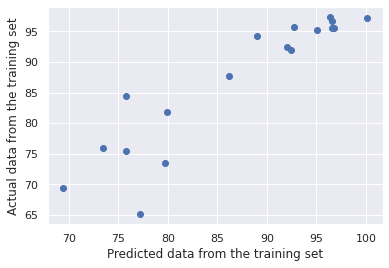

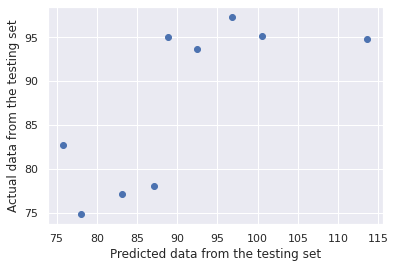

Coefficients: 
 [-20.43538847   0.40319434 -13.0731994   -0.03615016   0.10513644
  -0.02203804   0.0828649    3.82255511   0.04186606]
The test error (RMSE) is: 8.16
The training error (RMSE) is: 4.24
Coefficient of determination: 0.12


In [ ]:
#Linear model fitting

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print([round(x,2) for x in reg.coef_])

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
# plt.plot([55,80],[55,80])
plt.show()

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
# plt.plot([55,80],[55,80])
plt.show()

# The coefficients

print("Coefficients: \n", reg.coef_)

# The test error (RMSE)

RMSE_linear_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_linear_test)

# The training error (RMSE)

RMSE_linear_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_linear_train)

# The coefficient of determination: 1 is perfect prediction

coef_linear = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_linear)



In [ ]:
#print coef parameters

for param,coef in zip(X.columns,reg.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -20.44
B : 0.4
C : -13.07
a : -0.04
b : 0.11
c : -0.02
d : 0.08
e : 3.82
f : 0.04


In [ ]:
constraint(Y_test_pred)

All values are between 0 and 100


In [ ]:
constraint(Y_train_pred)

All values are between 0 and 100


##Lasso

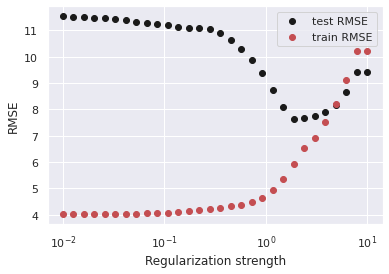

In [ ]:
# Regularization

alphas = np.logspace(-2, 1, 30)

# Training and predicting

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_n,Y_train_n)
  Y_test_pred = lasso.predict(X_test_n)
  Y_train_pred = lasso.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


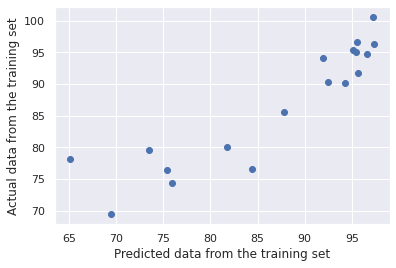

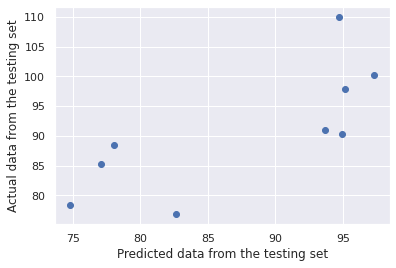

The test error (RMSE) is: 7.45
The training error (RMSE) is: 4.36
Coefficient of determination: 0.27


In [ ]:
# Training

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
#print coef parameters

for param,coef in zip(X.columns,lasso.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -14.41
B : 3.88
C : -5.51
a : -0.06
b : 0.09
c : -0.02
d : 0.12
e : 3.58
f : 0.06


In [ ]:
# Hyperparameter tuning

param_grid = dict(alpha=alphas)
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 6.2101694189156165} with a score of 0.29


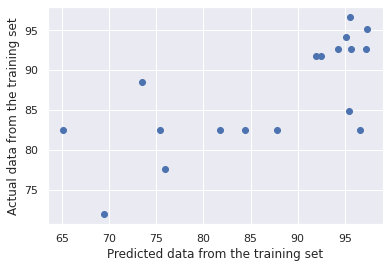

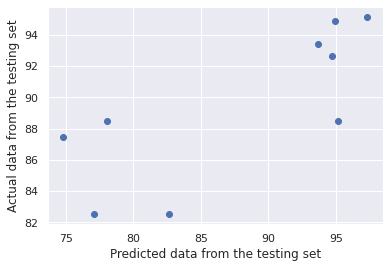

The test error (RMSE) is: 6.26
The training error (RMSE) is: 7.37
Coefficient of determination: 0.48


In [ ]:
# Training

lasso = Lasso(alpha=6.2101694189156165)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(lasso, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[0.95837695, 0.80728207, 0.79683432, 0.89317376, 0.83660952],
       [0.95830463, 0.80722809, 0.79677879, 0.89292871, 0.83659123],
       [0.95818818, 0.80714116, 0.79668935, 0.89253621, 0.83656179],
       [0.95796629, 0.80700121, 0.7965453 , 0.89190698, 0.83651438],
       [0.95760502, 0.80677583, 0.79631321, 0.89093386, 0.83643718],
       [0.9570233 , 0.80639879, 0.79593944, 0.88931539, 0.8333237 ],
       [0.95608658, 0.80583005, 0.79533764, 0.88679401, 0.83324267],
       [0.95457822, 0.80489027, 0.79436827, 0.88642262, 0.83311223],
       [0.95214942, 0.80337655, 0.79280719, 0.88578522, 0.83290211],
       [0.94823839, 0.80100263, 0.79029363, 0.8847588 , 0.83256379],
       [0.94222529, 0.79711634, 0.7895777 , 0.88310566, 0.83201897],
       [0.93313732, 0.79085847, 0.78880823, 0.88156282, 0.83114168],
       [0.91762408, 0.78078156, 0.787569  , 0.87930704, 0.82972896],
       [0.89438858, 0.77812523, 0.78557345, 0.87567447, 0.82745387],
       [0.85523239, 0.77436162, 0.

In [ ]:
valid_scores

array([[-5.75263530e+00,  8.76216458e-01,  2.40875876e-01,
         6.28423938e-01, -3.11182722e+00],
       [-5.62378051e+00,  8.62282618e-01,  2.38185927e-01,
         6.22011569e-01, -3.09855965e+00],
       [-5.46227628e+00,  8.43269948e-01,  2.34749746e-01,
         6.12842058e-01, -3.08174811e+00],
       [-5.25990917e+00,  8.17007498e-01,  2.30352619e-01,
         5.99544340e-01, -3.06046507e+00],
       [-5.00825274e+00,  7.80227749e-01,  2.24715077e-01,
         5.80687147e-01, -3.03301058e+00],
       [-4.69729636e+00,  7.26027767e-01,  2.17465348e-01,
         5.51550944e-01, -1.41372997e+00],
       [-4.31619996e+00,  6.53512354e-01,  2.08109436e-01,
         5.08822430e-01, -1.38646590e+00],
       [-3.85433970e+00,  5.43929530e-01,  1.95990476e-01,
         4.98889866e-01, -1.35218375e+00],
       [-3.30327126e+00,  3.81698573e-01,  1.80211207e-01,
         4.84390980e-01, -1.30895700e+00],
       [-2.66034227e+00,  1.84638706e-01,  1.59540227e-01,
         4.64906613e-01

In [ ]:
constraint(Y_test_pred)

All values are between 0 and 100


In [ ]:
constraint(Y_train_pred)

All values are between 0 and 100


##KNN

In [ ]:
# Hyperparameter tuning

k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 4} with a score of 0.25


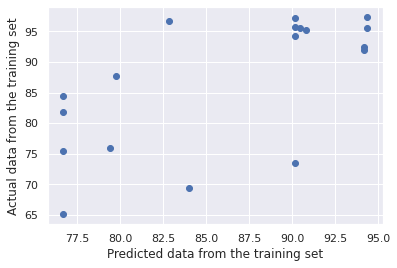

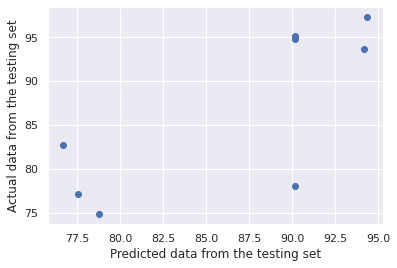

The test error (RMSE) is: 5.55
The training error (RMSE) is: 7.97
Coefficient of determination: 0.60


In [ ]:
# Model fitting

neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, Y_train)

# Predicting all values

Y_train_pred = neigh.predict(X_train)
Y_test_pred = neigh.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing predictions

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_knn_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_knn_test)

# The training error (RMSE)

RMSE_knn_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_knn_train)

# The coefficient of determination: 1 is perfect prediction

coef_knn = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_knn)


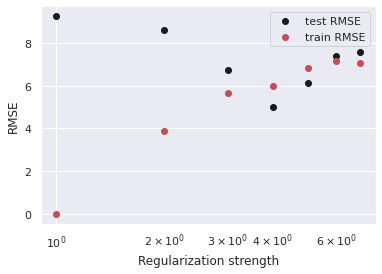

In [ ]:
# Regularization

k_range = list(range(1, 8))

# Training and predicting

for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_n,Y_train_n)
  Y_test_pred = neigh.predict(X_test_n)
  Y_train_pred = neigh.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(k,test_RMSE,c='k')
  plt.scatter(k,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(neigh, X_train, Y_train, param_name="n_neighbors", param_range=k_range,cv=5)


In [ ]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.81658346, 0.82621516, 0.70271288, 0.78560186, 0.78060812],
       [0.53143021, 0.4762415 , 0.51146987, 0.61838027, 0.53982501],
       [0.29884351, 0.30214407, 0.41004113, 0.46822578, 0.38897021],
       [0.25350884, 0.1891083 , 0.35391215, 0.44063802, 0.25507954],
       [0.27339769, 0.16104265, 0.28294044, 0.26796273, 0.18364962],
       [0.20827608, 0.15129541, 0.18364116, 0.15717065, 0.12635119]])

In [ ]:
valid_scores

array([[-1.80897309, -0.66151207,  0.89473198,  0.61824797,  0.87722792],
       [-2.90186425, -0.24283312, -0.07571774,  0.31650015,  0.74327925],
       [-0.9205633 ,  0.43064758, -0.81977449,  0.21998973,  0.86741716],
       [ 0.23130023,  0.49525757, -0.37840374, -0.05364096,  0.9600236 ],
       [-0.00726819,  0.14178749, -0.34422469, -0.10175559,  0.41605872],
       [-0.051592  ,  0.14970763, -0.52799726, -0.16500401,  0.24293714],
       [-0.14115094, -0.19217233, -0.17927051, -0.0654665 , -0.32618681]])

In [ ]:
constraint(Y_test_pred)

All values are between 0 and 100


In [ ]:
constraint(Y_train_pred)

All values are between 0 and 100


##Random forest

In [ ]:
# Hyperparameter tuning

n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 20, 'n_estimators': 10} with a score of 0.49


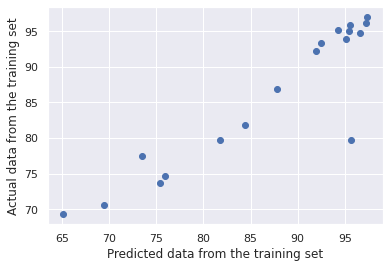

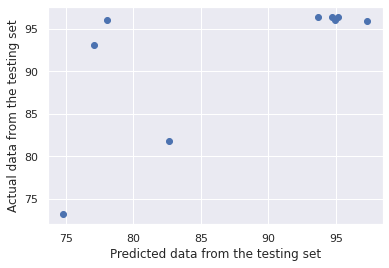

The test error (RMSE) is: 8.16
The training error (RMSE) is: 4.20
Coefficient of determination: 0.13


In [ ]:
# Model fitting

rf_reg = RandomForestRegressor(max_depth= 20, n_estimators= 10)
rf_reg.fit(X_train,Y_train)

# Predicting

Y_test_pred = rf_reg.predict(X_test)
Y_train_pred = rf_reg.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([70,100],[70,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([70,100],[70,100])
plt.show()

# The test error, mean squared error (RMSE)

RMSE_rf_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_rf_test)

# The training error (RMSE)

RMSE_rf_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_rf_train)

# The coefficient of determination: 1 is perfect prediction

coef_rf = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_rf)


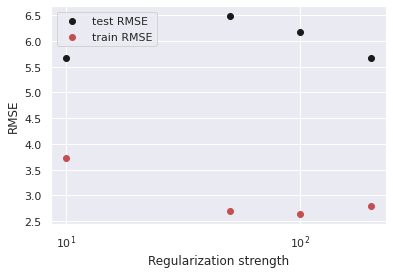

In [ ]:
# Regularization

n_estimators = [10, 50, 100, 200]

# Training and predicting

for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators= n)
  rf_reg.fit(X_train_n,Y_train_n)
  Y_test_pred = rf_reg.predict(X_test_n)
  Y_train_pred = rf_reg.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(n,test_RMSE,c='k')
  plt.scatter(n,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
#print coef parameters

for param,importance in zip(X.columns,rf_reg.feature_importances_):
  print("{} : {}".format(param,round(importance,2)))

A : 0.48
B : 0.14
C : 0.04
a : 0.02
b : 0.04
c : 0.22
d : 0.02
e : 0.03
f : 0.0


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(rf_reg, X_train, Y_train, param_name="n_estimators", param_range=n_estimators,cv=5)


In [ ]:
train_scores

array([[0.89495115, 0.88252696, 0.9754752 , 0.91751155, 0.90210587],
       [0.90700926, 0.92435589, 0.93915837, 0.91472019, 0.91652757],
       [0.92606878, 0.92170105, 0.92992373, 0.90819027, 0.90829862],
       [0.9243056 , 0.91462701, 0.93837311, 0.91088784, 0.93214449]])

In [ ]:
valid_scores

array([[ 0.00714257,  0.88912524,  0.12510922,  0.65669568,  0.75999437],
       [-0.20924908,  0.79911009, -0.10712689,  0.72799617,  0.85037633],
       [-0.45766672,  0.89804869, -0.15025722,  0.73156451,  0.81747249],
       [-0.38101166,  0.82272097, -0.09904692,  0.69741322,  0.80670857]])

In [ ]:
constraint(Y_test_pred)

All values are between 0 and 100


In [ ]:
constraint(Y_train_pred)

All values are between 0 and 100


##Support vector machine

In [ ]:
# Hyperparameter tuning

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVR(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100000.0, 'gamma': 1e-07} with a score of 0.27


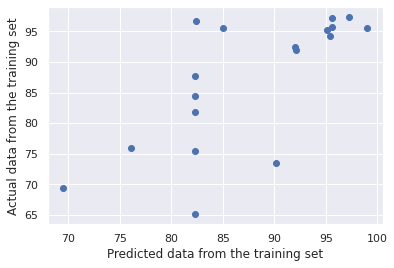

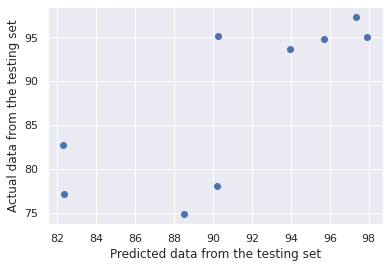

The test error (RMSE) is: 6.65
The training error (RMSE) is: 7.41
Coefficient of determination: 0.42


In [ ]:
# Model fitting

regr = svm.SVR(C = 100000.0, gamma= 1e-07)
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

# Visualization of training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualization of testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_svm_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_svm_test)

# The training error (RMSE)

RMSE_svm_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_svm_train)

# The coefficient of determination: 1 is perfect prediction

coef_svm = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_svm)


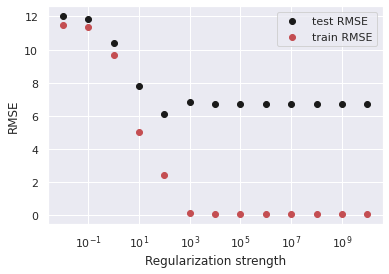

In [ ]:
# Training and predicting

for C in C_range:
  regr = svm.SVR(C=C)
  regr.fit(X_train_n, Y_train_n)

  Y_test_pred = regr.predict(X_test_n)
  Y_train_pred = regr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(C,test_RMSE,c='k')
  plt.scatter(C,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Model fitting

regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

#print coef parameters

for param,coef in zip(X.columns,regr.coef_[0]):
  print("{} : {}".format(param,np.round(coef,2)))

A : -1.95
B : 1.2
C : -0.21
a : -0.24
b : 0.02
c : -0.27
d : 0.33
e : 1.06
f : 0.03


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(svm.SVR(), X_train, Y_train, param_name="C", param_range=C_range,cv=5)


In [ ]:
train_scores

array([[-2.85427969e-01, -2.87166977e-01, -1.31619621e-01,
        -2.56658763e-01, -4.48526953e-01],
       [-2.77921556e-01, -2.77927672e-01, -1.12351160e-01,
        -2.23284719e-01, -4.22327704e-01],
       [-1.38120946e-01, -1.78182825e-01,  4.85224213e-02,
         6.20925798e-02, -1.62300921e-01],
       [ 3.53059454e-01,  3.11000021e-01,  2.21918170e-01,
         4.91630813e-01,  3.05206137e-01],
       [ 5.46358147e-01,  4.82071481e-01,  4.19742608e-01,
         7.47991560e-01,  5.10866445e-01],
       [ 5.93689316e-01,  6.91223726e-01,  5.82278490e-01,
         9.37774119e-01,  6.74440934e-01],
       [ 7.94411478e-01,  7.65595801e-01,  7.84520863e-01,
         9.46837600e-01,  7.71848335e-01],
       [ 9.40763036e-01,  8.89305686e-01,  8.78067705e-01,
         9.68559240e-01,  8.94576620e-01],
       [ 9.98340840e-01,  9.89421165e-01,  9.81841416e-01,
         9.72496220e-01,  9.85218370e-01],
       [ 9.98682115e-01,  9.99207328e-01,  9.95460188e-01,
         9.92865801e-01

In [ ]:
valid_scores

array([[-1.92106217e+00, -1.43478069e-01, -1.16405559e-03,
        -1.81254546e-01, -9.59033417e-01],
       [-1.95012653e+00, -1.26361907e-01,  5.21987607e-05,
        -1.64463224e-01, -9.10242839e-01],
       [-1.92518212e+00,  4.86301609e-02,  4.62020210e-03,
        -3.97688417e-02, -3.89907861e-01],
       [-1.17085709e+00,  3.17881556e-01,  7.10953458e-02,
         1.37940049e-02,  3.78577740e-01],
       [-1.65813073e+00,  3.00295470e-01,  4.04655203e-01,
         1.29816176e-02, -8.74530079e-02],
       [-9.80030690e-01,  3.42277983e-01,  4.17110239e-01,
         1.09103490e-01, -1.38694212e-01],
       [-8.22026150e-01,  7.91292406e-01,  3.98557408e-01,
         2.44777687e-01, -9.92792565e-01],
       [-7.52812315e-01, -3.54772650e-01,  4.75643779e-01,
         6.19291533e-01, -9.52603131e-01],
       [-8.28510790e-01,  6.81150517e-02,  4.80136054e-01,
         6.86623341e-01, -1.72155461e+00],
       [-2.55023415e+00, -5.85720114e+00, -8.32539656e+00,
         9.26422261e-01

In [ ]:
constraint(Y_test_pred)

All values are between 0 and 100


In [ ]:
constraint(Y_train_pred)

All values are between 0 and 100


##Gaussian process

In [ ]:
# Hyperparameter tuning

alphas = np.logspace(-4, -0.5, 4)

param_grid = dict(alpha=alphas)
grid = GridSearchCV(GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.021544346900318846} with a score of -0.86


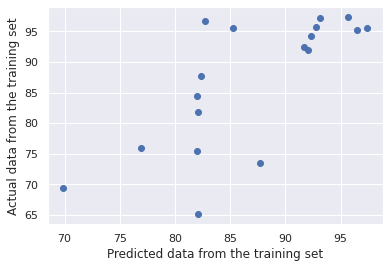

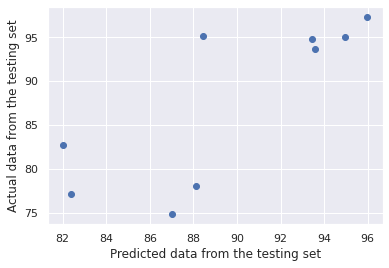

The test error (RMSE) is: 6.03
The training error (RMSE) is: 7.11
Coefficient of determination: 0.52


In [ ]:
# Model fitting
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha = 0.021544346900318846).fit(X_train, Y_train)
gpr.score(X_train, Y_train)

# Training and testing

Y_train_pred = gpr.predict(X_train)
Y_test_pred = gpr.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_gp_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_gp_test)

# The training error (RMSE)

RMSE_gp_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_gp_train)

# The coefficient of determination: 1 is perfect prediction

coef_gp = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_gp)


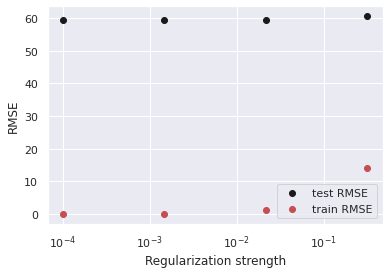

In [ ]:
# Regularization

alphas = np.logspace(-4, -0.5, 4)

# Training and predicting

for alpha in alphas:
  gpr = GaussianProcessRegressor(alpha = alpha)
  gpr.fit(X_train_n,Y_train_n)
  Y_test_pred = gpr.predict(X_test_n)
  Y_train_pred = gpr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(gpr, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[ 0.99999903,  0.99999773,  0.99939394,  0.99957736,  0.99952763],
       [ 0.99979901,  0.9995561 ,  0.98851301,  0.98669462,  0.9910342 ],
       [ 0.9704552 ,  0.95714812,  0.94468315,  0.94144566,  0.95402589],
       [-1.56668319, -1.54637823, -1.70217133, -2.33326626, -1.47871578]])

In [ ]:
valid_scores

array([[ -63.43685441,  -62.18080958,  -59.36419608,  -13.98786381,
        -128.159343  ],
       [ -63.46046524,  -62.13070445,  -59.36420389,  -13.8185538 ,
        -128.159343  ],
       [ -63.73836006,  -61.99228541,  -59.36431607,  -15.28017215,
        -128.159343  ],
       [ -65.121188  ,  -62.15497599,  -59.36556894,  -16.92454516,
        -128.159343  ]])

In [ ]:
constraint(Y_test_pred)

All values are between 0 and 100


In [ ]:
constraint(Y_train_pred)

All values are between 0 and 100


##Comparaison

In [ ]:
# The comparaison of test errors (RMSE) 

txt = "The test error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_test, RMSE_linear_test, RMSE_lasso_test, RMSE_knn_test, RMSE_rf_test, RMSE_svm_test, RMSE_gp_test]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The test error (RMSE) of Baseline is: 8.75
The test error (RMSE) of Linear regression is: 8.16
The test error (RMSE) of Lasso is: 6.26
The test error (RMSE) of KNN is: 5.55
The test error (RMSE) of Random forest is: 8.16
The test error (RMSE) of Support vector machine is: 6.65
The test error (RMSE) of Gaussian process is: 6.03


In [ ]:
# The comparaison of training errors (RMSE)

txt = "The training error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_train, RMSE_linear_train, RMSE_lasso_train, RMSE_knn_train, RMSE_rf_train, RMSE_svm_train, RMSE_gp_train]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The training error (RMSE) of Baseline is: 10.46
The training error (RMSE) of Linear regression is: 4.24
The training error (RMSE) of Lasso is: 7.37
The training error (RMSE) of KNN is: 7.97
The training error (RMSE) of Random forest is: 4.20
The training error (RMSE) of Support vector machine is: 7.41
The training error (RMSE) of Gaussian process is: 7.11


In [ ]:
# The comparaison of coefficient of determination: 1 is perfect prediction 

txt = "The coefficient of determination of {algo} is: {val:.2f}"

val = [coef_baseline, coef_linear, coef_lasso, coef_knn, coef_rf, coef_svm, coef_gp]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The coefficient of determination of Baseline is: -0.01
The coefficient of determination of Linear regression is: 0.12
The coefficient of determination of Lasso is: 0.48
The coefficient of determination of KNN is: 0.60
The coefficient of determination of Random forest is: 0.13
The coefficient of determination of Support vector machine is: 0.42
The coefficient of determination of Gaussian process is: 0.52


#Additional model testing (initial capacity)

In [ ]:
# data prep for modelling
# Initial capacity = (Capacity after 50 cycles (mAh/g)) / (Capacity retention after 50 cycles)

Y1 = df.loc[:,'C_50']
Y2 = df.loc[:,'R_50']

Y = Y1 / Y2

X = df.loc[:,'A':'i']

#drop rows missing target

X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

#test train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X_norm = (X-X.mean())/X.std()
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_norm, Y, test_size=0.33)


In [ ]:
# Inputs for the training 

X_train

,A,B,C,a,b,c,d,e,f,g,h,i
2,1.0,0.05,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
37,1.0,0.00,0.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
6,0.8,0.20,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.00,1.0,0.0,97.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
19,0.0,1.00,0.0,0.0,0.0,0.0,5.0,0.0,95.0,0.0,0.0,0.0
7,0.5,0.50,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
40,0.0,1.00,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.00,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
29,1.0,0.00,0.0,0.0,94.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
0,1.0,0.00,0.0,45.0,0.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Inputs for the testing

X_test

,A,B,C,a,b,c,d,e,f,g,h,i
30,0.0,1.0,0.0,0.0,94.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
20,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,95.0,0.0,0.0
31,0.0,0.0,1.0,0.0,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.1,0.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
39,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,95.0,0.0,0.0,0.0
12,0.0,0.0,1.0,0.0,45.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,1.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
36,0.0,1.0,0.0,0.0,82.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,63.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Outputs for the training

Y_train

2     7.526066
37    7.564696
6     7.406456
34    7.605216
19    7.250513
7     7.629571
40    6.520277
1     7.406523
29    7.369631
0     7.637988
24    7.357811
42    7.334938
41    6.268328
10    7.694790
8     7.352302
16    7.197521
15    7.257977
5     7.654028
dtype: float64

In [ ]:
# Outputs for the testing

Y_test

30    7.095821
20    6.820026
31    7.486839
3     7.303412
39    6.854325
12    7.860200
35    7.668161
36    7.518916
4     7.716272
dtype: float64

##Constant estimate baseline

In [ ]:
#Always predict mean of training set target

Y_train_pred = Y_train.mean()*np.ones(Y_train.size)
Y_test_pred = Y_train.mean()*np.ones(Y_test.size)

# The test error, mean squared error (RMSE)

RMSE_baseline_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_baseline_test)

# The training error (RMSE)

RMSE_baseline_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_baseline_train)

# The coefficient of determination: 1 is perfect prediction

coef_baseline = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_baseline)


The test error (RMSE) is: 0.36
The training error (RMSE) is: 0.37
Coefficient of determination: -0.01


##Linear regression

[0.55, -0.07, 0.63, 0.01, 0.01, 0.01, -0.01, -0.05, 0.01, 0.0, 0.01, 0.01]


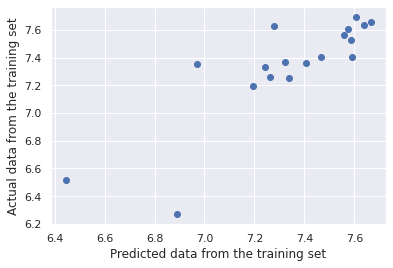

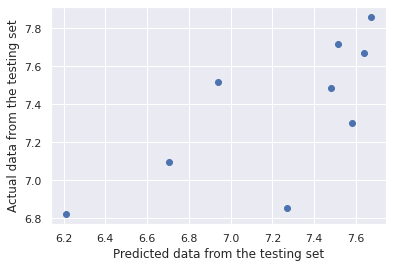

Coefficients: 
 [ 0.55232345 -0.0664217   0.63414391  0.00777329  0.00668569  0.01090525
 -0.00692648 -0.05052769  0.01183019  0.          0.01012987  0.01012987]
The test error (RMSE) is: 0.36
The training error (RMSE) is: 0.20
Coefficient of determination: -0.05


In [ ]:
#Linear model fitting

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print([round(x,2) for x in reg.coef_])

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
# plt.plot([55,80],[55,80])
plt.show()

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
# plt.plot([55,80],[55,80])
plt.show()

# The coefficients

print("Coefficients: \n", reg.coef_)

# The test error (RMSE)

RMSE_linear_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_linear_test)

# The training error (RMSE)

RMSE_linear_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_linear_train)

# The coefficient of determination: 1 is perfect prediction

coef_linear = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_linear)



In [ ]:
#print coef parameters

for param,coef in zip(X.columns,reg.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : 0.55
B : -0.07
C : 0.63
a : 0.01
b : 0.01
c : 0.01
d : -0.01
e : -0.05
f : 0.01
g : 0.0
h : 0.01
i : 0.01


##Lasso

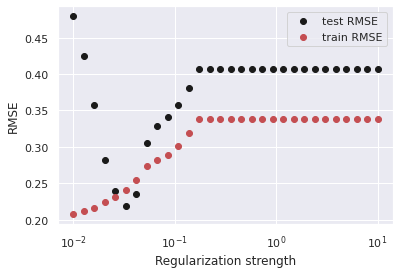

In [ ]:
# Regularization

alphas = np.logspace(-2, 1, 30)

# Training and predicting

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_n,Y_train_n)
  Y_test_pred = lasso.predict(X_test_n)
  Y_train_pred = lasso.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


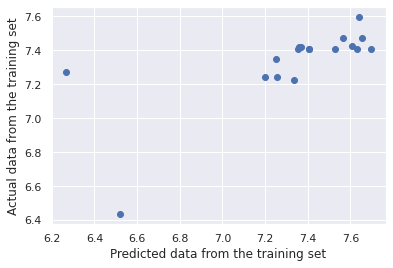

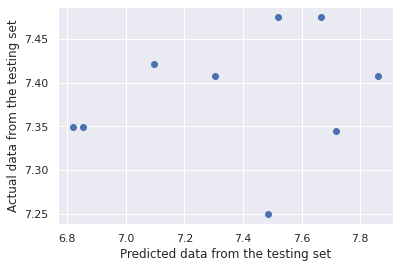

The test error (RMSE) is: 0.35
The training error (RMSE) is: 0.27
Coefficient of determination: 0.05


In [ ]:
# Training

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
#print coef parameters

for param,coef in zip(X.columns,lasso.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : 0.0
B : -0.0
C : 0.0
a : 0.0
b : 0.0
c : 0.0
d : -0.02
e : -0.0
f : 0.0
g : 0.0
h : -0.0
i : -0.0


In [ ]:
# Hyperparameter tuning

param_grid = dict(alpha=alphas)
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.3562247890262442} with a score of -1.77


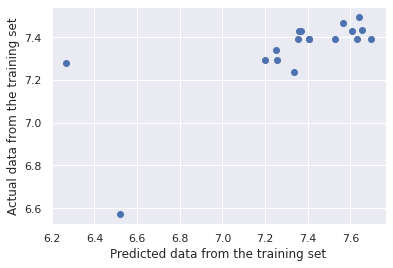

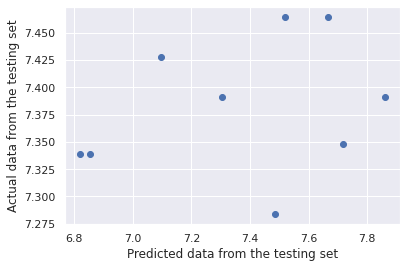

The test error (RMSE) is: 0.34
The training error (RMSE) is: 0.27
Coefficient of determination: 0.06


In [ ]:
# Training

lasso = Lasso(alpha=0.3562247890262442)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(lasso, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[0.63240414, 0.85281635, 0.64023262, 0.93492706, 0.66971035],
       [0.62814429, 0.84112267, 0.63523386, 0.93343673, 0.6638989 ],
       [0.62136661, 0.83062127, 0.62922183, 0.93103699, 0.65452818],
       [0.6122371 , 0.81867833, 0.61954052, 0.92717278, 0.63946029],
       [0.59566977, 0.81671355, 0.60668591, 0.92095041, 0.61520302],
       [0.57276148, 0.8147266 , 0.59106796, 0.91093069, 0.5761335 ],
       [0.5404172 , 0.81152641, 0.56210343, 0.90837357, 0.52040389],
       [0.49070311, 0.80637514, 0.51542333, 0.90799128, 0.46259099],
       [0.46360115, 0.79807502, 0.4660872 , 0.9073752 , 0.46232665],
       [0.46310804, 0.78470873, 0.46567402, 0.90638204, 0.46190092],
       [0.46231425, 0.76314388, 0.46500965, 0.90478372, 0.46121529],
       [0.46103597, 0.72841987, 0.46393971, 0.90221229, 0.46011064],
       [0.45897769, 0.67255376, 0.46221686, 0.89806811, 0.45833174],
       [0.45566215, 0.58259852, 0.45944283, 0.89139663, 0.45546777],
       [0.450325  , 0.43772315, 0.

In [ ]:
valid_scores

array([[-4.59618177e+00, -4.03374813e+01, -6.10878529e-01,
        -1.66726323e-01, -8.63493038e-01],
       [-4.41665600e+00, -4.10695720e+01, -5.69449840e-01,
        -1.64900357e-01, -2.46166995e-01],
       [-4.23254024e+00, -4.24084769e+01, -5.29782816e-01,
        -1.62587054e-01,  9.51535057e-02],
       [-4.10655417e+00, -4.35843625e+01, -5.21117807e-01,
        -1.59658323e-01,  3.84972824e-01],
       [-3.98934134e+00, -4.21152406e+01, -6.14196621e-01,
        -1.55952927e-01,  6.24533838e-01],
       [-4.10882178e+00, -4.02729198e+01, -7.43986178e-01,
        -1.51269020e-01,  7.27243345e-01],
       [-4.46998857e+00, -3.79930169e+01, -9.87912660e-01,
        -1.50441672e-01,  1.32297498e-01],
       [-5.16216859e+00, -3.51946560e+01, -1.51962244e+00,
        -1.50644099e-01, -8.73650211e-01],
       [-5.49621704e+00, -3.17923353e+01, -2.14004811e+00,
        -1.50909970e-01, -8.88113517e-01],
       [-5.47471124e+00, -2.77177351e+01, -2.19979849e+00,
        -1.51248703e-01

##KNN

In [ ]:
# Hyperparameter tuning

k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 6} with a score of -1.28


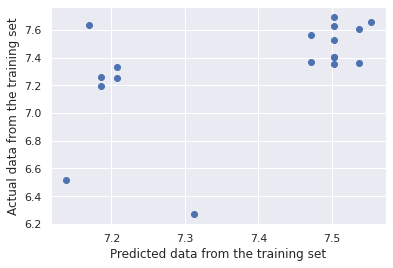

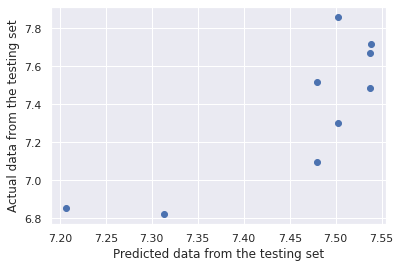

The test error (RMSE) is: 0.29
The training error (RMSE) is: 0.32
Coefficient of determination: 0.35


In [ ]:
# Model fitting

neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_train, Y_train)

# Predicting all values

Y_train_pred = neigh.predict(X_train)
Y_test_pred = neigh.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing predictions

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_knn_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_knn_test)

# The training error (RMSE)

RMSE_knn_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_knn_train)

# The coefficient of determination: 1 is perfect prediction

coef_knn = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_knn)


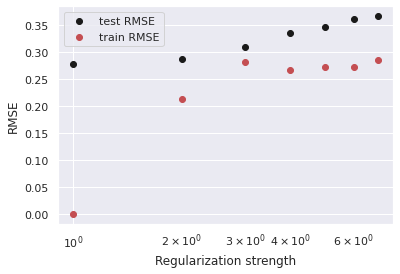

In [ ]:
# Regularization

k_range = list(range(1, 8))

# Training and predicting

for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_n,Y_train_n)
  Y_test_pred = neigh.predict(X_test_n)
  Y_train_pred = neigh.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(k,test_RMSE,c='k')
  plt.scatter(k,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(neigh, X_train, Y_train, param_name="n_neighbors", param_range=k_range,cv=5)


In [ ]:
train_scores

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.68418866,  0.60982462,  0.59513052,  0.65107105,  0.68848603],
       [ 0.35031372,  0.25786375,  0.51532827,  0.23598382,  0.23849609],
       [ 0.17189043,  0.2407856 ,  0.47939146,  0.19085256,  0.25733313],
       [ 0.07415359,  0.0769772 ,  0.36993978,  0.12485141,  0.22568041],
       [ 0.03600885,  0.05596883,  0.31420712,  0.02500121,  0.16569547],
       [-0.01521779,  0.05720659,  0.17171046, -0.04495945,  0.08193276]])

In [ ]:
valid_scores

array([[ -4.14670924,  -0.96111081,  -1.03248644,  -0.81505954,
        -14.48396401],
       [ -4.44400815,   0.41352915, -10.99896182,  -0.50788511,
         -2.13551064],
       [ -2.79462088,   0.38876728, -13.9907782 ,  -0.49545913,
          0.29550641],
       [ -0.50354289,   0.31470391,  -8.75394277,  -0.40516423,
          0.74706035],
       [ -3.63135848,  -0.07037523,  -5.67212307,  -0.47578585,
          0.83596091],
       [ -2.1717551 ,  -0.07070455,  -4.35236994,  -0.49109665,
          0.68073312],
       [-12.46673708,  -0.14804155,  -2.96753446,  -0.21460298,
         -0.17004631]])

##Random forest

In [ ]:
# Hyperparameter tuning

n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 3, 'n_estimators': 10} with a score of -0.39


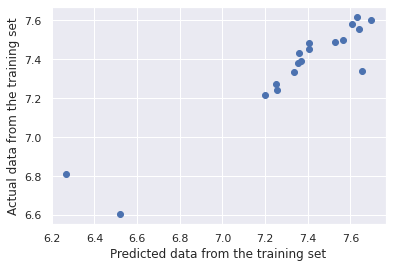

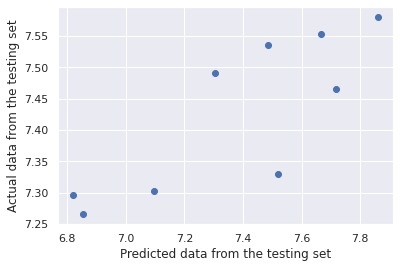

The test error (RMSE) is: 0.27
The training error (RMSE) is: 0.16
Coefficient of determination: 0.41


In [ ]:
# Model fitting

rf_reg = RandomForestRegressor(max_depth= 40, n_estimators= 10)
rf_reg.fit(X_train,Y_train)

# Predicting

Y_test_pred = rf_reg.predict(X_test)
Y_train_pred = rf_reg.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([70,100],[70,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([70,100],[70,100])
plt.show()

# The test error, mean squared error (RMSE)

RMSE_rf_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_rf_test)

# The training error (RMSE)

RMSE_rf_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_rf_train)

# The coefficient of determination: 1 is perfect prediction

coef_rf = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_rf)


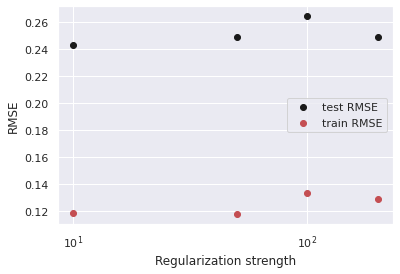

In [ ]:
# Regularization

n_estimators = [10, 50, 100, 200]

# Training and predicting

for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators= n)
  rf_reg.fit(X_train_n,Y_train_n)
  Y_test_pred = rf_reg.predict(X_test_n)
  Y_train_pred = rf_reg.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(n,test_RMSE,c='k')
  plt.scatter(n,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
#print coef parameters

for param,importance in zip(X.columns,rf_reg.feature_importances_):
  print("{} : {}".format(param,round(importance,2)))

A : 0.03
B : 0.21
C : 0.0
a : 0.0
b : 0.11
c : 0.05
d : 0.4
e : 0.0
f : 0.0
g : 0.18
h : 0.0
i : 0.0


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(rf_reg, X_train, Y_train, param_name="n_estimators", param_range=n_estimators,cv=5)


In [ ]:
train_scores

array([[0.96949282, 0.73401552, 0.86267567, 0.9122581 , 0.92122781],
       [0.86750259, 0.85695881, 0.92998445, 0.8967511 , 0.93510088],
       [0.91580998, 0.84609822, 0.89993174, 0.8558206 , 0.9199382 ],
       [0.91453627, 0.88204077, 0.89074585, 0.82880712, 0.90675495]])

In [ ]:
valid_scores

array([[-5.26920434,  0.64012785, -0.14845356, -0.3706756 ,  0.41196928],
       [-3.83356267,  0.81878003, -0.33355406, -0.34268048,  0.38484779],
       [-4.29420532,  0.80624689, -0.29917452, -0.27850897,  0.20851306],
       [-3.94289949,  0.85706345, -0.64334596, -0.28338605,  0.08647249]])

##Support vector machine

In [ ]:
# Hyperparameter tuning

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVR(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100000.0, 'gamma': 1e-08} with a score of -0.50


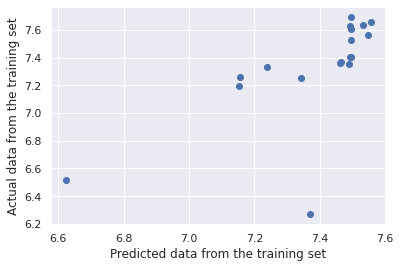

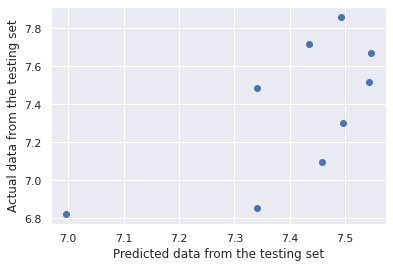

The test error (RMSE) is: 0.28
The training error (RMSE) is: 0.28
Coefficient of determination: 0.39


In [ ]:
# Model fitting

regr = svm.SVR(C = 100000.0, gamma= 1e-08)
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

# Visualization of training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualization of testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_svm_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_svm_test)

# The training error (RMSE)

RMSE_svm_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_svm_train)

# The coefficient of determination: 1 is perfect prediction

coef_svm = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_svm)


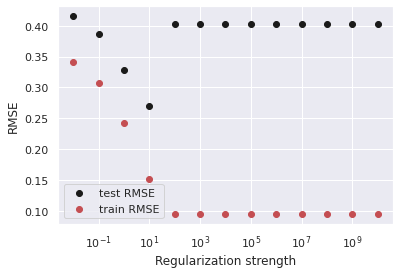

In [ ]:
# Training and predicting

for C in C_range:
  regr = svm.SVR(C=C)
  regr.fit(X_train_n, Y_train_n)

  Y_test_pred = regr.predict(X_test_n)
  Y_train_pred = regr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(C,test_RMSE,c='k')
  plt.scatter(C,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Model fitting

regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

#print coef parameters

for param,coef in zip(X.columns,regr.coef_[0]):
  print("{} : {}".format(param,np.round(coef,2)))

A : 0.06
B : -0.25
C : 0.19
a : 0.0
b : 0.0
c : 0.01
d : -0.02
e : -0.01
f : 0.01
g : 0.0
h : 0.01
i : 0.01


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(svm.SVR(), X_train, Y_train, param_name="C", param_range=C_range,cv=5)


In [ ]:
train_scores

array([[-4.10416340e-02, -3.57924217e-02, -6.55082725e-02,
        -2.32715162e-02, -8.59957181e-02],
       [-3.56546134e-02, -2.19853144e-02,  3.80137582e-02,
         1.48767712e-01, -4.75123615e-03],
       [ 2.91476095e-01,  7.26034595e-02,  3.61136789e-01,
         7.42049263e-01,  3.66843104e-01],
       [ 4.33250594e-01,  2.55487740e-01,  4.81281219e-01,
         8.96674656e-01,  4.80993563e-01],
       [ 9.22298041e-01,  9.19914620e-01,  9.31246168e-01,
         8.97520501e-01,  9.30920842e-01],
       [ 9.29762695e-01,  9.29552471e-01,  9.35284017e-01,
         9.02678696e-01,  9.38221080e-01],
       [ 9.40633971e-01,  9.34829419e-01,  9.41656978e-01,
         9.02678696e-01,  9.41917332e-01],
       [ 9.38944057e-01,  9.34829419e-01,  9.41468732e-01,
         9.02678696e-01,  9.38633965e-01],
       [ 9.40663918e-01,  9.34829419e-01,  9.38617406e-01,
         9.02678696e-01,  9.37253045e-01],
       [ 8.74186997e-01,  9.34829419e-01,  8.22949113e-01,
         9.02678696e-01

In [ ]:
valid_scores

array([[-4.27351947e+00, -3.39485419e-01, -5.50541121e-02,
        -3.46883648e-01, -1.38495073e-01],
       [-2.62921508e+00, -4.53735655e-01, -6.08891204e-01,
        -4.19673211e-01,  2.21005294e-02],
       [-4.84764952e+00, -4.08726655e-01, -3.15592471e+00,
        -3.11613183e-01,  1.14116372e-01],
       [-3.85693641e-01,  5.81390402e-01, -2.71653169e+00,
        -2.47141223e-01,  6.72957049e-01],
       [-1.25551913e+01, -1.45401241e+01, -5.82462807e+00,
        -2.92145466e-01, -1.11619588e+01],
       [-1.61581959e+01, -1.30204633e+01, -6.07213543e+00,
        -3.82804006e-01, -1.08033345e+01],
       [-7.71975440e+00, -1.00867883e+01, -9.42308045e+00,
        -3.82804006e-01, -9.54769895e+00],
       [-1.05181202e+01, -1.00867883e+01, -5.12642939e+01,
        -3.82804006e-01, -8.22969117e+01],
       [-7.40063581e+01, -1.00867883e+01, -1.23786861e+03,
        -3.82804006e-01, -3.03484434e+03],
       [-3.24993707e+03, -1.00867883e+01, -8.18761753e+04,
        -3.82804006e-01

##Gaussian process

In [ ]:
# Hyperparameter tuning

alphas = np.logspace(-4, -0.5, 4)

param_grid = dict(alpha=alphas)
grid = GridSearchCV(GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.31622776601683794} with a score of -243.12


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: Converge

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


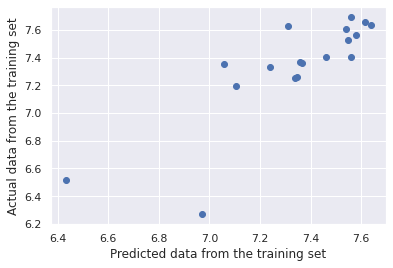

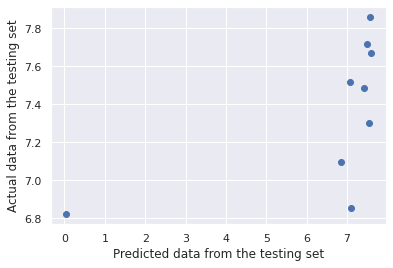

The test error (RMSE) is: 2.27
The training error (RMSE) is: 0.21
Coefficient of determination: -39.97


In [ ]:
# Model fitting
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha = 0.31622776601683794).fit(X_train, Y_train)
gpr.score(X_train, Y_train)

# Training and testing

Y_train_pred = gpr.predict(X_train)
Y_test_pred = gpr.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_gp_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_gp_test)

# The training error (RMSE)

RMSE_gp_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_gp_train)

# The coefficient of determination: 1 is perfect prediction

coef_gp = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_gp)


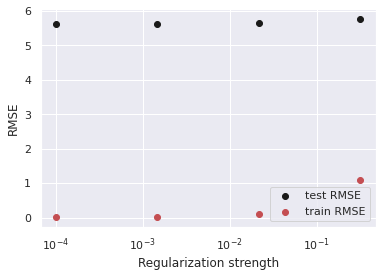

In [ ]:
# Regularization

alphas = np.logspace(-4, -0.5, 4)

# Training and predicting

for alpha in alphas:
  gpr = GaussianProcessRegressor(alpha = alpha)
  gpr.fit(X_train_n,Y_train_n)
  Y_test_pred = gpr.predict(X_test_n)
  Y_train_pred = gpr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(gpr, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[  0.99999711,   0.9999897 ,   0.99976238,   0.99983404,
          0.99975951],
       [  0.9993868 ,   0.99800457,   0.99320279,   0.98679771,
          0.99306286],
       [  0.88855673,   0.80237784,   0.88619148,   0.67996919,
          0.8711745 ],
       [-11.17557688, -16.20513236,  -8.9444763 , -26.09549086,
        -10.83624129]])

In [ ]:
valid_scores

array([[-5216.10282011,  -136.69937825, -3611.6364536 ,   -35.25421628,
        -1325.06885889],
       [-5216.23640489,  -136.60758994, -3611.63687632,   -35.07850725,
        -1325.06885889],
       [-5217.88219439,  -136.52710907, -3611.6429507 ,   -38.61479288,
        -1325.06885889],
       [-5245.19534928,  -137.27482953, -3611.71078984,   -44.21513653,
        -1325.06885889]])

##Comparaison

In [ ]:
# The comparaison of test errors (RMSE) 

txt = "The test error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_test, RMSE_linear_test, RMSE_lasso_test, RMSE_knn_test, RMSE_rf_test, RMSE_svm_test, RMSE_gp_test]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The test error (RMSE) of Baseline is: 0.36
The test error (RMSE) of Linear regression is: 0.36
The test error (RMSE) of Lasso is: 0.34
The test error (RMSE) of KNN is: 0.29
The test error (RMSE) of Random forest is: 0.27
The test error (RMSE) of Support vector machine is: 0.28
The test error (RMSE) of Gaussian process is: 2.27


In [ ]:
# The comparaison of training errors (RMSE)

txt = "The training error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_train, RMSE_linear_train, RMSE_lasso_train, RMSE_knn_train, RMSE_rf_train, RMSE_svm_train, RMSE_gp_train]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The training error (RMSE) of Baseline is: 0.37
The training error (RMSE) of Linear regression is: 0.20
The training error (RMSE) of Lasso is: 0.27
The training error (RMSE) of KNN is: 0.32
The training error (RMSE) of Random forest is: 0.16
The training error (RMSE) of Support vector machine is: 0.28
The training error (RMSE) of Gaussian process is: 0.21


In [ ]:
# The comparaison of coefficient of determination: 1 is perfect prediction 

txt = "The coefficient of determination of {algo} is: {val:.2f}"

val = [coef_baseline, coef_linear, coef_lasso, coef_knn, coef_rf, coef_svm, coef_gp]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The coefficient of determination of Baseline is: -0.01
The coefficient of determination of Linear regression is: -0.05
The coefficient of determination of Lasso is: 0.06
The coefficient of determination of KNN is: 0.35
The coefficient of determination of Random forest is: 0.41
The coefficient of determination of Support vector machine is: 0.39
The coefficient of determination of Gaussian process is: -39.97


#Identifying future experiments

In [ ]:
# data prep for modelling

X = df.loc[:,'A':'f']
X = X.drop(columns=['a'])
Y = df.loc[:,'R_50']

#drop rows missing target

X = X.loc[Y.notnull()]
Y = Y.loc[Y.notnull()]

#test train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X_norm = (X-X.mean())/X.std()
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_norm, Y, test_size=0.33)


In [ ]:
X.loc[:,['b','f','c','d','e']] = X[['b','f','c','d','e']]/100 #convert from % to fraction

In [ ]:
#Discretize the parameter space
#salts
A_ops = [0, 0.1, 1]
B_ops = [0, 0.1, 1]
C_ops = [0, 0.1, 1]

#solvents
b_ops = [0, 1, 2]
f_ops = [0, 1]
c_ops = [0, 1, 2]
d_ops = [0, 0.05, 0.1]
e_ops = [0, 0.05, 0.1]

In [ ]:
#produce dataframe with all combinations of different parameters
df_op = pd.DataFrame(list(product(A_ops, B_ops, C_ops, b_ops, c_ops, d_ops, e_ops, f_ops)), columns=['A', 'B','C','b','c','d','e','f'])

In [ ]:
#Drop rows with paramater combinations that don't fit the electrolyte development criteria
df_op = df_op[(df_op.loc[:,['b','f']]!=0).any(axis=1).values] #drop rows that dont have b or f (main solvents)
df_op = df_op[(df_op.loc[:,['b','f']]==0).any(axis=1).values] #drop rows that use b and f (needs to come after previous line)
df_op = df_op[~(df_op.loc[:,'c']!=0) | ~(df_op.loc[:,'f']!=0)] #drop rows that use c with f
df_op = df_op[(df_op.loc[:,['A','B','C']]!=0).any(axis=1).values] #drop rows with no salt
df_op = df_op[(df_op.loc[:,['A','B','C']]==0).any(axis=1).values] #drop rows with three salts (needs to come after previous line

In [ ]:
#convert solvent composition from parts to volume fractions (CHECK THIS, NOT SURE IF THIS SHOULD BE HERE)
temp_df = df_op.loc[:,['b','f','c','d','e']]
df_op[['b','f','c','d','e']] = temp_df.div(temp_df.sum(axis=1), axis=0)*100 #normalize and multiply by 100 to turn to %

In [ ]:
df_op

,A,B,C,b,c,d,e,f
163,0.0,0.0,0.1,0.000000,0.000000,0.000000,0.000000,100.000000
165,0.0,0.0,0.1,0.000000,0.000000,0.000000,4.761905,95.238095
167,0.0,0.0,0.1,0.000000,0.000000,0.000000,9.090909,90.909091
169,0.0,0.0,0.1,0.000000,0.000000,4.761905,0.000000,95.238095
171,0.0,0.0,0.1,0.000000,0.000000,4.545455,4.545455,90.909091
...,...,...,...,...,...,...,...,...
4040,1.0,1.0,0.0,48.780488,48.780488,1.219512,1.219512,0.000000
4042,1.0,1.0,0.0,48.192771,48.192771,1.204819,2.409639,0.000000
4044,1.0,1.0,0.0,48.780488,48.780488,2.439024,0.000000,0.000000
4046,1.0,1.0,0.0,48.192771,48.192771,2.409639,1.204819,0.000000


##Constant estimate baseline

In [ ]:
#Always predict mean of training set target

Y_train_pred = Y_train.mean()*np.ones(Y_train.size)
Y_test_pred = Y_train.mean()*np.ones(Y_test.size)

# The test error, mean squared error (RMSE)

RMSE_baseline_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_baseline_test)

# The training error (RMSE)

RMSE_baseline_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_baseline_train)

# The coefficient of determination: 1 is perfect prediction

coef_baseline = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_baseline)


The test error (RMSE) is: 8.75
The training error (RMSE) is: 10.46
Coefficient of determination: -0.01


##Linear regression

[-20.49, 0.82, -13.28, 0.12, -0.02, 0.09, 3.77, 0.05]


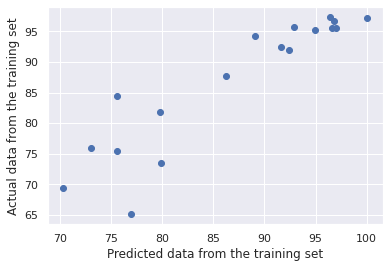

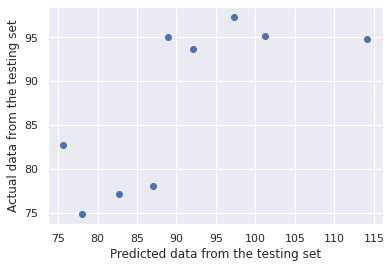

Coefficients: 
 [-2.04885385e+01  8.18978088e-01 -1.32814859e+01  1.16922367e-01
 -2.01965323e-02  8.74632262e-02  3.76617695e+00  4.58832195e-02]
The test error (RMSE) is: 8.33
The training error (RMSE) is: 4.25
Coefficient of determination: 0.09


In [ ]:
#Linear model fitting

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print([round(x,2) for x in reg.coef_])

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
# plt.plot([55,80],[55,80])
plt.show()

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
# plt.plot([55,80],[55,80])
plt.show()

# The coefficients

print("Coefficients: \n", reg.coef_)

# The test error (RMSE)

RMSE_linear_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_linear_test)

# The training error (RMSE)

RMSE_linear_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_linear_train)

# The coefficient of determination: 1 is perfect prediction

coef_linear = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_linear)



In [ ]:
#print coef parameters

for param,coef in zip(X.columns,reg.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -20.49
B : 0.82
C : -13.28
b : 0.12
c : -0.02
d : 0.09
e : 3.77
f : 0.05


##Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.802e+01, tolerance: 1.989e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.022e+01, tolerance: 1.989e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

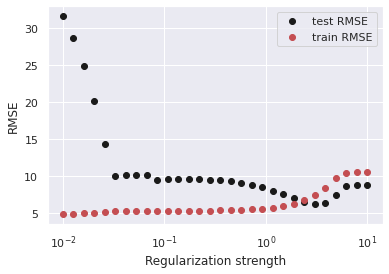

In [ ]:
# Regularization

alphas = np.logspace(-2, 1, 30)

# Training and predicting

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_n,Y_train_n)
  Y_test_pred = lasso.predict(X_test_n)
  Y_train_pred = lasso.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


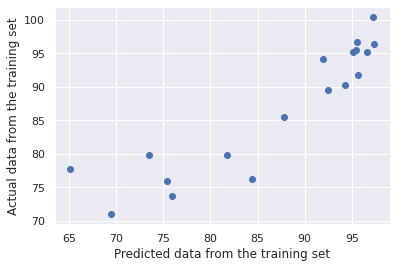

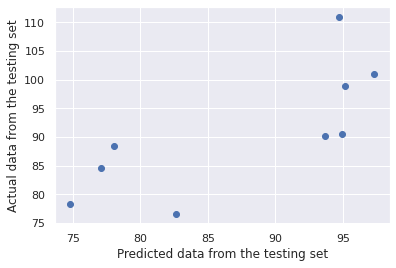

The test error (RMSE) is: 7.72
The training error (RMSE) is: 4.37
Coefficient of determination: 0.22


In [ ]:
# Training

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
#print coef parameters

for param,coef in zip(X.columns,lasso.coef_):
  print("{} : {}".format(param,round(coef,2)))

A : -14.5
B : 4.61
C : -5.88
b : 0.11
c : -0.02
d : 0.13
e : 3.49
f : 0.06


In [ ]:
# Hyperparameter tuning

param_grid = dict(alpha=alphas)
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.2807216203941177} with a score of 0.28


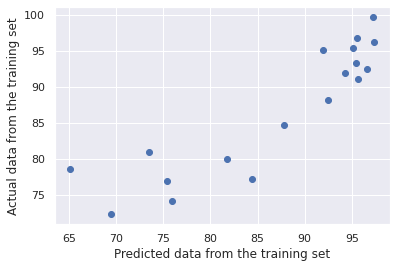

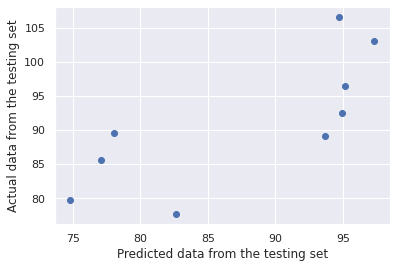

The test error (RMSE) is: 7.11
The training error (RMSE) is: 4.74
Coefficient of determination: 0.34


In [ ]:
# Training

lasso = Lasso(alpha=0.3562247890262442)
lasso.fit(X_train,Y_train)

#Predicting

Y_test_pred = lasso.predict(X_test)
Y_train_pred = lasso.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([50,100],[50,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([50,100],[50,100])
plt.show()

# The test error (RMSE)

RMSE_lasso_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_lasso_test)

# The training error (RMSE)

RMSE_lasso_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_lasso_train)

# The coefficient of determination: 1 is perfect prediction

coef_lasso = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_lasso)


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(lasso, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[0.95317968, 0.8062824 , 0.79683432, 0.8854322 , 0.83660969],
       [0.95309685, 0.80623734, 0.79677879, 0.88529303, 0.83659151],
       [0.9529635 , 0.80616476, 0.79668935, 0.88506911, 0.83656222],
       [0.95274876, 0.80604794, 0.7965453 , 0.88470869, 0.83651507],
       [0.95240297, 0.80585986, 0.79631321, 0.88412839, 0.83643915],
       [0.95184619, 0.80555708, 0.79593944, 0.88319414, 0.83332954],
       [0.95094964, 0.80506944, 0.79533764, 0.88168971, 0.83325215],
       [0.94950599, 0.80428412, 0.79436827, 0.87926794, 0.83312755],
       [0.94718132, 0.80299574, 0.79280719, 0.87538239, 0.83292691],
       [0.94343809, 0.80098261, 0.79029363, 0.86936069, 0.83260387],
       [0.93790061, 0.79771317, 0.7895777 , 0.85996593, 0.83208368],
       [0.9284937 , 0.79243864, 0.78880823, 0.85803672, 0.83124606],
       [0.91343185, 0.78394511, 0.787569  , 0.85493038, 0.82989732],
       [0.89052656, 0.77445796, 0.78557345, 0.84992825, 0.82772553],
       [0.85223247, 0.77147059, 0.

In [ ]:
valid_scores

array([[-4.17539315,  0.96927635,  0.24087588,  0.6535784 , -2.60327387],
       [-4.07807839,  0.96987778,  0.23818593,  0.65631233, -2.58863218],
       [-3.95614775,  0.97026608,  0.23474975,  0.65951088, -2.57011266],
       [-3.8039025 ,  0.97015364,  0.23035262,  0.6631367 , -2.54666886],
       [-3.61472039,  0.96904036,  0.22471508,  0.66704203, -2.51712186],
       [-3.38111328,  0.9660675 ,  0.21746535,  0.67087676, -0.94394202],
       [-3.09507235,  0.95977604,  0.20810944,  0.67393865, -0.891733  ],
       [-2.7488377 ,  0.94773474,  0.19599048,  0.67491718, -0.82678297],
       [-2.33642001,  0.92479689,  0.18021121,  0.67149428, -0.74645749],
       [-1.85648587,  0.88809552,  0.15954023,  0.65995264, -0.64793362],
       [-1.36908804,  0.82310638,  0.16372503,  0.63518377, -0.52829191],
       [-0.79770451,  0.71333286,  0.1719521 ,  0.62565266, -0.38519952],
       [-0.25138945,  0.5302781 ,  0.18203517,  0.61131575, -0.21765122],
       [ 0.1510832 ,  0.30084758,  0.1

##KNN

In [ ]:
# Hyperparameter tuning

k_range = list(range(1, 8))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 4} with a score of 0.10


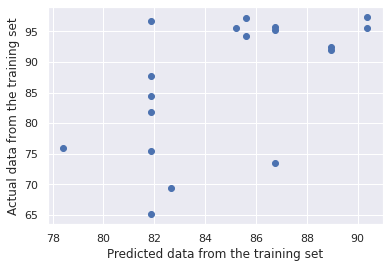

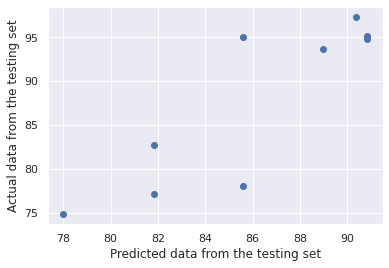

The test error (RMSE) is: 5.61
The training error (RMSE) is: 9.16
Coefficient of determination: 0.59


In [ ]:
# Model fitting

neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_train, Y_train)

# Predicting all values

Y_train_pred = neigh.predict(X_train)
Y_test_pred = neigh.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing predictions

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_knn_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_knn_test)

# The training error (RMSE)

RMSE_knn_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_knn_train)

# The coefficient of determination: 1 is perfect prediction

coef_knn = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_knn)


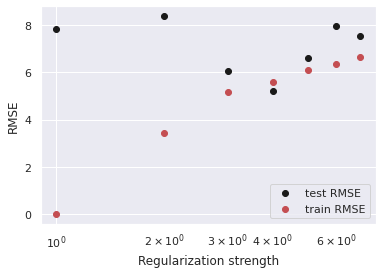

In [ ]:
# Regularization

k_range = list(range(1, 8))

# Training and predicting

for k in k_range:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_n,Y_train_n)
  Y_test_pred = neigh.predict(X_test_n)
  Y_train_pred = neigh.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(k,test_RMSE,c='k')
  plt.scatter(k,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(neigh, X_train, Y_train, param_name="n_neighbors", param_range=k_range,cv=5)


In [ ]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.77266658, 0.82621516, 0.70271288, 0.72966107, 0.68781065],
       [0.35393732, 0.40760326, 0.51146987, 0.42324206, 0.40879177],
       [0.21188397, 0.23852353, 0.41004113, 0.36470482, 0.31490402],
       [0.15736185, 0.15286669, 0.35391215, 0.27393149, 0.21034427],
       [0.24573645, 0.15839813, 0.28294044, 0.23241384, 0.16655564],
       [0.18228485, 0.11193656, 0.18364116, 0.06040867, 0.11382804]])

In [ ]:
valid_scores

array([[-1.80897309e+00, -1.66522471e+00,  8.94731982e-01,
         6.18247973e-01, -4.91285079e+00],
       [-2.90186425e+00, -1.65815038e+00, -7.57177432e-02,
         3.16500145e-01, -1.74845859e-01],
       [-9.20563300e-01, -2.08394357e-01, -8.19774488e-01,
         2.19989733e-01,  5.91987112e-01],
       [ 2.31300228e-01, -6.44045864e-05, -3.78403739e-01,
        -5.36409559e-02,  7.25117293e-01],
       [-7.26818922e-03, -1.22248221e-04, -3.44224686e-01,
        -1.01755590e-01,  5.42138189e-01],
       [-5.15920017e-02, -1.60269866e-01, -5.27997256e-01,
        -2.04441131e-01, -2.26622476e-01],
       [-1.69279995e-01, -1.56421406e-01, -1.79270507e-01,
        -2.57946963e-01, -3.26186808e-01]])

##Random forest

In [ ]:
# Hyperparameter tuning

n_estimators = [5, 10, 50, 100, 200]
max_depth = [3, 10, 20, 40]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 40, 'n_estimators': 10} with a score of 0.46


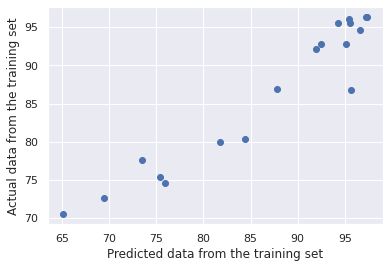

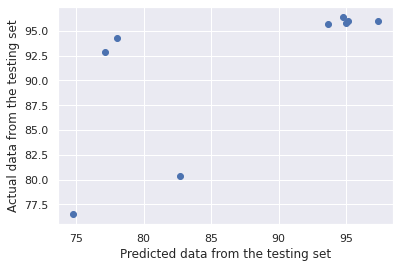

The test error (RMSE) is: 7.65
The training error (RMSE) is: 3.10
Coefficient of determination: 0.23


In [ ]:
# Model fitting

rf_reg = RandomForestRegressor(max_depth= 40, n_estimators= 10)
rf_reg.fit(X_train,Y_train)

# Predicting

Y_test_pred = rf_reg.predict(X_test)
Y_train_pred = rf_reg.predict(X_train)

# The mean squared error

test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
#plt.plot([70,100],[70,100])
plt.show()

plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
#plt.plot([70,100],[70,100])
plt.show()

# The test error, mean squared error (RMSE)

RMSE_rf_test = test_RMSE
print("The test error (RMSE) is: %.2f" % RMSE_rf_test)

# The training error (RMSE)

RMSE_rf_train = train_RMSE
print("The training error (RMSE) is: %.2f" % RMSE_rf_train)

# The coefficient of determination: 1 is perfect prediction

coef_rf = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_rf)


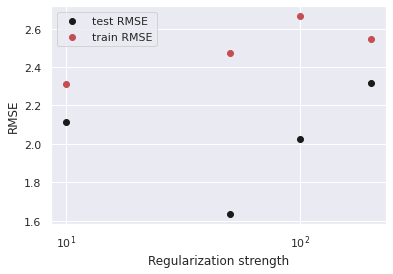

In [ ]:
# Regularization

n_estimators = [10, 50, 100, 200]

# Training and predicting

for n in n_estimators:
  rf_reg = RandomForestRegressor(n_estimators= n)
  rf_reg.fit(X_train_n,Y_train_n)
  Y_test_pred = rf_reg.predict(X_test_n)
  Y_train_pred = rf_reg.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(n,test_RMSE,c='k')
  plt.scatter(n,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
#print coef parameters

for param,importance in zip(X.columns,rf_reg.feature_importances_):
  print("{} : {}".format(param,round(importance,2)))

A : 0.18
B : 0.42
C : 0.05
b : 0.05
c : 0.24
d : 0.02
e : 0.04
f : 0.0


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(rf_reg, X_train, Y_train, param_name="n_estimators", param_range=n_estimators,cv=5)


In [ ]:
train_scores

array([[0.91904193, 0.84083564, 0.82664404, 0.82209509, 0.95365268],
       [0.95060618, 0.91775522, 0.92853614, 0.86378886, 0.91128585],
       [0.9187847 , 0.91633364, 0.92216863, 0.90972183, 0.90794689],
       [0.91849514, 0.91877147, 0.93178459, 0.90117085, 0.93020725]])

In [ ]:
valid_scores

array([[-0.36091493,  0.56567838, -0.33847754,  0.73650349,  0.76672166],
       [-0.67927786,  0.8636075 , -0.05613908,  0.71613894,  0.83678573],
       [-0.43582533,  0.86050764, -0.0808677 ,  0.68205556,  0.81121069],
       [-0.48975991,  0.81861898, -0.0628379 ,  0.70336309,  0.82216477]])

##Support vector machine

In [ ]:
# Hyperparameter tuning

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVR(), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10000.0, 'gamma': 0.1} with a score of 0.23


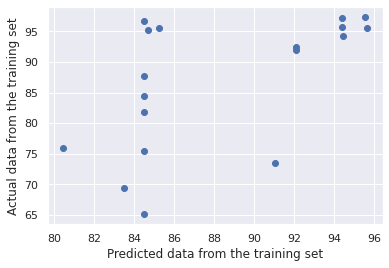

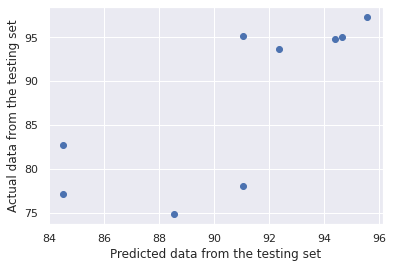

The test error (RMSE) is: 6.98
The training error (RMSE) is: 8.77
Coefficient of determination: 0.36


In [ ]:
# Model fitting

regr = svm.SVR(C = 100000.0, gamma= 1e-08)
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

# Visualization of training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualization of testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_svm_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_svm_test)

# The training error (RMSE)

RMSE_svm_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_svm_train)

# The coefficient of determination: 1 is perfect prediction

coef_svm = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_svm)


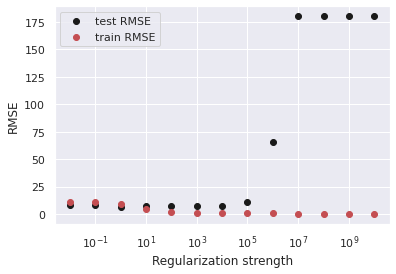

In [ ]:
# Training and predicting

for C in C_range:
  regr = svm.SVR(C=C)
  regr.fit(X_train_n, Y_train_n)

  Y_test_pred = regr.predict(X_test_n)
  Y_train_pred = regr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(C,test_RMSE,c='k')
  plt.scatter(C,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Model fitting

regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)

# Prediction of all values

Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

#print coef parameters

for param,coef in zip(X.columns,regr.coef_[0]):
  print("{} : {}".format(param,np.round(coef,2)))

A : -2.21
B : 2.17
C : -0.47
b : 0.06
c : -0.24
d : 0.34
e : 1.03
f : 0.06


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(svm.SVR(), X_train, Y_train, param_name="C", param_range=C_range,cv=5)


In [ ]:
train_scores

array([[-2.85258988e-01, -2.87066779e-01, -1.31596711e-01,
        -2.56415280e-01, -4.48188448e-01],
       [-2.76267265e-01, -2.76957054e-01, -1.12129496e-01,
        -2.20905577e-01, -4.19005167e-01],
       [-1.17916833e-01, -1.61674238e-01,  4.80317473e-02,
         8.03150574e-02, -1.37054659e-01],
       [ 3.06879028e-01,  2.80823984e-01,  2.21044041e-01,
         4.72499264e-01,  2.54499772e-01],
       [ 5.43764504e-01,  4.87316072e-01,  4.29639632e-01,
         7.63208224e-01,  4.87155013e-01],
       [ 5.95709486e-01,  6.92765165e-01,  5.82809694e-01,
         9.37868587e-01,  6.74950477e-01],
       [ 8.03723531e-01,  7.53459260e-01,  7.88140570e-01,
         9.47240298e-01,  7.94375056e-01],
       [ 9.42468931e-01,  8.91628642e-01,  8.79960561e-01,
         9.68572112e-01,  8.96200406e-01],
       [ 9.98370469e-01,  9.89635195e-01,  9.81994708e-01,
         9.72454833e-01,  9.85435832e-01],
       [ 9.98800120e-01,  9.99161439e-01,  9.95569031e-01,
         9.94436446e-01

In [ ]:
valid_scores

array([[-1.92140236e+00, -1.43349687e-01, -9.28356366e-04,
        -1.81202808e-01, -9.58290238e-01],
       [-1.95362739e+00, -1.25105021e-01,  2.41307976e-03,
        -1.63971397e-01, -9.02937616e-01],
       [-1.89641379e+00,  6.74721016e-02,  2.88734320e-02,
        -3.74057276e-02, -3.35249815e-01],
       [-1.21866804e+00,  2.68502514e-01,  2.00890329e-01,
        -6.99954062e-03,  3.59010615e-01],
       [-1.80248426e+00, -2.33890432e-01,  5.82967778e-01,
        -2.64746938e-03, -2.96603684e+00],
       [-8.75286599e-01,  6.49680960e-01,  4.28248258e-01,
         9.35983504e-02, -1.03635531e+00],
       [-7.47541902e-01,  5.07285825e-01,  5.90715927e-01,
         2.38428585e-01, -1.91978412e+00],
       [-6.76777266e-01, -4.10609073e-01,  7.04176162e-01,
         6.26928877e-01, -2.10154104e+00],
       [-7.06394055e-01,  6.26210467e-02,  1.37600215e-01,
         7.00221326e-01, -4.30838843e+00],
       [-1.97111544e+00, -1.13838266e+01, -4.54878115e+00,
         9.27725595e-01

##Gaussian process

In [ ]:
# Hyperparameter tuning

alphas = np.logspace(-4, -0.5, 4)

param_grid = dict(alpha=alphas)
grid = GridSearchCV(GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel()), param_grid=param_grid)
grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


The best parameters are {'alpha': 0.31622776601683794} with a score of -1.68


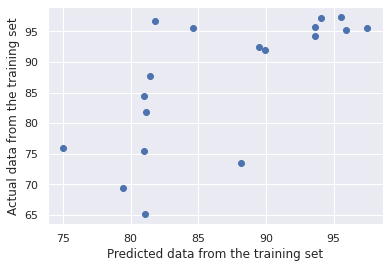

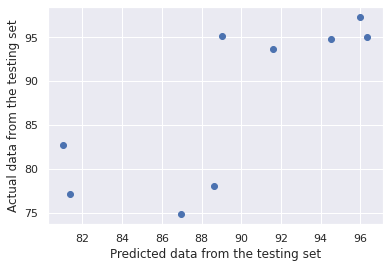

The test error (RMSE) is: 6.02
The training error (RMSE) is: 7.57
Coefficient of determination: 0.52


In [ ]:
# Model fitting
kernel = DotProduct() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha = 0.31622776601683794).fit(X_train, Y_train)
gp.score(X_train, Y_train)

# Training and testing

Y_train_pred = gp.predict(X_train)
Y_test_pred = gp.predict(X_test)

# Visualizing training

plt.scatter(Y_train_pred,Y_train)
plt.xlabel("Predicted data from the training set")
plt.ylabel("Actual data from the training set")
plt.show()

# Visualizing testing

plt.scatter(Y_test_pred,Y_test)
plt.xlabel("Predicted data from the testing set")
plt.ylabel("Actual data from the testing set")
plt.show()

# The test error, mean squared error (RMSE)

RMSE_gp_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("The test error (RMSE) is: %.2f" % RMSE_gp_test)

# The training error (RMSE)

RMSE_gp_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
print("The training error (RMSE) is: %.2f" % RMSE_gp_train)

# The coefficient of determination: 1 is perfect prediction

coef_gp = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: %.2f" % coef_gp)


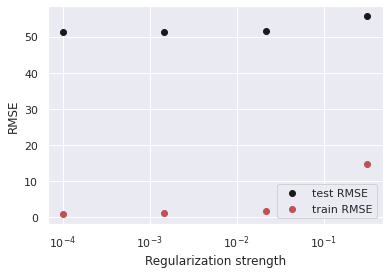

In [ ]:
# Regularization

alphas = np.logspace(-4, -0.5, 4)

# Training and predicting

for alpha in alphas:
  gpr = GaussianProcessRegressor(alpha = alpha)
  gpr.fit(X_train_n,Y_train_n)
  Y_test_pred = gpr.predict(X_test_n)
  Y_train_pred = gpr.predict(X_train_n)
  test_RMSE = np.sqrt(mean_squared_error(Y_test_n, Y_test_pred))
  train_RMSE = np.sqrt(mean_squared_error(Y_train_n, Y_train_pred))
  plt.scatter(alpha,test_RMSE,c='k')
  plt.scatter(alpha,train_RMSE,c='r')

#Visualization

plt.legend(['test RMSE', 'train RMSE'])
plt.xlabel("Regularization strength")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()


In [ ]:
# Generalization error

train_scores, valid_scores = validation_curve(gpr, X_train, Y_train, param_name="alpha", param_range=alphas,cv=5)


In [ ]:
train_scores

array([[ 0.99999903,  0.99999773,  0.99939394,  0.99957736,  0.99952763],
       [ 0.99979901,  0.9995561 ,  0.98851301,  0.98669462,  0.9910342 ],
       [ 0.9704552 ,  0.95714812,  0.94468315,  0.94144566,  0.95402589],
       [-1.56668319, -1.54637823, -1.70217133, -2.33326626, -1.47871578]])

In [ ]:
valid_scores

array([[ -63.43685441,  -62.18080958,  -59.36419608,  -13.98786381,
        -128.159343  ],
       [ -63.46046524,  -62.13070445,  -59.36420389,  -13.8185538 ,
        -128.159343  ],
       [ -63.73836006,  -61.99228541,  -59.36431607,  -15.28017215,
        -128.159343  ],
       [ -65.121188  ,  -62.15497599,  -59.36556894,  -16.92454516,
        -128.159343  ]])

##Comparaison

In [ ]:
# The comparaison of test errors (RMSE) 

txt = "The test error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_test, RMSE_linear_test, RMSE_lasso_test, RMSE_knn_test, RMSE_rf_test, RMSE_svm_test, RMSE_gp_test]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The test error (RMSE) of Baseline is: 8.75
The test error (RMSE) of Linear regression is: 8.33
The test error (RMSE) of Lasso is: 7.11
The test error (RMSE) of KNN is: 5.61
The test error (RMSE) of Random forest is: 7.65
The test error (RMSE) of Support vector machine is: 6.98
The test error (RMSE) of Gaussian process is: 6.02


In [ ]:
# The comparaison of training errors (RMSE)

txt = "The training error (RMSE) of {algo} is: {val:.2f}"

algos = ["Baseline", "Linear regression", "Lasso", "KNN", "Random forest", "Support vector machine", "Gaussian process"]
val = [RMSE_baseline_train, RMSE_linear_train, RMSE_lasso_train, RMSE_knn_train, RMSE_rf_train, RMSE_svm_train, RMSE_gp_train]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The training error (RMSE) of Baseline is: 10.46
The training error (RMSE) of Linear regression is: 4.25
The training error (RMSE) of Lasso is: 4.74
The training error (RMSE) of KNN is: 9.16
The training error (RMSE) of Random forest is: 3.10
The training error (RMSE) of Support vector machine is: 8.77
The training error (RMSE) of Gaussian process is: 7.57


In [ ]:
# The comparaison of coefficient of determination: 1 is perfect prediction 

txt = "The coefficient of determination of {algo} is: {val:.2f}"

val = [coef_baseline, coef_linear, coef_lasso, coef_knn, coef_rf, coef_svm, coef_gp]

for x, y in zip(algos, val):
  print(txt.format(algo = x, val = y))


The coefficient of determination of Baseline is: -0.01
The coefficient of determination of Linear regression is: 0.09
The coefficient of determination of Lasso is: 0.34
The coefficient of determination of KNN is: 0.59
The coefficient of determination of Random forest is: 0.23
The coefficient of determination of Support vector machine is: 0.36
The coefficient of determination of Gaussian process is: 0.52


##Predictions

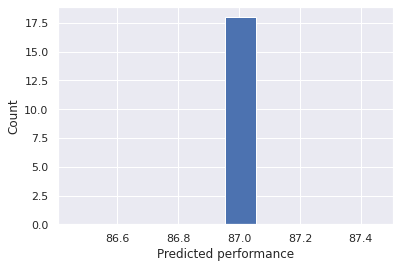

In [ ]:
#predict R_50 of each composition with baseline model
op_pred_b = Y_train.mean()*np.ones(Y_train.size)

#display histogram of predicted performance
plt.hist(op_pred_b)
plt.xlabel("Predicted performance")
plt.ylabel("Count")
plt.show()


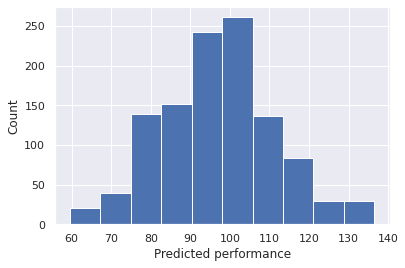

In [ ]:
#predict R_50 of each composition with linear model
op_pred_ln = reg.predict(df_op)

#display histogram of predicted performance
plt.hist(op_pred_ln)
plt.xlabel("Predicted performance")
plt.ylabel("Count")
plt.show()


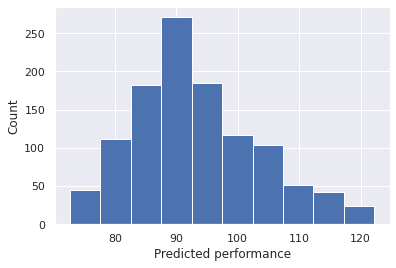

In [ ]:
#predict R_50 of each composition with lasso model
op_pred_ls = lasso.predict(df_op)

#display histogram of predicted performance
plt.hist(op_pred_ls)
plt.xlabel("Predicted performance")
plt.ylabel("Count")
plt.show()


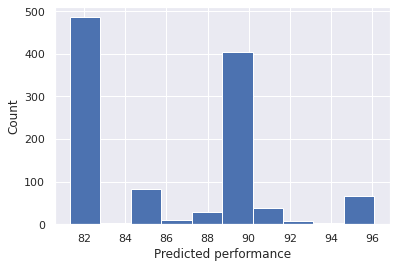

In [ ]:
#predict R_50 of each composition with KNN model
op_pred_knn = neigh.predict(df_op)

#display histogram of predicted performance
plt.hist(op_pred_knn)
plt.xlabel("Predicted performance")
plt.ylabel("Count")
plt.show()


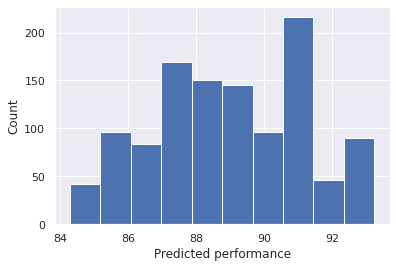

In [ ]:
#predict R_50 of each composition with RF model
op_pred_rf = rf_reg.predict(df_op)

#display histogram of predicted performance
plt.hist(op_pred_rf)
plt.xlabel("Predicted performance")
plt.ylabel("Count")
plt.show()


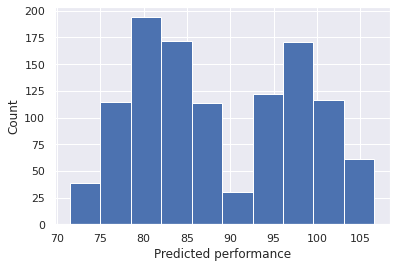

In [ ]:
#predict R_50 of each composition with SVM model
op_pred_svm = regr.predict(df_op)

#display histogram of predicted performance
plt.hist(op_pred_svm)
plt.xlabel("Predicted performance")
plt.ylabel("Count")
plt.show()

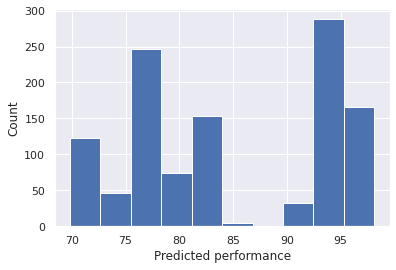

In [ ]:
#predict R_50 of each composition with GP model
op_pred_gp = gp.predict(df_op)

#display histogram of predicted performance
plt.hist(op_pred_gp)
plt.xlabel("Predicted performance")
plt.ylabel("Count")
plt.show()

In [ ]:
#create filtered list of high performing electrolytes
df_op_svm = df_op.copy()
df_op_svm['pred'] = op_pred_svm
df_op_svm.loc[:,['b','f','c','d','e']] = df_op_svm[['b','f','c','d','e']]/100 #Convert solvent volume fractions back to fractions so that salts and solvents will have similar weight (CHECK THIS, NOT SURE IF THIS SHOULD BE HERE)
high_performance = df_op_svm.loc[df_op_svm['pred']>95,:]
high_performance.describe()


,A,B,C,b,c,d,e,f,pred
count,393.000000,393.000000,393.000000,393.000000,393.0,393.000000,393.000000,393.000000,393.000000
mean,0.250382,0.360814,0.292875,0.604759,0.0,0.040537,0.045612,0.309092,99.587794
std,0.402487,0.454334,0.426782,0.439250,0.0,0.032720,0.030687,0.428532,2.963504
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,95.016873
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.023810,0.000000,97.043790
50%,0.100000,0.100000,0.100000,0.909091,0.0,0.045455,0.045455,0.000000,99.165879
75%,0.100000,1.000000,1.000000,0.952381,0.0,0.083333,0.083333,0.869565,101.894282
max,1.000000,1.000000,1.000000,1.000000,0.0,0.090909,0.090909,1.000000,106.612462


In [ ]:
#calculate a similarity metric (I think cosine similarity may not be the best fit here, maybe pairwise_distances instead?)
sim_matrix = pd.DataFrame(np.round(cosine_similarity(high_performance.drop(['pred'],axis=1), X),2))

sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.02,...,0.00,0.08,0.07,0.08,0.0,0.0,0.43,0.00,0.00,0.66
1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.02,...,0.00,0.08,0.08,0.08,0.0,0.0,0.42,0.00,0.00,0.66
2,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.02,...,0.00,0.08,0.08,0.08,0.0,0.0,0.43,0.02,0.01,0.67
3,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.03,...,0.00,0.08,0.08,0.08,0.0,0.0,0.43,0.02,0.01,0.67
4,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.03,...,0.00,0.09,0.08,0.09,0.0,0.0,0.42,0.02,0.01,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.53,0.71,0.73,0.75,0.77,0.61,0.8,0.88,0.71,0.69,...,0.81,0.37,0.39,0.35,0.8,0.8,0.53,0.48,0.70,0.44
389,0.54,0.71,0.73,0.75,0.77,0.61,0.8,0.88,0.71,0.69,...,0.81,0.37,0.38,0.35,0.8,0.8,0.53,0.49,0.70,0.44
390,0.53,0.71,0.73,0.75,0.77,0.61,0.8,0.88,0.71,0.69,...,0.81,0.37,0.39,0.35,0.8,0.8,0.53,0.49,0.70,0.44
391,0.54,0.71,0.73,0.75,0.77,0.61,0.8,0.88,0.71,0.69,...,0.81,0.37,0.38,0.35,0.8,0.8,0.53,0.49,0.70,0.44


In [ ]:
# Experiments with the highest predicted performance using linear model

df_op_ln = df_op.copy()
df_op_ln['pred'] = op_pred_ln
df_op_ln.sort_values(by='pred', ascending=False)

,A,B,C,b,c,d,e,f,pred
1030,0.0,1.0,0.0,90.909091,0.000000,0.000000,9.090909,0.000000,136.479646
544,0.0,0.1,0.0,90.909091,0.000000,0.000000,9.090909,0.000000,135.742565
1192,0.0,1.0,0.1,90.909091,0.000000,0.000000,9.090909,0.000000,135.151497
1036,0.0,1.0,0.0,86.956522,0.000000,4.347826,8.695652,0.000000,134.909169
2488,0.1,1.0,0.0,90.909091,0.000000,0.000000,9.090909,0.000000,134.430792
...,...,...,...,...,...,...,...,...,...
3247,1.0,0.0,1.0,0.000000,0.000000,4.761905,0.000000,95.238095,61.809687
3241,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,100.000000,61.611687
3342,1.0,0.0,1.0,32.258065,64.516129,3.225806,0.000000,0.000000,59.774191
3336,1.0,0.0,1.0,32.786885,65.573770,1.639344,0.000000,0.000000,59.675905


In [ ]:
# Experiments with the highest predicted performance using Lasso

df_op_ls = df_op.copy()
df_op_ls['pred'] = op_pred_ls
df_op_ls.sort_values(by='pred', ascending=False)

,A,B,C,b,c,d,e,f,pred
1354,0.0,1.0,1.0,90.909091,0.000000,0.000000,9.090909,0.0,122.230439
1030,0.0,1.0,0.0,90.909091,0.000000,0.000000,9.090909,0.0,122.230439
1192,0.0,1.0,0.1,90.909091,0.000000,0.000000,9.090909,0.0,122.230439
1360,0.0,1.0,1.0,86.956522,0.000000,4.347826,8.695652,0.0,121.596061
1198,0.0,1.0,0.1,86.956522,0.000000,4.347826,8.695652,0.0,121.596061
...,...,...,...,...,...,...,...,...,...
3336,1.0,0.0,1.0,32.786885,65.573770,1.639344,0.000000,0.0,73.013772
3012,1.0,0.0,0.0,32.786885,65.573770,1.639344,0.000000,0.0,73.013772
3168,1.0,0.0,0.1,33.333333,66.666667,0.000000,0.000000,0.0,72.695496
3330,1.0,0.0,1.0,33.333333,66.666667,0.000000,0.000000,0.0,72.695496


In [ ]:
# Experiments with the highest predicted performance using KNN

df_op_knn= df_op.copy()
df_op_knn['pred'] = op_pred_knn
df_op_knn.sort_values(by='pred', ascending=False)

,A,B,C,b,c,d,e,f,pred
1301,0.0,1.0,1.0,0.000000,0.000000,0.000000,9.090909,90.909091,96.111429
975,0.0,1.0,0.0,0.000000,0.000000,0.000000,4.761905,95.238095,96.111429
1137,0.0,1.0,0.1,0.000000,0.000000,0.000000,4.761905,95.238095,96.111429
1299,0.0,1.0,1.0,0.000000,0.000000,0.000000,4.761905,95.238095,96.111429
977,0.0,1.0,0.0,0.000000,0.000000,0.000000,9.090909,90.909091,96.111429
...,...,...,...,...,...,...,...,...,...
1938,0.1,0.0,1.0,48.780488,48.780488,2.439024,0.000000,0.000000,81.300000
1940,0.1,0.0,1.0,48.192771,48.192771,2.409639,1.204819,0.000000,81.300000
1942,0.1,0.0,1.0,47.619048,47.619048,2.380952,2.380952,0.000000,81.300000
1056,0.0,1.0,0.0,47.619048,47.619048,4.761905,0.000000,0.000000,81.300000


In [ ]:
# Experiments with the highest predicted performance using Random forest 

df_op_rf= df_op.copy()
df_op_rf['pred'] = op_pred_rf
df_op_rf.sort_values(by='pred', ascending=False)

,A,B,C,b,c,d,e,f,pred
981,0.0,1.0,0.0,0.000000,0.000000,4.545455,4.545455,90.909091,93.24015
983,0.0,1.0,0.0,0.000000,0.000000,4.347826,8.695652,86.956522,93.24015
987,0.0,1.0,0.0,0.000000,0.000000,8.695652,4.347826,86.956522,93.24015
989,0.0,1.0,0.0,0.000000,0.000000,8.333333,8.333333,83.333333,93.24015
1143,0.0,1.0,0.1,0.000000,0.000000,4.545455,4.545455,90.909091,93.24015
...,...,...,...,...,...,...,...,...,...
3222,1.0,0.0,0.1,50.000000,50.000000,0.000000,0.000000,0.000000,84.29160
3366,1.0,0.0,1.0,66.666667,33.333333,0.000000,0.000000,0.000000,84.28835
3330,1.0,0.0,1.0,33.333333,66.666667,0.000000,0.000000,0.000000,84.28835
3384,1.0,0.0,1.0,50.000000,50.000000,0.000000,0.000000,0.000000,84.28835


In [ ]:
# Experiments with the highest predicted performance using SVM

df_op_svm.sort_values(by='pred', ascending=False)

,A,B,C,b,c,d,e,f,pred
1042,0.0,1.0,0.0,0.833333,0.000000,0.083333,0.083333,0.000000,106.612462
1204,0.0,1.0,0.1,0.833333,0.000000,0.083333,0.083333,0.000000,106.565403
2500,0.1,1.0,0.0,0.833333,0.000000,0.083333,0.083333,0.000000,106.391366
989,0.0,1.0,0.0,0.000000,0.000000,0.083333,0.083333,0.833333,106.324831
1151,0.0,1.0,0.1,0.000000,0.000000,0.083333,0.083333,0.833333,106.277773
...,...,...,...,...,...,...,...,...,...
3336,1.0,0.0,1.0,0.327869,0.655738,0.016393,0.000000,0.000000,72.287984
3492,1.0,0.1,0.0,0.333333,0.666667,0.000000,0.000000,0.000000,72.192032
3006,1.0,0.0,0.0,0.333333,0.666667,0.000000,0.000000,0.000000,71.975137
3168,1.0,0.0,0.1,0.333333,0.666667,0.000000,0.000000,0.000000,71.928079


In [ ]:
# Experiments with the highest predicted performance using Gaussian process

df_op_gp= df_op.copy()
df_op_gp['pred'] = op_pred_gp
df_op_gp.sort_values(by='pred', ascending=False)

,A,B,C,b,c,d,e,f,pred
1313,0.0,1.0,1.0,0.000000,0.000000,8.333333,8.333333,83.333333,98.126758
1151,0.0,1.0,0.1,0.000000,0.000000,8.333333,8.333333,83.333333,98.118910
989,0.0,1.0,0.0,0.000000,0.000000,8.333333,8.333333,83.333333,98.118038
2447,0.1,1.0,0.0,0.000000,0.000000,8.333333,8.333333,83.333333,98.076653
827,0.0,0.1,1.0,0.000000,0.000000,8.333333,8.333333,83.333333,97.726536
...,...,...,...,...,...,...,...,...,...
1548,0.1,0.0,0.0,33.333333,66.666667,0.000000,0.000000,0.000000,70.203078
3492,1.0,0.1,0.0,33.333333,66.666667,0.000000,0.000000,0.000000,69.875086
3330,1.0,0.0,1.0,33.333333,66.666667,0.000000,0.000000,0.000000,69.839338
3168,1.0,0.0,0.1,33.333333,66.666667,0.000000,0.000000,0.000000,69.831489


In [ ]:
# similarity metric 
sim_matrix = pd.DataFrame(np.round(cosine_similarity(df_op_ln.drop(['pred'],axis=1), X),2))

sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.66
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1130,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1131,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.49,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1132,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01


In [ ]:
# similarity metric 
sim_matrix = pd.DataFrame(np.round(cosine_similarity(df_op_ls.drop(['pred'],axis=1), X),2))

sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.66
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1130,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1131,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.49,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1132,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01


In [ ]:
# similarity metric 
sim_matrix = pd.DataFrame(np.round(cosine_similarity(df_op_knn.drop(['pred'],axis=1), X),2))

sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.66
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1130,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1131,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.49,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1132,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01


In [ ]:
# similarity metric 
sim_matrix = pd.DataFrame(np.round(cosine_similarity(df_op_rf.drop(['pred'],axis=1), X),2))

sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.66
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1130,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1131,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.49,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1132,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01


In [ ]:
# similarity metric 
sim_matrix = pd.DataFrame(np.round(cosine_similarity(df_op_gp.drop(['pred'],axis=1), X),2))

sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.67
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,0.66
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.02,0.01,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1130,0.30,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1131,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.49,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
1132,0.31,0.55,0.55,0.55,0.54,0.54,0.62,0.68,0.55,0.62,...,0.50,0.47,0.49,0.53,0.54,0.54,0.01,0.31,0.53,0.01
